# Bussiness & Data Understanding



<h><b>Used car data from the site .......<b>
    
    
    
    <u1>1-Work Scrap data.</u1>
    
    
    <u2>2-Do data analysis.</u2>
    
    
    <u3>3-DO data Visualization.</u3>
    
    
    <u4>4-predict the price of the car.</u4>
    
    
    
    <u5>using Machine learning.</u5>
    
    Explanation of each column
    ***************************
    Make=>The model of a car is the name used by a manufacturer to market a range of similar cars. The methods used by car         manufacturers to categorise their product range into models varies between manufacturers.
    
    Model=>The model of a car is the name used by a manufacturer to market a range of similar cars. The methods used by car         manufacturers to categorise their product range into models varies between manufacturers.
    
    CC=> CC is the capacity of internal combustion Engine in terms of ratio of volume of Air to Fuel.
    
    Used since=> Year of model
    
    Km=> Unit of measurement representing the movement of a road motor vehicle over one kilometer.
    
    Transmission=>There are a variety of car transmissions. Some are automatic, while manual transmissions in stick-shift cars     require the driver to complete extra steps for the vehicle to operate effectively. Where is a transmission in a car             located? Typically, a transmission is mounted onto the chassis of a vehicle in the front
    
    City=> The city in which the cars are sold
    
    Color=> car colors
    
    Body Style=> The body style of a vehicle refers to the shape and model of a particular automobile make, such as Ford,           Chevrolet or Chrysler. Contemporary passenger-car body styles generally include two-door coupes, four-door sedans,             hatchbacks,station wagons, sports cars, minivans, sport utility vehicles and convertibles. Truck cab body styles include       regularcab,extended cab and four-door crew cabs.
    
    
    Fuel=>A motor fuel is a fuel that is used to provide power to the motor in motor vehicles.
    --------------------------------------------------------------------------------------------------------------
    The rest of the column will be accessories in the car
    

</h>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import sqlite3

sns.set(rc={'figure.figsize': [17, 17]}, font_scale=1.2)

# Load Data

In [2]:
df=pd.read_csv('cars.csv')
df.head(5)

Make       Model   CC  Used since          Km Transmission  \
0    Skoda  Octavia A4  NaN      2000.0  175,000 Km       manual   
1   Proton       Preve  NaN      2019.0   17,000 Km          CVT   
2   Suzuki      Maruti  NaN      2007.0   93,300 Km       manual   
3  Peugeot         508  NaN      2021.0    7,000 Km    automatic   
4  Citro�n  C4 Picasso  NaN      2017.0  129,000 Km    automatic   

                  City       Color Body Style Fuel  ...  Alloy wheels  \
0              Abu Qir  Light grey        NaN  gas  ...          True   
1  Tagamo3 - New Cairo      Silver        NaN  gas  ...          True   
2            Nasr city        Blue        NaN  gas  ...         False   
3            6 October   Dark blue        NaN  gas  ...          True   
4            6 October   Petroleum        NaN  gas  ...          True   

   Rear camera    GPS  Fog light  Rear spoiler  Cruise control  Power Seats  \
0         True   True       True         False           False        False   
1        False  False       True          True           False        False   
2        False  False      False         False           False        False   
3        False   True       True         False            True        False   
4        False   True       True         False            True        False   

   Central lock  Alarm        Price  
0          True   True  123,000 EGP  
1          True   True  225,000 EGP  
2         False  False   48,000 EGP  
3          True   True  520,000 EGP  
4          True   True  285,000 EGP  

[5 rows x 51 columns]

<b> Prints information about the DataFrame</b>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42186 entries, 0 to 42185
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Make                        41260 non-null  object 
 1   Model                       41260 non-null  object 
 2   CC                          22276 non-null  object 
 3   Used since                  41260 non-null  float64
 4   Km                          41260 non-null  object 
 5   Transmission                41260 non-null  object 
 6   City                        41260 non-null  object 
 7   Color                       41260 non-null  object 
 8   Body Style                  24266 non-null  object 
 9   Fuel                        41260 non-null  object 
 10  Leather seats               42186 non-null  bool   
 11  Closing mirrors             42186 non-null  bool   
 12  Intelligent parking system  42186 non-null  bool   
 13  Sunroof                     421

# Analysis

<b>Finds NULL values</b>

In [4]:
df.isnull().sum() * 100 / 42186

Make                           2.195041
Model                          2.195041
CC                            47.195752
Used since                     2.195041
Km                             2.195041
Transmission                   2.195041
City                           2.195041
Color                          2.195041
Body Style                    42.478547
Fuel                           2.195041
Leather seats                  0.000000
Closing mirrors                0.000000
Intelligent parking system     0.000000
Sunroof                        0.000000
Fabric brushes                 0.000000
Air Conditioning               0.000000
Power Steering                 0.000000
Remote Keyless                 0.000000
Electric mirrors               0.000000
Front Power Windows            0.000000
Back Power Windows             0.000000
Tinted Glass                   0.000000
CD Player                      0.000000
DVD Player                     0.000000
Bluetooth                      0.000000


In [5]:
df.describe()

Used since
count  41260.000000
mean    2006.997334
std       11.100714
min     1884.000000
25%     2000.000000
50%     2010.000000
75%     2015.000000
max     2022.000000

In [6]:
df['Make'].unique()

array(['Skoda', 'Proton', 'Suzuki', 'Peugeot', 'Citro�n', 'MG', 'Nissan',
       'Renault', 'Chevrolet', 'Fiat', 'Kia', 'Daewoo', 'Opel', 'Changan',
       'Hyundai', nan, 'Jeep', 'BMW', 'Toyota', 'Seat', 'Subaru',
       'Porsche', 'Mercedes', 'Mitsubishi', 'Volkswagen', 'Honda', 'Byd',
       'Dodge', 'Audi', 'Geely', 'Lada', 'Speranza', 'Emgrand',
       'Land Rover', 'Chery', 'Jac', 'Mazda', 'Brilliance', 'Mini',
       'Infiniti', 'Senova', 'Ford', 'Isuzu', 'Daihatsu', 'DFSK',
       'Ssang Yong', 'Kenbo', 'Faw', 'Ds', 'Volvo', 'Zotye', 'Chrysler',
       'Jaguar', 'Haval', 'Alfa Romeo', 'Mahindra', 'Great Wall',
       'Bentley', 'Jetour', 'Canghe || Changhe', 'Saipa', 'Lancia',
       'Karry', 'Haima', 'Baic', 'Soueast', 'Chana', 'Lexus', 'Sokon',
       'Lifan', 'Hafei', 'Keyton', 'Hawtai', 'Datsun', 'Hummer',
       'Cadillac', 'Jonway', 'Buick', 'Domy', 'Ferrari', 'Maserati',
       'Landwind', 'Gmc', 'Tesla', 'Pontiac', 'DFM', 'Bugatti', 'Tata',
       'Foton'], dtype=object

In [7]:
df['Make'].nunique()

88

<b>Companies count is 88</b>

<b> Return a Series containing counts of unique values</b>

In [8]:
df['Make'].value_counts()

Hyundai      4717
Fiat         3716
Chevrolet    3222
Kia          2618
Daewoo       1972
             ... 
DFM             1
Pontiac         1
Bugatti         1
Ferrari         1
Foton           1
Name: Make, Length: 88, dtype: int64

<b>Most famous cars Hyndai & Fiat & Chevrolet</b>

In [9]:
df['Model'].unique()                      

array(['Octavia A4', 'Preve', 'Maruti', '508', 'C4 Picasso', 'ZS',
       'Sunny', 'Sandero Step Way', 'Lanos', 'Punto', 'Cerato', 'Logan',
       'Corsa', 'Felicia', 'CS 35', '127', 'Elantra HD', 'Optra', nan,
       'Liberty', 'Aveo', '528', 'Qashqai', 'Corolla', 'Yaris', '405',
       '316', 'Leon', 'Cruze', 'Accent', 'Soul', 'Swift', '320', 'Gen 2',
       'Toledo', 'XV', 'Macan', 'Verna', 'Fantasia', 'C 180',
       'Grand Cerato', 'Regata', '124', 'Elantra CN7', 'GLA', 'Nubira 2',
       'Lancer', 'Juliet', 'Shahin', 'Passat', 'Elantra AD', 'HRV',
       'E 350', 'Veloster', 'CLA 200', 'Tucson Turbo GDI || Tucson Turbo',
       'F3', 'Golf', 'X3', 'Picanto', 'Scala', '132', 'Carnival', '128',
       'Polonez', 'Vectra', 'Dart', 'Q5', 'Grandland', 'Imperial', '504',
       'Octavia A7', 'Grand Cherokee', 'Sephia', 'C5', 'C5 Aircross',
       'Rio', 'Kodiaq', 'Jetta', 'Astra', 'C4', '2107', 'Clio', 'Sentra',
       'Emgrand 7', 'Saga', 'Tiggo', 'S Presso', 'Accent RB', '500', '9',


In [10]:
df['Model'].nunique()

846

<b> models count is 846</b>


In [11]:
df['Model'].value_counts()

Lancer      1442
Lanos       1428
Sunny       1288
Verna       1104
128          996
            ... 
E Star         1
Foreste        1
F-150          1
Dts            1
Victoria       1
Name: Model, Length: 846, dtype: int64

<b> Most famous cars Model Lancer & Lanos & Sunny</b>  

In [12]:
df['CC'].unique()

array([nan, '1600 CC', '1400 CC', '1500 CC', '1100 CC', '1200 CC',
       '1300 CC', '1000 CC', '2000 CC', '1339 CC', '4300 CC', '4000 CC',
       '1800 CC', '2700 CC', '3500 CC', '900 CC', '1900 CC', '2800 CC',
       '1992 CC', '3800 CC', '4100 CC', '3000 CC', '3700 CC', '800 CC',
       '2400 CC', '2500 CC', '5600 CC', '5700 CC', '3300 CC', '3190 CC',
       '3200 CC', '3400 CC', '1250 CC', '850 CC', '3600 CC', '4400 CC',
       '6000 CC', '1139 CC', '1116 CC', '1598 CC', '2600 CC', '2127 CC',
       '1971 CC', '1295 CC', '1700 CC', '2200 CC', '5200 CC', '1490 CC',
       '4700 CC', '970 CC', '1998 CC', '4800 CC', '5800 CC', '4500 CC',
       '1050 CC', '1850 CC', '2300 CC', '1572 CC', '3900 CC', '2609 CC',
       '4570 CC', '1970 CC', '1330 CC', '1599 CC', '4200 CC', '995 CC',
       '1150 CC', '5000 CC', '950 CC', '4600 CC', '1595 CC', '5900 CC',
       '2100 CC', '2900 CC', '3100 CC', '1350 CC', '3181 CC', '1993 CC',
       '1242 CC', '1499 CC', '3797 CC', '1248 CC', '5400 CC', '

In [13]:
df['CC'].nunique()

107

<b> the CC is count 107</b>

<b>Return a Series containing counts of unique values</b>

In [14]:
df['CC'].value_counts()

1600 CC    10177
1500 CC     3273
1300 CC     2536
2000 CC     1280
1400 CC     1138
           ...  
4570 CC        1
1350 CC        1
1295 CC        1
1320 CC        1
1242 CC        1
Name: CC, Length: 107, dtype: int64

<b> the most CC is 1600 CC &1500 CC& 1300 CC </b>

In [15]:
df['Used since'].nunique()

65

<b>the count Used since is 65</b>

In [16]:
df['Used since'].unique()

array([2000., 2019., 2007., 2021., 2017., 2015., 2022., 2020., 2016.,
       2013., 1998., 2011., 1997., 1995., 1987.,   nan, 2012., 2008.,
       1996., 2005., 2010., 2014., 2018., 2009., 1985., 1974., 1999.,
       2006., 1981., 2004., 2003., 1989., 1990., 1979., 2002., 1988.,
       1993., 1980., 1982., 1976., 1994., 1991., 1984., 1977., 1986.,
       1978., 1992., 2001., 1975., 1983., 1971., 1973., 1972., 1962.,
       1964., 1965., 1970., 1960., 1969., 1961., 1966., 1963., 1942.,
       1967., 1968., 1884.])

In [17]:
df['Used since'].value_counts()

2015.0    2306
2010.0    2002
2008.0    1979
2016.0    1837
2013.0    1821
          ... 
1962.0       1
1884.0       1
1960.0       1
1964.0       1
1968.0       1
Name: Used since, Length: 65, dtype: int64

<b> the most used since 2015 & 2010 &2008</b>

In [18]:
df['Km'].unique()

array(['175,000 Km', '17,000 Km', '93,300 Km', ..., '286,300 Km',
       '142,300 Km', '42,600 Km'], dtype=object)

In [19]:
df['Transmission'].unique()


array(['manual', 'CVT', 'automatic', nan, 'DSG'], dtype=object)


CVT=> Although a CVT operates in a similar fashion as a traditional automatic transmission,
they are quite different in their construction. A CVT doesn’t use any gears at all.
Instead, they rely on two cone-shaped pulleys to transfer power from the engine, through the transmission
, and to the drive wheels. These pulleys are able to vary their width depending on power inputs, 
hence the name Continuously Variable Transmission. 
Working in tandem, these pulleys allow a CVT to accelerate with both smoothness and strength.

CVT => على الرغم من أن ناقل الحركة CVT يعمل بطريقة مشابهة لناقل الحركة الأوتوماتيكي التقليدي ،
هم مختلفون تمامًا في بنائهم. لا يستخدم CVT أي تروس على الإطلاق.
بدلاً من ذلك ، يعتمدون على بكرتين على شكل مخروطي لنقل الطاقة من المحرك ، عبر ناقل الحركة
، وعجلات القيادة. هذه البكرات قادرة على تغيير عرضها حسب مدخلات الطاقة ،
ومن هنا جاء اسم ناقل الحركة المتغير باستمرار.
تعمل هذه البكرات جنبًا إلى جنب ، مما يسمح لـ CVT بالتسارع بالنعومة والقوة.


DSG stands for 'Direct-Shift Gearbox' (luckily enough, the German translation has the same initials – Direkt-Schalt Getriebe). Without getting too technical, this special gearbox is effectively two separate clutches that work together as one unit, without a clutch pedal and with full automatic or semi-manual contro
يرمز DSG إلى "Direct-Shift Gearbox" (لحسن الحظ ، فإن الترجمة الألمانية لها نفس الأحرف الأولى - Direkt-Schalt Getriebe). بدون الحاجة إلى التقنية العالية ، فإن علبة التروس الخاصة هذه عبارة عن قابضين منفصلين يعملان معًا كوحدة واحدة ، بدون دواسة القابض وبتحكم أوتوماتيكي كامل أو شبه يدوي

In [20]:
df['Transmission'].value_counts()

automatic    20820
manual       20174
CVT            175
DSG             91
Name: Transmission, dtype: int64

<b> the most automatic   20820 </b>

In [21]:
df['City'].unique()

array(['Abu Qir', 'Tagamo3 - New Cairo', 'Nasr city', '6 October',
       'El Haram', 'Cairo', 'Alexandria', 'Dakahlia', 'Beheira', 'Maadi',
       'Imbaba', 'Hurghada', nan, 'Shobra', 'Sharqia', 'El Salam City',
       'Zagazig', 'Kafr el-Sheikh', 'Ismailia', 'Mansoura',
       'Kafr el-Dawwar', 'Bilbeis', 'Giza', 'El Minya', 'Mohandessin',
       'Gharbia', 'Kafr El Zayat', 'Faiyum', 'Quesna', 'Al Shorouk',
       'Heliopolis', 'Obour City', 'Zamalek', 'Helwan', 'Beni Suef',
       'Asyut', 'Dokki', 'Mit Ghamr', 'Sohag', 'Dyarb Negm', 'Ashmoun',
       'Suez', 'Khanka', 'Ain Shams', 'Tanta', 'Damanhur', 'El Bagour',
       'Sheikh Zayed City', 'Monufia', 'El Mahalla', 'El Marg', 'Qalyub',
       'Kafr Shukr', 'Banha', 'Menouf', 'Port Said', 'Mokattam',
       '10th of Ramadan', 'Madinaty', 'Shibin el Kom', 'Aswan', 'Qena',
       'Agamy', 'Amreya', 'Kom Ombo', 'Warraq', 'Red Sea', 'Luxor',
       'Kerdasa', 'Rosetta', 'Sheraton', 'Sadat City', 'Qalyubia',
       'Shibin El Qanater', 

In [22]:
df['City'].nunique()

101

<b>the city count 101</b>

In [23]:
df['City'].value_counts()

Cairo                         8963
Alexandria                    4296
Giza                          3620
6 October                     1209
El Haram                      1115
                              ... 
Kom Ombo                         5
El-Alamein                       4
New Administrative Capital       2
El Gouna                         1
Marsa Alam                       1
Name: City, Length: 101, dtype: int64

<b> the most city is cairo & Alexandria  </b>

In [24]:
df['Color'].unique()

array(['Light grey', 'Silver', 'Blue', 'Dark blue', 'Petroleum', 'Gray',
       'Dark red', 'Bronze', 'Cyan', 'Green', 'Red', 'White', nan,
       'Champagne', 'Black', 'Dark green', 'Mocha', 'Gold', 'Olive',
       'Brown', 'Eggplant', 'Beige', 'Purple', 'Orange', 'Yellow'],
      dtype=object)

In [25]:
df['Color'].nunique()

24

<b> the color is count 24</b>

In [26]:
df['Color'].value_counts()

Silver        6717
Black         6709
White         5699
Red           3639
Gray          3096
Dark red      2708
Blue          2065
Light grey    2004
Dark blue     1622
Gold          1339
Green          952
Cyan           942
Mocha          469
Petroleum      447
Dark green     437
Brown          422
Olive          365
Champagne      363
Bronze         310
Beige          285
Yellow         229
Eggplant       191
Orange         136
Purple         114
Name: Color, dtype: int64

<b> the most is color Silver & Black</b>              

In [27]:
df['Body Style'].unique()

array([nan, 'Hatchback', 'Sedan', '4x4', 'SUV', 'Coupe', 'Van',
       'MiniVans', 'Pick up', 'Microbus', 'Medium truck jumbo',
       'Mini Pick up'], dtype=object)

In [28]:
df['Body Style'].nunique()

11

<b>the count Body Style 11 </b>

In [29]:
df['Body Style'].value_counts()

Sedan                 16821
Hatchback              3493
4x4                    1692
SUV                     665
Van                     586
MiniVans                451
Pick up                 442
Coupe                    78
Microbus                 28
Medium truck jumbo        9
Mini Pick up              1
Name: Body Style, dtype: int64

<b>the most Body Style is Sedan& Hatchback </b>

In [30]:
df['Fuel'].unique()

array(['gas', 'natural gas', nan, 'diesel', 'Hybrid', 'Electric'],
      dtype=object)

</b>What is a hybrid?
Quite simply, a hybrid combines at least one electric motor with 
a gasoline engine to move the car, and its system recaptures energy via regenerative braking.
Sometimes the electric motor does all the work, sometimes
it's the gas engine, and sometimes they work together. The result is less gasoline burned and, therefore, better fuel economy. 
Adding electric power can even boost performance in certain instances.

ما هو الهجين؟
بكل بساطة ، يجمع المحرك الهجين ما لا يقل عن محرك كهربائي واحد مع محرك بنزين لتحريك السيارة ، ويستعيد نظامها الطاقة عن طريق الكبح المتجدد. أحيانًا يقوم المحرك الكهربائي بكل العمل ، وأحيانًا يكون محرك الغاز ، وأحيانًا يعملان معًا. والنتيجة هي حرق أقل للبنزين ، وبالتالي ، توفير أفضل للوقود. يمكن أن تؤدي إضافة الطاقة الكهربائية إلى تعزيز الأداء في حالات معينة

</b>

In [31]:
df['Fuel'].nunique()

5

<b> the count Fuel is 5</b>

In [32]:
df['Fuel'].value_counts()

gas            40668
diesel           282
natural gas      242
Hybrid            60
Electric           8
Name: Fuel, dtype: int64

<b> the most is Fuel is gas</b>

In [33]:
df.columns

Index(['Make', 'Model', 'CC', 'Used since', 'Km', 'Transmission', 'City',
       'Color', 'Body Style', 'Fuel', 'Leather seats', 'Closing mirrors',
       'Intelligent parking system', 'Sunroof', 'Fabric brushes',
       'Air Conditioning', 'Power Steering', 'Remote Keyless',
       'Electric mirrors', 'Front Power Windows', 'Back Power Windows',
       'Tinted Glass', 'CD Player', 'DVD Player', 'Bluetooth', 'Multifunction',
       'Cassette Radio', 'AUX', 'CD Changer', 'USB Port',
       'Anti - theft System', 'Side Airbag', 'ABS', 'EPS', 'EBD', 'ESP',
       'Sensors', 'Rear sensors', 'Driver Airbag', 'Passenger Airbag',
       'Front sensors', 'Alloy wheels', 'Rear camera', 'GPS', 'Fog light',
       'Rear spoiler', 'Cruise control', 'Power Seats', 'Central lock',
       'Alarm', 'Price'],
      dtype='object')

In [34]:
cat_feat = ['Leather seats', 'Closing mirrors',
       'Intelligent parking system', 'Sunroof', 'Fabric brushes',
       'Air Conditioning', 'Power Steering', 'Remote Keyless',
       'Electric mirrors', 'Front Power Windows', 'Back Power Windows',
       'Tinted Glass', 'CD Player', 'DVD Player', 'Bluetooth', 'Multifunction',
       'Cassette Radio', 'AUX', 'CD Changer', 'USB Port',
       'Anti - theft System', 'Side Airbag', 'ABS', 'EPS', 'EBD', 'ESP',
       'Sensors', 'Rear sensors', 'Driver Airbag', 'Passenger Airbag',
       'Front sensors', 'Alloy wheels', 'Rear camera', 'GPS', 'Fog light',
       'Rear spoiler', 'Cruise control', 'Power Seats', 'Central lock',
       'Alarm']

for col in cat_feat:
    print(f'Categorical feature name: {col}')

    print('-'*13)
    print(df[col].value_counts())
    print('-'*50)

Categorical feature name: Leather seats
-------------
True     23437
False    18749
Name: Leather seats, dtype: int64
--------------------------------------------------
Categorical feature name: Closing mirrors
-------------
False    37672
True      4514
Name: Closing mirrors, dtype: int64
--------------------------------------------------
Categorical feature name: Intelligent parking system
-------------
False    39989
True      2197
Name: Intelligent parking system, dtype: int64
--------------------------------------------------
Categorical feature name: Sunroof
-------------
False    37581
True      4605
Name: Sunroof, dtype: int64
--------------------------------------------------
Categorical feature name: Fabric brushes
-------------
False    37039
True      5147
Name: Fabric brushes, dtype: int64
--------------------------------------------------
Categorical feature name: Air Conditioning
-------------
True     26661
False    15525
Name: Air Conditioning, dtype: int64
-----------

In [35]:
df['Price'].unique()

array(['123,000 EGP', '225,000 EGP', '48,000 EGP', '520,000 EGP',
       '285,000 EGP', '265,000 EGP', '575,000 EGP', '315,000 EGP',
       '275,000 EGP', '184,000 EGP', '105,000 EGP', '50,000 EGP',
       '263 EGP', '87 EGP', '85 EGP', '59,000 EGP', '53,000 EGP',
       '260,000 EGP', '155,000 EGP', '14,000 EGP', '255,000 EGP', nan,
       '365,000 EGP', '110,000 EGP', '252,000 EGP', '420,000 EGP',
       '380,000 EGP', '142,000 EGP', '60,000 EGP', '80,000 EGP',
       '440,000 EGP', '185,000 EGP', '130,000 EGP', '220,000 EGP',
       '165,000 EGP', '385,000 EGP', '290,000 EGP', '172,000 EGP',
       '2,200,000 EGP', '175,000 EGP', '75,000 EGP', '124,000 EGP',
       '120,000 EGP', '460,000 EGP', '450,000 EGP', '20,000 EGP',
       '138,000 EGP', '13,000 EGP', '407,000 EGP', '1,300,000 EGP',
       '85,000 EGP', '235,000 EGP', '91,000 EGP', '95,000 EGP',
       '26,000 EGP', '360,000 EGP', '188,000 EGP', '160,000 EGP',
       '1,425,000 EGP', '170,000 EGP', '250,000 EGP', '625,000 EGP

# cleaning

<b>converted the data to numerical</b>

In [36]:
def fixed_used_scince(x):
    try:
        y=str(x) 
        return y.split(".")[0]
    except:
        return np.nan
df['Used since']=df['Used since'].apply(fixed_used_scince)

In [37]:
y='2000.0'
y.split(".")[0]

'2000'

In [38]:
df['Used since']

0        2000
1        2019
2        2007
3        2021
4        2017
         ... 
42181     nan
42182     nan
42183     nan
42184     nan
42185     nan
Name: Used since, Length: 42186, dtype: object

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42186 entries, 0 to 42185
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Make                        41260 non-null  object
 1   Model                       41260 non-null  object
 2   CC                          22276 non-null  object
 3   Used since                  42186 non-null  object
 4   Km                          41260 non-null  object
 5   Transmission                41260 non-null  object
 6   City                        41260 non-null  object
 7   Color                       41260 non-null  object
 8   Body Style                  24266 non-null  object
 9   Fuel                        41260 non-null  object
 10  Leather seats               42186 non-null  bool  
 11  Closing mirrors             42186 non-null  bool  
 12  Intelligent parking system  42186 non-null  bool  
 13  Sunroof                     42186 non-null  bo

In [40]:
y=df['Km'].iloc[5]
y

'95,000 Km'

In [41]:
y.split(' ')[0].replace(',','')

'95000'

<b> clean km converted to float</b>

In [42]:
def fixed_km(y):
    try:
        return float(y.split(' ')[0].replace(',',''))
    except:
         return np.nan
df['Km']=df['Km'].apply(fixed_km)        
        

In [43]:
df['Km']

0        175000.0
1         17000.0
2         93300.0
3          7000.0
4        129000.0
           ...   
42181         NaN
42182         NaN
42183         NaN
42184         NaN
42185         NaN
Name: Km, Length: 42186, dtype: float64

<b> clean the price to convert float </b>

In [44]:
df['Price']

0        123,000 EGP
1        225,000 EGP
2         48,000 EGP
3        520,000 EGP
4        285,000 EGP
            ...     
42181            NaN
42182            NaN
42183            NaN
42184            NaN
42185            NaN
Name: Price, Length: 42186, dtype: object

In [45]:
z=df['Price'].iloc[80]
z

'1,425,000 EGP'

In [46]:
z.split(' ')[0].replace(',','')

'1425000'

In [47]:
def fixed_price(z):
    try:
        return float(z.split(' ')[0].replace(',',''))
    except:
         return np.nan
df['Price']=df['Price'].apply(fixed_price)   

In [48]:
df['Price']

0        123000.0
1        225000.0
2         48000.0
3        520000.0
4        285000.0
           ...   
42181         NaN
42182         NaN
42183         NaN
42184         NaN
42185         NaN
Name: Price, Length: 42186, dtype: float64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42186 entries, 0 to 42185
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Make                        41260 non-null  object 
 1   Model                       41260 non-null  object 
 2   CC                          22276 non-null  object 
 3   Used since                  42186 non-null  object 
 4   Km                          41260 non-null  float64
 5   Transmission                41260 non-null  object 
 6   City                        41260 non-null  object 
 7   Color                       41260 non-null  object 
 8   Body Style                  24266 non-null  object 
 9   Fuel                        41260 non-null  object 
 10  Leather seats               42186 non-null  bool   
 11  Closing mirrors             42186 non-null  bool   
 12  Intelligent parking system  42186 non-null  bool   
 13  Sunroof                     421

In [50]:
df

Make       Model   CC Used since        Km Transmission  \
0        Skoda  Octavia A4  NaN       2000  175000.0       manual   
1       Proton       Preve  NaN       2019   17000.0          CVT   
2       Suzuki      Maruti  NaN       2007   93300.0       manual   
3      Peugeot         508  NaN       2021    7000.0    automatic   
4      Citro�n  C4 Picasso  NaN       2017  129000.0    automatic   
...        ...         ...  ...        ...       ...          ...   
42181      NaN         NaN  NaN        nan       NaN          NaN   
42182      NaN         NaN  NaN        nan       NaN          NaN   
42183      NaN         NaN  NaN        nan       NaN          NaN   
42184      NaN         NaN  NaN        nan       NaN          NaN   
42185      NaN         NaN  NaN        nan       NaN          NaN   

                      City       Color Body Style Fuel  ...  Alloy wheels  \
0                  Abu Qir  Light grey        NaN  gas  ...          True   
1      Tagamo3 - New Cairo      Silver        NaN  gas  ...          True   
2                Nasr city        Blue        NaN  gas  ...         False   
3                6 October   Dark blue        NaN  gas  ...          True   
4                6 October   Petroleum        NaN  gas  ...          True   
...                    ...         ...        ...  ...  ...           ...   
42181                  NaN         NaN        NaN  NaN  ...         False   
42182                  NaN         NaN        NaN  NaN  ...         False   
42183                  NaN         NaN        NaN  NaN  ...         False   
42184                  NaN         NaN        NaN  NaN  ...         False   
42185                  NaN         NaN        NaN  NaN  ...         False   

       Rear camera    GPS  Fog light  Rear spoiler  Cruise control  \
0             True   True       True         False           False   
1            False  False       True          True           False   
2            False  False      False         False           False   
3            False   True       True         False            True   
4            False   True       True         False            True   
...            ...    ...        ...           ...             ...   
42181        False  False      False         False           False   
42182        False  False      False         False           False   
42183        False  False      False         False           False   
42184        False  False      False         False           False   
42185        False  False      False         False           False   

       Power Seats  Central lock  Alarm     Price  
0            False          True   True  123000.0  
1            False          True   True  225000.0  
2            False         False  False   48000.0  
3            False          True   True  520000.0  
4            False          True   True  285000.0  
...            ...           ...    ...       ...  
42181        False         False  False       NaN  
42182        False         False  False       NaN  
42183        False         False  False       NaN  
42184        False         False  False       NaN  
42185        False         False  False       NaN  

[42186 rows x 51 columns]

<b>Return boolean Series denoting duplicate rows
the count row 1011
</b>

In [51]:
df[df.duplicated()]

Make   Model       CC Used since        Km Transmission  \
15       Renault   Logan      NaN       2011    1000.0       manual   
50     Chevrolet   Cruze      NaN       2015  110000.0    automatic   
51        Nissan   Sunny      NaN       2020   73000.0    automatic   
52           Kia  Cerato  1600 CC       2005  180000.0    automatic   
53       Hyundai  Accent      NaN       2000       0.0       manual   
...          ...     ...      ...        ...       ...          ...   
42181        NaN     NaN      NaN        nan       NaN          NaN   
42182        NaN     NaN      NaN        nan       NaN          NaN   
42183        NaN     NaN      NaN        nan       NaN          NaN   
42184        NaN     NaN      NaN        nan       NaN          NaN   
42185        NaN     NaN      NaN        nan       NaN          NaN   

                 City       Color Body Style Fuel  ...  Alloy wheels  \
15           Dakahlia        Cyan        NaN  gas  ...         False   
50         Alexandria      Silver        NaN  gas  ...         False   
51     Kafr el-Sheikh      Silver        NaN  gas  ...          True   
52              Cairo  Dark green      Sedan  gas  ...         False   
53           Ismailia       White        NaN  gas  ...          True   
...               ...         ...        ...  ...  ...           ...   
42181             NaN         NaN        NaN  NaN  ...         False   
42182             NaN         NaN        NaN  NaN  ...         False   
42183             NaN         NaN        NaN  NaN  ...         False   
42184             NaN         NaN        NaN  NaN  ...         False   
42185             NaN         NaN        NaN  NaN  ...         False   

       Rear camera    GPS  Fog light  Rear spoiler  Cruise control  \
15           False  False      False         False           False   
50            True   True       True         False           False   
51           False  False       True          True           False   
52           False  False       True          True           False   
53           False  False      False         False           False   
...            ...    ...        ...           ...             ...   
42181        False  False      False         False           False   
42182        False  False      False         False           False   
42183        False  False      False         False           False   
42184        False  False      False         False           False   
42185        False  False      False         False           False   

       Power Seats  Central lock  Alarm     Price  
15           False          True  False      87.0  
50            True          True  False  185000.0  
51           False          True   True  225000.0  
52            True         False  False  130000.0  
53           False         False  False   60000.0  
...            ...           ...    ...       ...  
42181        False         False  False       NaN  
42182        False         False  False       NaN  
42183        False         False  False       NaN  
42184        False         False  False       NaN  
42185        False         False  False       NaN  

[1011 rows x 51 columns]

<b>Return a tuple representing the dimensionality of the DataFrame.</b>

In [52]:
df.shape

(42186, 51)

<b>you should drop coulomns most 40% Null</b>

In [53]:
df.drop(['CC','Body Style'],axis=1,inplace=True)

In [54]:
df.head(10)

Make             Model Used since        Km Transmission  \
0    Skoda        Octavia A4       2000  175000.0       manual   
1   Proton             Preve       2019   17000.0          CVT   
2   Suzuki            Maruti       2007   93300.0       manual   
3  Peugeot               508       2021    7000.0    automatic   
4  Citro�n        C4 Picasso       2017  129000.0    automatic   
5  Peugeot               508       2015   95000.0    automatic   
6  Peugeot               508       2022    8000.0    automatic   
7       MG                ZS       2020   20000.0    automatic   
8   Nissan             Sunny       2022    1800.0    automatic   
9  Renault  Sandero Step Way       2016  120000.0    automatic   

                  City       Color Fuel  Leather seats  Closing mirrors  ...  \
0              Abu Qir  Light grey  gas           True            False  ...   
1  Tagamo3 - New Cairo      Silver  gas          False            False  ...   
2            Nasr city        Blue  gas          False            False  ...   
3            6 October   Dark blue  gas          False             True  ...   
4            6 October   Petroleum  gas           True             True  ...   
5            6 October  Light grey  gas           True            False  ...   
6             El Haram        Gray  gas           True             True  ...   
7            Nasr city    Dark red  gas           True            False  ...   
8                Cairo      Bronze  gas           True             True  ...   
9            Nasr city      Silver  gas          False            False  ...   

   Alloy wheels  Rear camera    GPS  Fog light  Rear spoiler  Cruise control  \
0          True         True   True       True         False           False   
1          True        False  False       True          True           False   
2         False        False  False      False         False           False   
3          True        False   True       True         False            True   
4          True        False   True       True         False            True   
5          True        False   True       True         False            True   
6          True         True  False       True         False            True   
7          True         True  False       True         False            True   
8          True         True  False       True          True           False   
9         False        False  False       True         False            True   

   Power Seats  Central lock  Alarm     Price  
0        False          True   True  123000.0  
1        False          True   True  225000.0  
2        False         False  False   48000.0  
3        False          True   True  520000.0  
4        False          True   True  285000.0  
5         True          True   True  265000.0  
6         True          True   True  575000.0  
7        False          True   True  315000.0  
8        False          True   True  275000.0  
9        False          True   True  184000.0  

[10 rows x 49 columns]

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42186 entries, 0 to 42185
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Make                        41260 non-null  object 
 1   Model                       41260 non-null  object 
 2   Used since                  42186 non-null  object 
 3   Km                          41260 non-null  float64
 4   Transmission                41260 non-null  object 
 5   City                        41260 non-null  object 
 6   Color                       41260 non-null  object 
 7   Fuel                        41260 non-null  object 
 8   Leather seats               42186 non-null  bool   
 9   Closing mirrors             42186 non-null  bool   
 10  Intelligent parking system  42186 non-null  bool   
 11  Sunroof                     42186 non-null  bool   
 12  Fabric brushes              42186 non-null  bool   
 13  Air Conditioning            421

In [56]:
df.columns

Index(['Make', 'Model', 'Used since', 'Km', 'Transmission', 'City', 'Color',
       'Fuel', 'Leather seats', 'Closing mirrors',
       'Intelligent parking system', 'Sunroof', 'Fabric brushes',
       'Air Conditioning', 'Power Steering', 'Remote Keyless',
       'Electric mirrors', 'Front Power Windows', 'Back Power Windows',
       'Tinted Glass', 'CD Player', 'DVD Player', 'Bluetooth', 'Multifunction',
       'Cassette Radio', 'AUX', 'CD Changer', 'USB Port',
       'Anti - theft System', 'Side Airbag', 'ABS', 'EPS', 'EBD', 'ESP',
       'Sensors', 'Rear sensors', 'Driver Airbag', 'Passenger Airbag',
       'Front sensors', 'Alloy wheels', 'Rear camera', 'GPS', 'Fog light',
       'Rear spoiler', 'Cruise control', 'Power Seats', 'Central lock',
       'Alarm', 'Price'],
      dtype='object')

In [57]:
cat_feat1 = ['Make', 'Model', 'Used since', 'Transmission', 'City', 'Color',
               'Fuel']
for col in cat_feat1:
        print(f'Categorical feature name: {col}')
        print(df[col].unique())
        print('-'*13)
        print(df[col].value_counts())
        print('-'*50)

Categorical feature name: Make
['Skoda' 'Proton' 'Suzuki' 'Peugeot' 'Citro�n' 'MG' 'Nissan' 'Renault'
 'Chevrolet' 'Fiat' 'Kia' 'Daewoo' 'Opel' 'Changan' 'Hyundai' nan 'Jeep'
 'BMW' 'Toyota' 'Seat' 'Subaru' 'Porsche' 'Mercedes' 'Mitsubishi'
 'Volkswagen' 'Honda' 'Byd' 'Dodge' 'Audi' 'Geely' 'Lada' 'Speranza'
 'Emgrand' 'Land Rover' 'Chery' 'Jac' 'Mazda' 'Brilliance' 'Mini'
 'Infiniti' 'Senova' 'Ford' 'Isuzu' 'Daihatsu' 'DFSK' 'Ssang Yong' 'Kenbo'
 'Faw' 'Ds' 'Volvo' 'Zotye' 'Chrysler' 'Jaguar' 'Haval' 'Alfa Romeo'
 'Mahindra' 'Great Wall' 'Bentley' 'Jetour' 'Canghe || Changhe' 'Saipa'
 'Lancia' 'Karry' 'Haima' 'Baic' 'Soueast' 'Chana' 'Lexus' 'Sokon' 'Lifan'
 'Hafei' 'Keyton' 'Hawtai' 'Datsun' 'Hummer' 'Cadillac' 'Jonway' 'Buick'
 'Domy' 'Ferrari' 'Maserati' 'Landwind' 'Gmc' 'Tesla' 'Pontiac' 'DFM'
 'Bugatti' 'Tata' 'Foton']
-------------
Hyundai      4717
Fiat         3716
Chevrolet    3222
Kia          2618
Daewoo       1972
             ... 
DFM             1
Pontiac         1
Bugat

<b>Generate descriptive statistics.</b>

In [58]:
df['Km'].describe()

count     41260.000000
mean     111474.030708
std       88247.228281
min           0.000000
25%       26000.000000
50%      110000.000000
75%      173000.000000
max      930000.000000
Name: Km, dtype: float64

In [59]:
cat_feat = ['Leather seats', 'Closing mirrors',
       'Intelligent parking system', 'Sunroof', 'Fabric brushes',
       'Air Conditioning', 'Power Steering', 'Remote Keyless',
       'Electric mirrors', 'Front Power Windows', 'Back Power Windows',
       'Tinted Glass', 'CD Player', 'DVD Player', 'Bluetooth', 'Multifunction',
       'Cassette Radio', 'AUX', 'CD Changer', 'USB Port',
       'Anti - theft System', 'Side Airbag', 'ABS', 'EPS', 'EBD', 'ESP',
       'Sensors', 'Rear sensors', 'Driver Airbag', 'Passenger Airbag',
       'Front sensors', 'Alloy wheels', 'Rear camera', 'GPS', 'Fog light',
       'Rear spoiler', 'Cruise control', 'Power Seats', 'Central lock',
       'Alarm']

for col in cat_feat:
    print(f'Categorical feature name: {col}')
    print(df[col].unique())
    print('-'*13)
    print(df[col].value_counts())
    print('-'*50)

Categorical feature name: Leather seats
[ True False]
-------------
True     23437
False    18749
Name: Leather seats, dtype: int64
--------------------------------------------------
Categorical feature name: Closing mirrors
[False  True]
-------------
False    37672
True      4514
Name: Closing mirrors, dtype: int64
--------------------------------------------------
Categorical feature name: Intelligent parking system
[False  True]
-------------
False    39989
True      2197
Name: Intelligent parking system, dtype: int64
--------------------------------------------------
Categorical feature name: Sunroof
[False  True]
-------------
False    37581
True      4605
Name: Sunroof, dtype: int64
--------------------------------------------------
Categorical feature name: Fabric brushes
[False  True]
-------------
False    37039
True      5147
Name: Fabric brushes, dtype: int64
--------------------------------------------------
Categorical feature name: Air Conditioning
[ True False]
--------

In [60]:
df['Price'].describe()

count    4.126000e+04
mean     1.780558e+05
std      2.108396e+05
min      0.000000e+00
25%      7.000000e+04
50%      1.240000e+05
75%      2.150000e+05
max      4.600000e+06
Name: Price, dtype: float64

In [61]:
float(4.600000e+06)

4600000.0

In [62]:
df.corr()

Km  Leather seats  Closing mirrors  \
Km                          1.000000      -0.077291        -0.064145   
Leather seats              -0.077291       1.000000         0.141391   
Closing mirrors            -0.064145       0.141391         1.000000   
Intelligent parking system -0.105305       0.123118         0.475226   
Sunroof                    -0.044717       0.205546         0.429179   
Fabric brushes             -0.026425      -0.272631         0.176020   
Air Conditioning            0.166599       0.288061         0.235209   
Power Steering              0.094491       0.308785         0.242467   
Remote Keyless              0.015519       0.046211         0.425424   
Electric mirrors           -0.007861       0.162342         0.507497   
Front Power Windows         0.106799       0.273428         0.243003   
Back Power Windows          0.105049       0.242961         0.275957   
Tinted Glass               -0.068230       0.082735         0.409174   
CD Player                   0.036333       0.081299         0.308657   
DVD Player                 -0.000667       0.100597         0.422663   
Bluetooth                  -0.047364       0.159719         0.499363   
Multifunction              -0.115325       0.102408         0.421339   
Cassette Radio             -0.020206       0.453088         0.069245   
AUX                        -0.003709       0.109114         0.412726   
CD Changer                  0.047317       0.078054         0.307506   
USB Port                   -0.010724       0.189553         0.433734   
Anti - theft System        -0.124154       0.078390         0.409390   
Side Airbag                -0.026423       0.089583         0.452876   
ABS                         0.000029       0.150783         0.362554   
EPS                        -0.087391       0.109586         0.571884   
EBD                        -0.053623       0.198796         0.374170   
ESP                        -0.106498       0.023898         0.247621   
Sensors                    -0.039287       0.172161         0.515339   
Rear sensors               -0.073594       0.175256         0.502075   
Driver Airbag               0.001823       0.142368         0.395220   
Passenger Airbag           -0.045463       0.070306         0.497515   
Front sensors              -0.064541       0.146950         0.513725   
Alloy wheels               -0.008545       0.106828         0.415747   
Rear camera                -0.075368       0.196038         0.460716   
GPS                        -0.057046       0.137025         0.450221   
Fog light                  -0.010013       0.127421         0.483183   
Rear spoiler               -0.038331       0.109085         0.361761   
Cruise control             -0.077370       0.154184         0.582804   
Power Seats                -0.017012       0.154960         0.434215   
Central lock                0.079055       0.294666         0.247845   
Alarm                      -0.034072       0.108129         0.423326   
Price                      -0.099100       0.048279         0.344010   

                            Intelligent parking system   Sunroof  \
Km                                           -0.105305 -0.044717   
Leather seats                                 0.123118  0.205546   
Closing mirrors                               0.475226  0.429179   
Intelligent parking system                    1.000000  0.355186   
Sunroof                                       0.355186  1.000000   
Fabric brushes                                0.131675  0.048810   
Air Conditioning                              0.173333  0.226928   
Power Steering                                0.198132  0.236234   
Remote Keyless                                0.334670  0.297154   
Electric mirrors                              0.387116  0.387337   
Front Power Windows                           0.179083  0.239496   
Back Power Windows                            0.212789  0.270235   
Tinted Glass                                  0.43459

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42186 entries, 0 to 42185
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Make                        41260 non-null  object 
 1   Model                       41260 non-null  object 
 2   Used since                  42186 non-null  object 
 3   Km                          41260 non-null  float64
 4   Transmission                41260 non-null  object 
 5   City                        41260 non-null  object 
 6   Color                       41260 non-null  object 
 7   Fuel                        41260 non-null  object 
 8   Leather seats               42186 non-null  bool   
 9   Closing mirrors             42186 non-null  bool   
 10  Intelligent parking system  42186 non-null  bool   
 11  Sunroof                     42186 non-null  bool   
 12  Fabric brushes              42186 non-null  bool   
 13  Air Conditioning            421

<b>More cars automatic and gas equal =20709.0 </b>

In [64]:
df.pivot_table(index='Fuel',columns='Transmission',aggfunc='count',values='Price')

Transmission    CVT   DSG  automatic   manual
Fuel                                         
Electric        NaN   NaN        8.0      NaN
Hybrid          NaN   NaN       18.0     42.0
diesel          NaN   NaN       30.0    252.0
gas           175.0  91.0    20709.0  19693.0
natural gas     NaN   NaN       55.0    187.0

<b>more care used since =2019 make = Toyota  99.0</b>

In [65]:
df.pivot_table(index='Make',columns='Used since',aggfunc='count',values='Price')

Used since  1884  1942  1960  1961  1962  1963  1964  1965  1966  1967  ...  \
Make                                                                    ...   
Alfa Romeo   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Audi         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
BMW          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Baic         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Bentley      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
Tesla        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Toyota       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Volkswagen   NaN   NaN   NaN   2.0   NaN   3.0   1.0   2.0   NaN   1.0  ...   
Volvo        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Zotye        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

Used since  2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  
Make                                                                    
Alfa Romeo   NaN   NaN   1.0   2.0   NaN   NaN   2.0   3.0   1.0   NaN  
Audi         3.0   4.0   2.0   3.0   5.0   4.0   6.0   8.0   6.0   4.0  
BMW         48.0  52.0  61.0  66.0  89.0  67.0  67.0  29.0  39.0   2.0  
Baic         NaN   NaN   1.0   5.0   NaN   1.0   NaN   2.0   1.0   NaN  
Bentley      NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
Tesla        NaN   NaN   NaN   NaN   3.0   NaN   NaN   1.0   NaN   NaN  
Toyota      77.0  38.0  94.0  19.0  40.0  34.0  99.0  72.0  94.0  54.0  
Volkswagen  12.0  15.0  12.0  15.0  13.0  12.0  16.0   6.0  17.0   NaN  
Volvo        5.0   4.0   6.0   2.0   4.0  12.0   3.0   5.0   2.0   NaN  
Zotye        NaN   1.0   NaN   NaN   NaN   4.0  22.0   4.0   NaN   NaN  

[88 rows x 65 columns]

<b>more cars Toyota&Silver  count=312.0</b>

In [66]:
df.pivot_table(index='Color',columns='Make',aggfunc='count',values='Price')

Make        Alfa Romeo  Audi    BMW  Baic  Bentley  Brilliance  Bugatti  \
Color                                                                     
Beige              NaN   1.0    1.0   NaN      NaN         2.0      NaN   
Black              2.0  30.0  347.0   1.0      NaN        53.0      NaN   
Blue               2.0   5.0   73.0   NaN      NaN        14.0      NaN   
Bronze             NaN   NaN    2.0   NaN      NaN         NaN      NaN   
Brown              NaN   1.0   15.0   NaN      NaN         2.0      NaN   
Champagne          1.0   NaN    2.0   NaN      NaN         NaN      NaN   
Cyan               NaN   NaN   11.0   NaN      NaN         4.0      NaN   
Dark blue          NaN   5.0  102.0   1.0      NaN        19.0      NaN   
Dark green         NaN   NaN    9.0   NaN      NaN         NaN      1.0   
Dark red           1.0   5.0   33.0   1.0      NaN         9.0      NaN   
Eggplant           NaN   NaN    3.0   1.0      NaN         NaN      NaN   
Gold               3.0   NaN    9.0   NaN      NaN         4.0      NaN   
Gray               2.0   8.0  108.0   1.0      1.0        14.0      NaN   
Green              NaN   2.0    9.0   NaN      NaN         3.0      NaN   
Light grey         2.0   4.0   71.0   NaN      NaN         7.0      NaN   
Mocha              NaN   1.0   11.0   1.0      NaN         2.0      NaN   
Olive              NaN   NaN    9.0   NaN      NaN         NaN      NaN   
Orange             NaN   1.0    1.0   NaN      NaN         NaN      NaN   
Petroleum          NaN   NaN    8.0   NaN      NaN         NaN      NaN   
Purple             NaN   NaN    2.0   NaN      NaN         NaN      NaN   
Red                1.0  15.0   49.0   NaN      1.0        13.0      NaN   
Silver             5.0   9.0  200.0   1.0      NaN        62.0      NaN   
White              3.0   4.0  109.0   3.0      NaN        28.0      NaN   
Yellow             NaN   1.0    2.0   NaN      NaN         NaN      NaN   

Make        Buick    Byd  Cadillac  ...  Speranza  Ssang Yong  Subaru  Suzuki  \
Color                               ...                                         
Beige         NaN    2.0       NaN  ...      13.0         NaN     NaN     3.0   
Black         NaN   38.0       2.0  ...     309.0         2.0    21.0    47.0   
Blue          1.0   44.0       NaN  ...      44.0         3.0     8.0    47.0   
Bronze        NaN    4.0       NaN  ...       NaN         NaN     NaN     8.0   
Brown         NaN   16.0       NaN  ...      11.0         1.0     NaN     2.0   
Champagne     NaN    NaN       NaN  ...       6.0         NaN     1.0     6.0   
Cyan          NaN    3.0       NaN  ...      19.0         NaN     1.0    28.0   
Dark blue     1.0   11.0       NaN  ...      73.0        10.0     6.0    31.0   
Dark green    NaN    NaN       1.0  ...       1.0         NaN     NaN     7.0   
Dark red      NaN   54.0       NaN  ...      58.0         1.0     6.0   199.0   
Eggplant      1.0    4.0       NaN  ...       NaN         NaN     2.0     2.0   
Gold          NaN    9.0       NaN  ...      36.0         NaN     5.0    37.0   
Gray          NaN   74.0       NaN  ...     139.0         4.0     5.0    99.0   
Green         NaN    2.0       NaN  ...       3.0         NaN     1.0    26.0   
Light grey    NaN   44.0       NaN  ...      59.0         3.0     3.0    64.0   
Mocha         NaN   41.0       NaN  ...       3.0         4.0     NaN     2.0   
Olive         NaN    NaN       1.0  ...       1.0         NaN     NaN     6.0   
Orange        NaN    NaN       NaN  ...       4.0         NaN     NaN     1.0   
Petroleum     NaN    NaN       NaN  ...       9.0         1.0     1.0     7.0   
Purple        NaN    NaN       NaN  ...       2.0         NaN     NaN     3.0   
Red           NaN   50.0       NaN  ...      57.0         8.0     2.0   208.0   
Silver        NaN   95.0       NaN  ...     185.0        17.0    14.0   132.0   
White         NaN  139.0       2.0  ...      76.0        12.0     6.0   298.0   
Yellow        NaN    1.0

<b>more cars model ideal || Ideal and gas count=21 </b>

In [67]:
df.pivot_table(index='Make',columns='Fuel',aggfunc='count',values='Price')

Fuel        Electric  Hybrid  diesel     gas  natural gas
Make                                                     
Alfa Romeo       NaN     NaN     NaN    22.0          NaN
Audi             NaN     NaN     1.0    91.0          NaN
BMW              2.0     NaN     NaN  1182.0          2.0
Baic             NaN     NaN     NaN    10.0          NaN
Bentley          NaN     NaN     NaN     2.0          NaN
...              ...     ...     ...     ...          ...
Tesla            2.0     NaN     NaN     2.0          NaN
Toyota           NaN     NaN    28.0  1455.0          1.0
Volkswagen       NaN     NaN     1.0   932.0          1.0
Volvo            NaN     NaN     1.0   120.0          1.0
Zotye            NaN     NaN     NaN    55.0          NaN

[88 rows x 5 columns]

# Visualization

<b>the highest price 25000 and There are outliers</b>

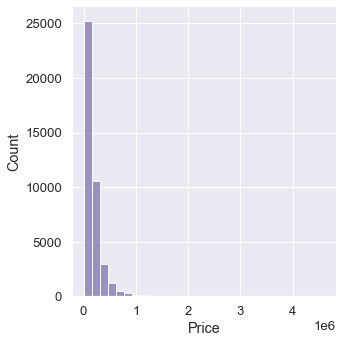

In [68]:
sns.displot(df['Price'], kde=False, bins=30, color='m')

<AxesSubplot:xlabel='Price', ylabel='Density'>

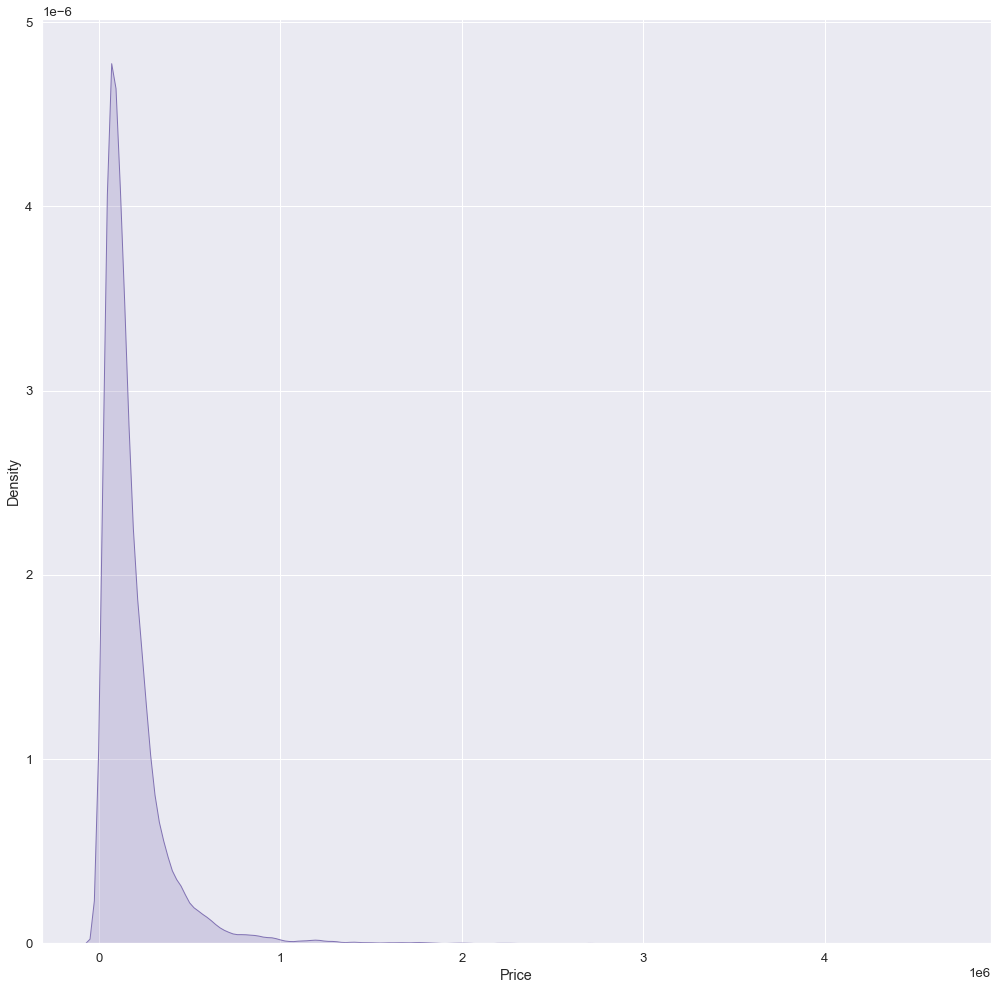

In [69]:
sns.kdeplot(df['Price'], shade=True, color='m')

<b>the highest km 25000 and There are outliers</b>

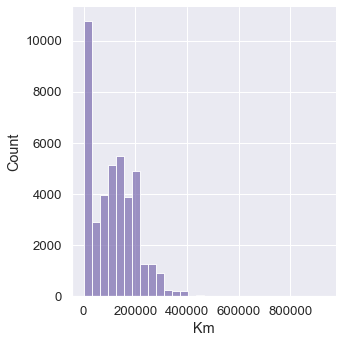

In [70]:
sns.displot(df['Km'], kde=False, bins=30, color='m')

<AxesSubplot:xlabel='Km', ylabel='Density'>

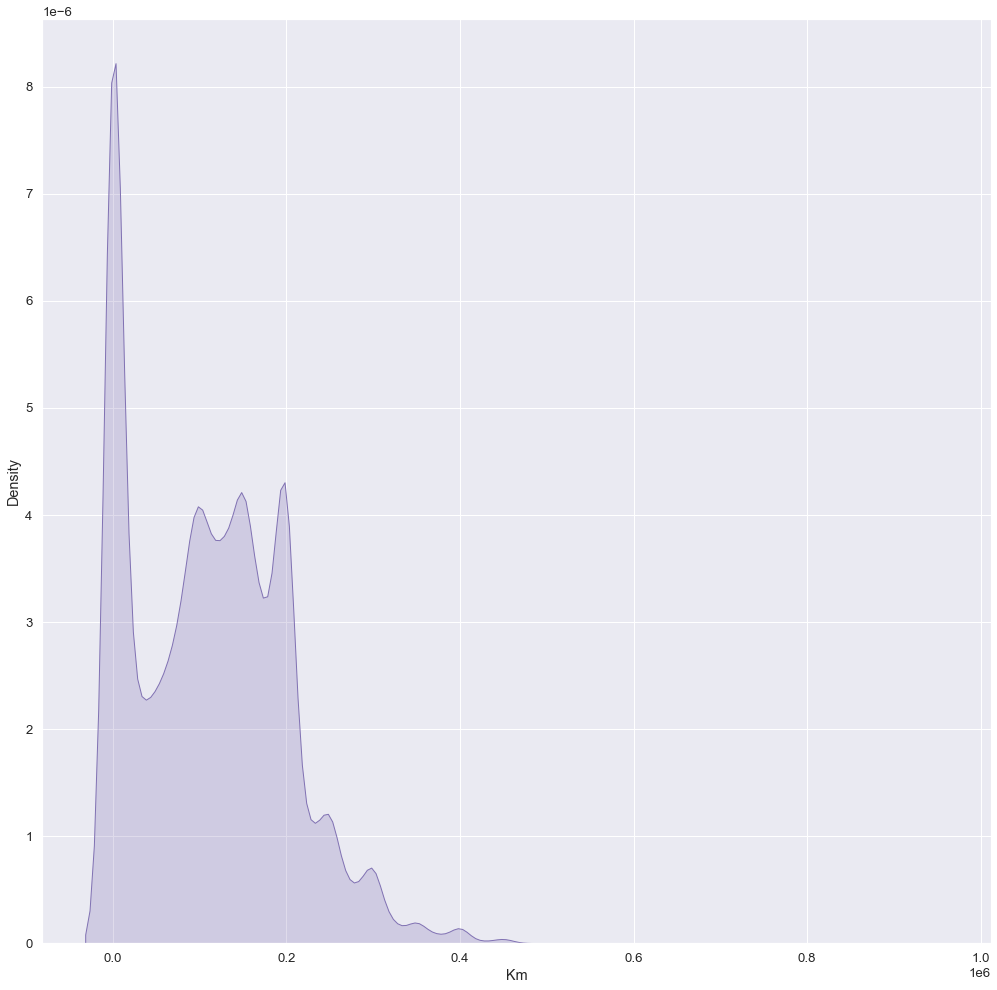

In [71]:
sns.kdeplot(df['Km'], shade=True, color='m')

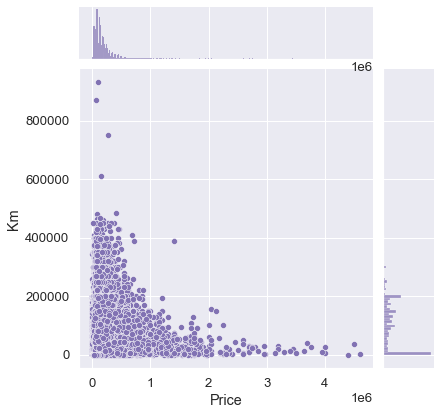

In [72]:
sns.jointplot(x='Price', y='Km', data=df, color='m')

<b>Each KM increases, the price decreases</b>

df.head(5)

<AxesSubplot:xlabel='count', ylabel='Make'>

C:\Users\ELPOP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ELPOP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


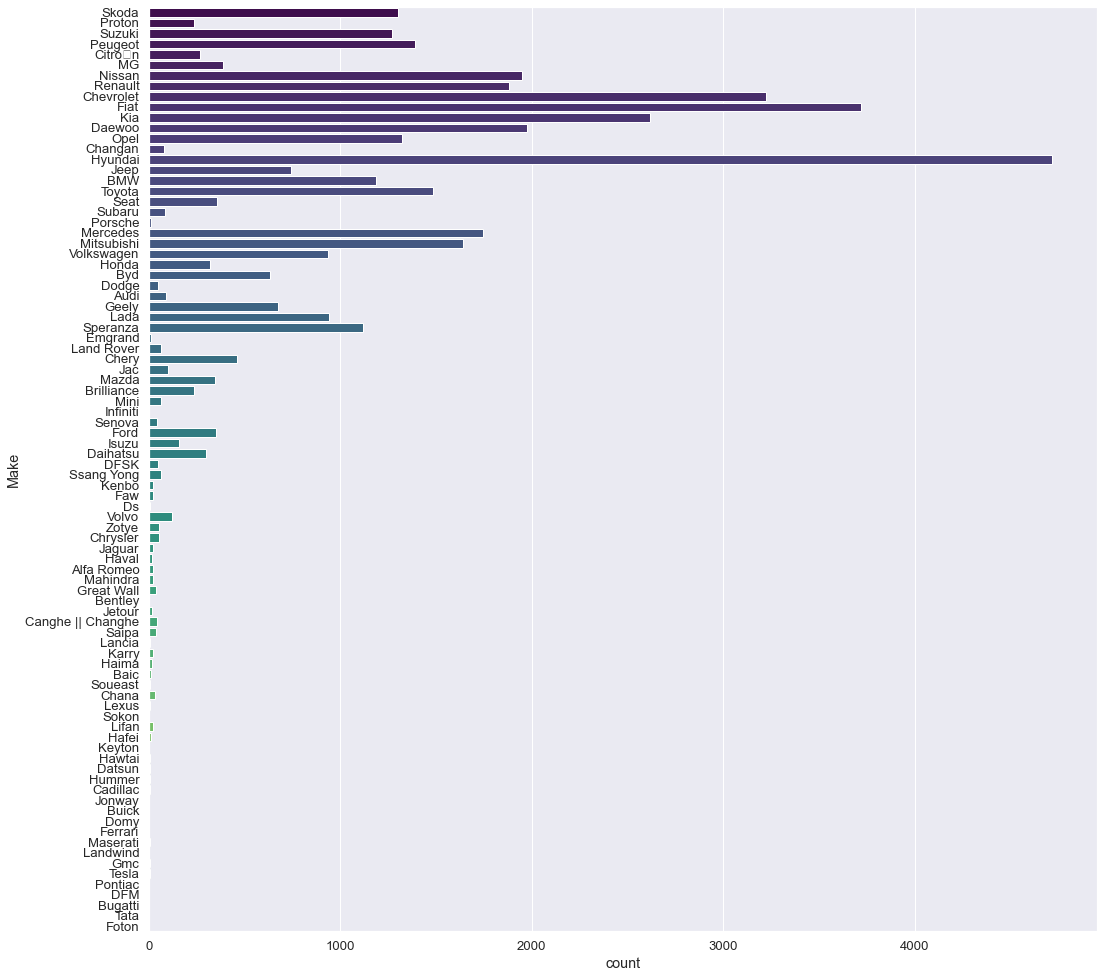

In [73]:
sns.countplot(y='Make', data=df, palette='viridis')

<b>the most make is hyundai</b>

<AxesSubplot:xlabel='count', ylabel='Used since'>

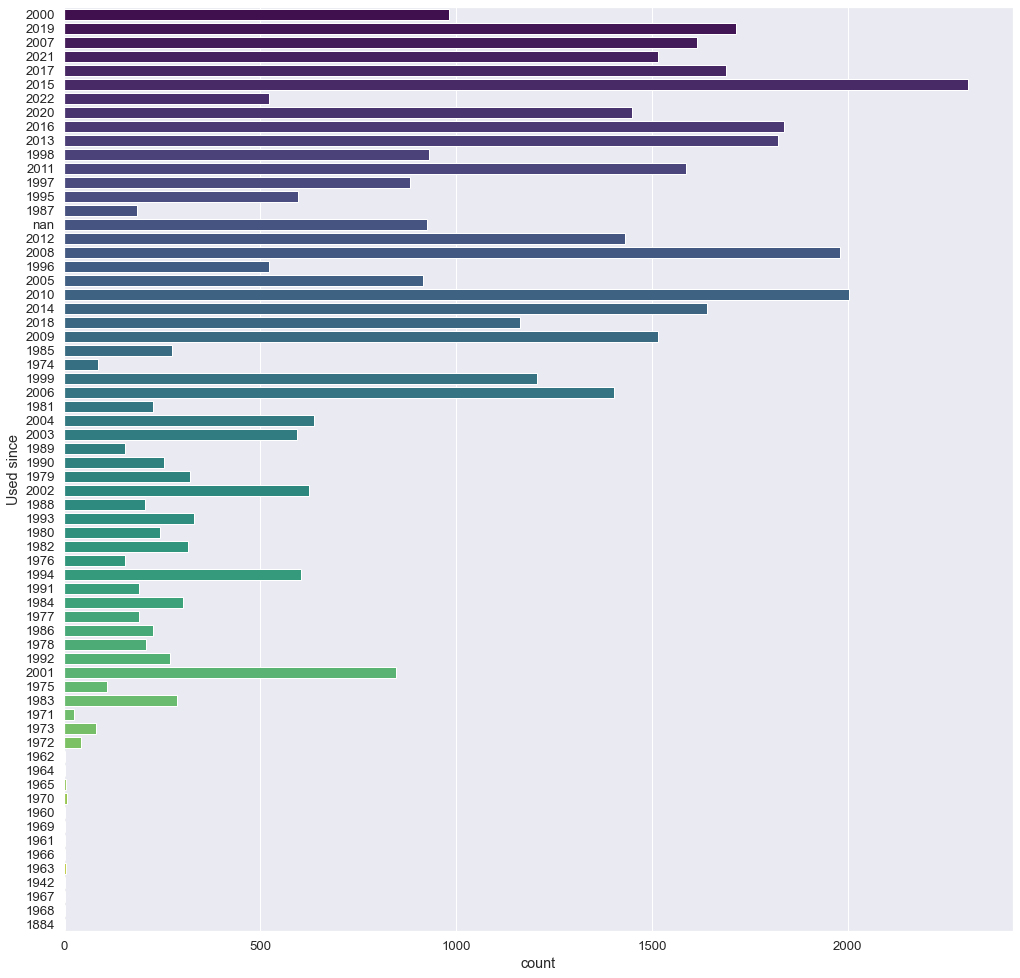

In [74]:
sns.countplot(y='Used since', data=df, palette='viridis')

<b> the most used since 2015</b>

<AxesSubplot:xlabel='Transmission', ylabel='count'>

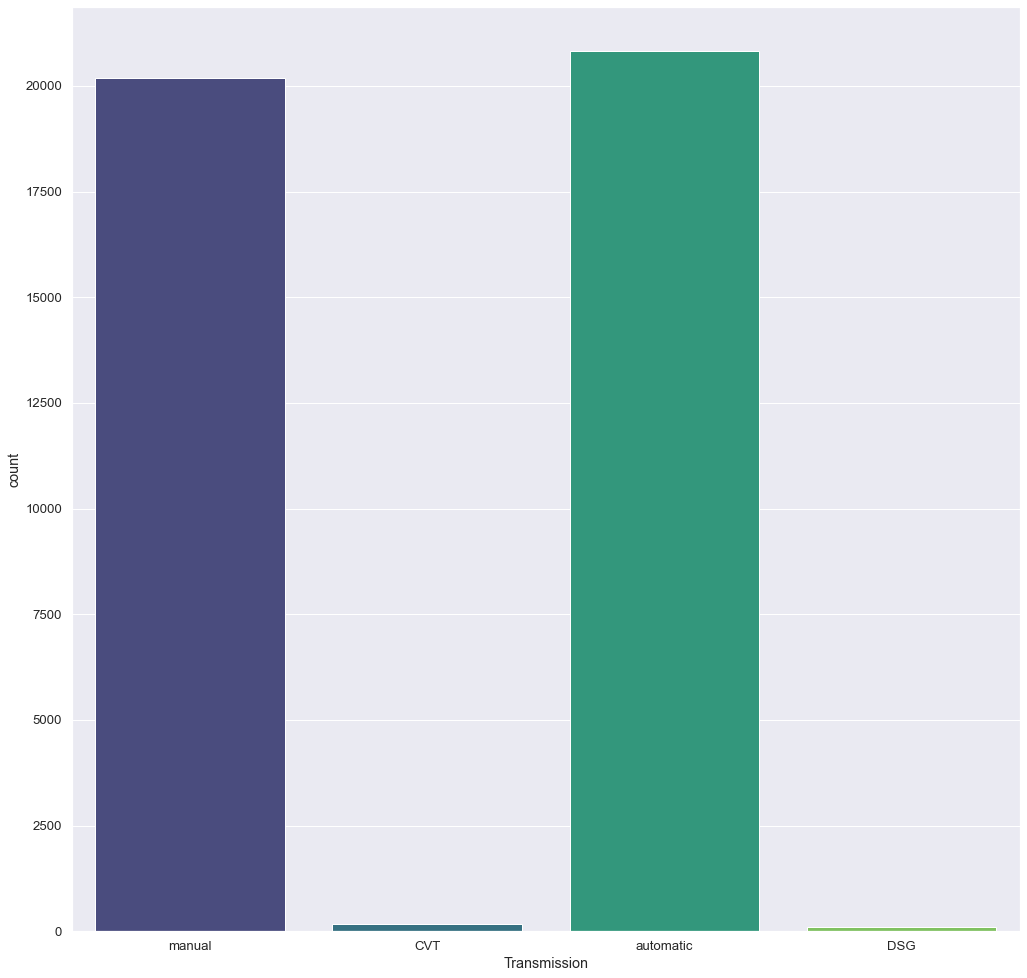

In [75]:
sns.countplot(x='Transmission', data=df, palette='viridis')

<b> the most Transmission is automatic </b>

<AxesSubplot:xlabel='count', ylabel='City'>

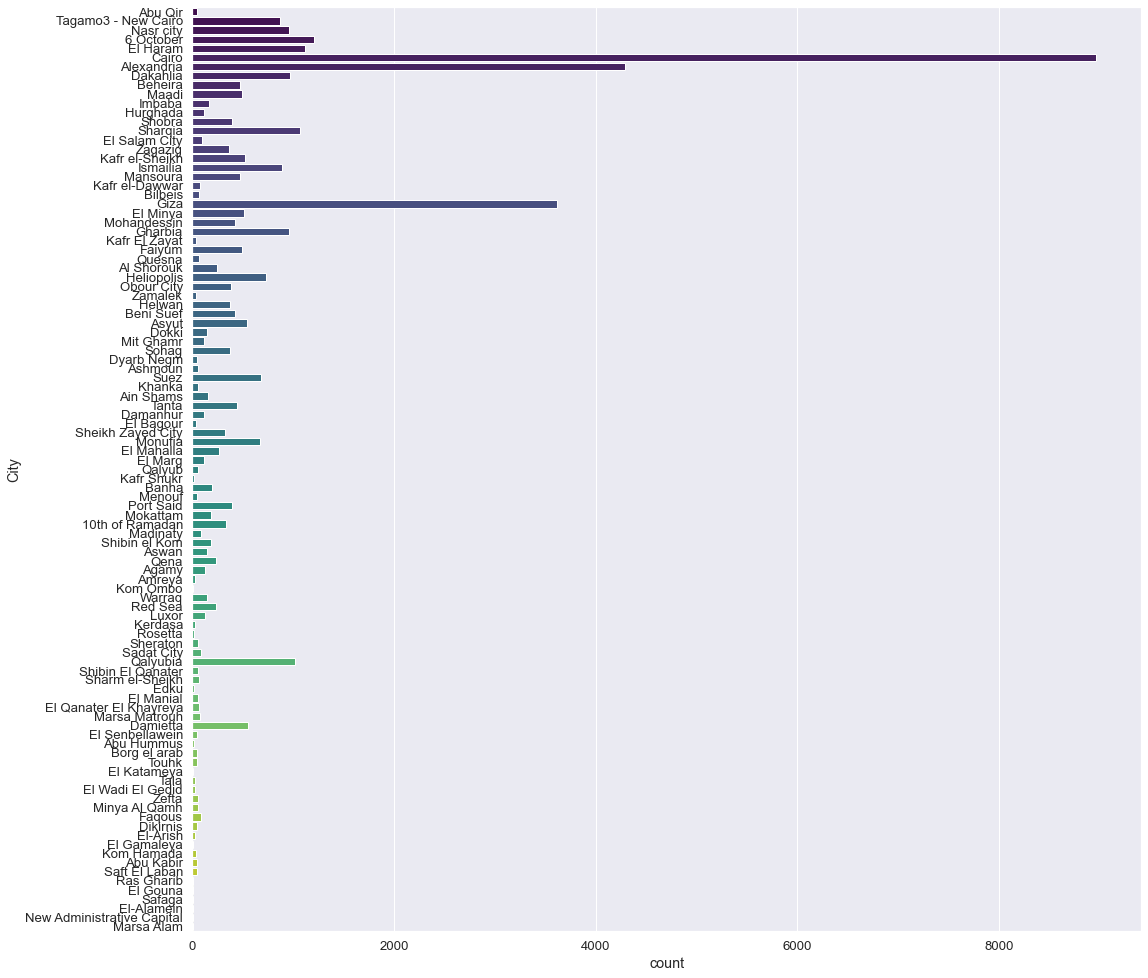

In [76]:
sns.countplot(y='City', data=df, palette='viridis')

<b>the most city is cairo</b>

<AxesSubplot:xlabel='count', ylabel='Color'>

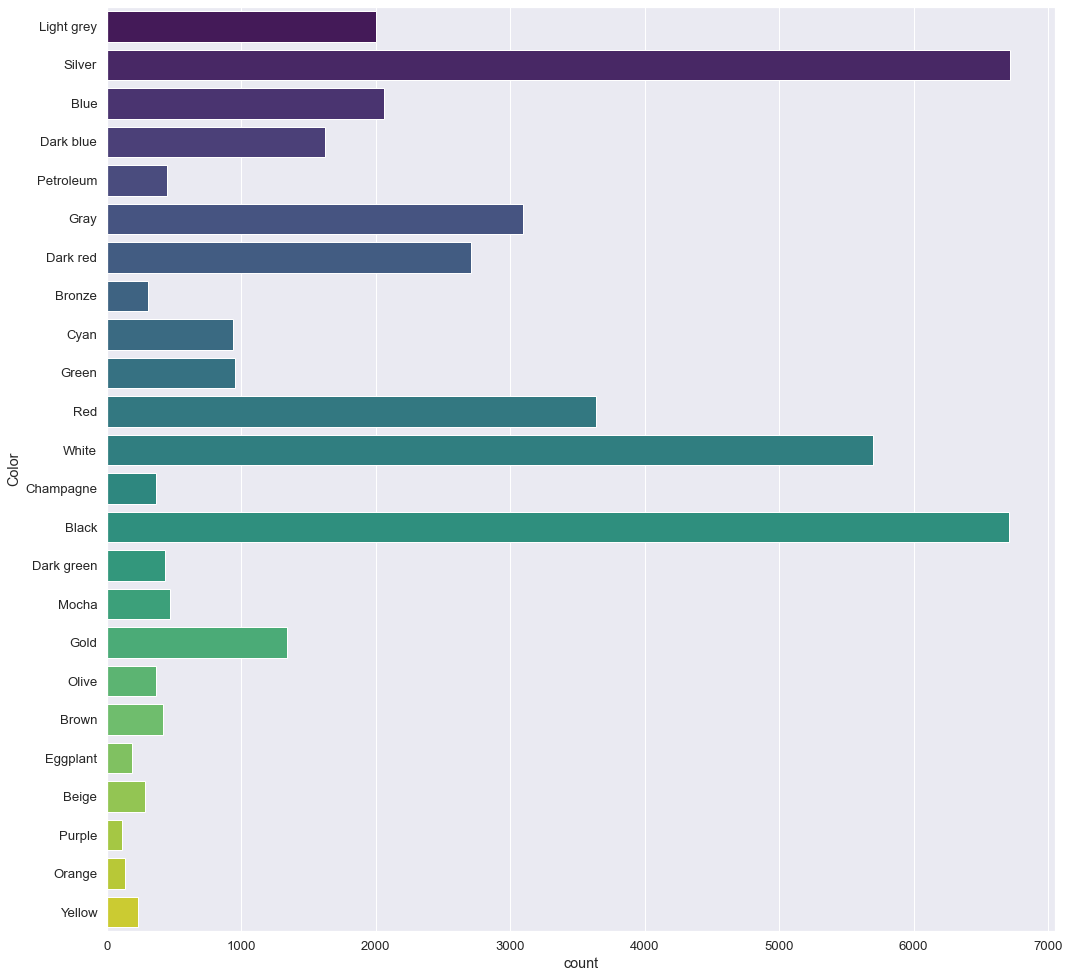

In [77]:
sns.countplot(y='Color', data=df, palette='viridis')

<b>the most color silver </b>

<AxesSubplot:xlabel='Fuel', ylabel='count'>

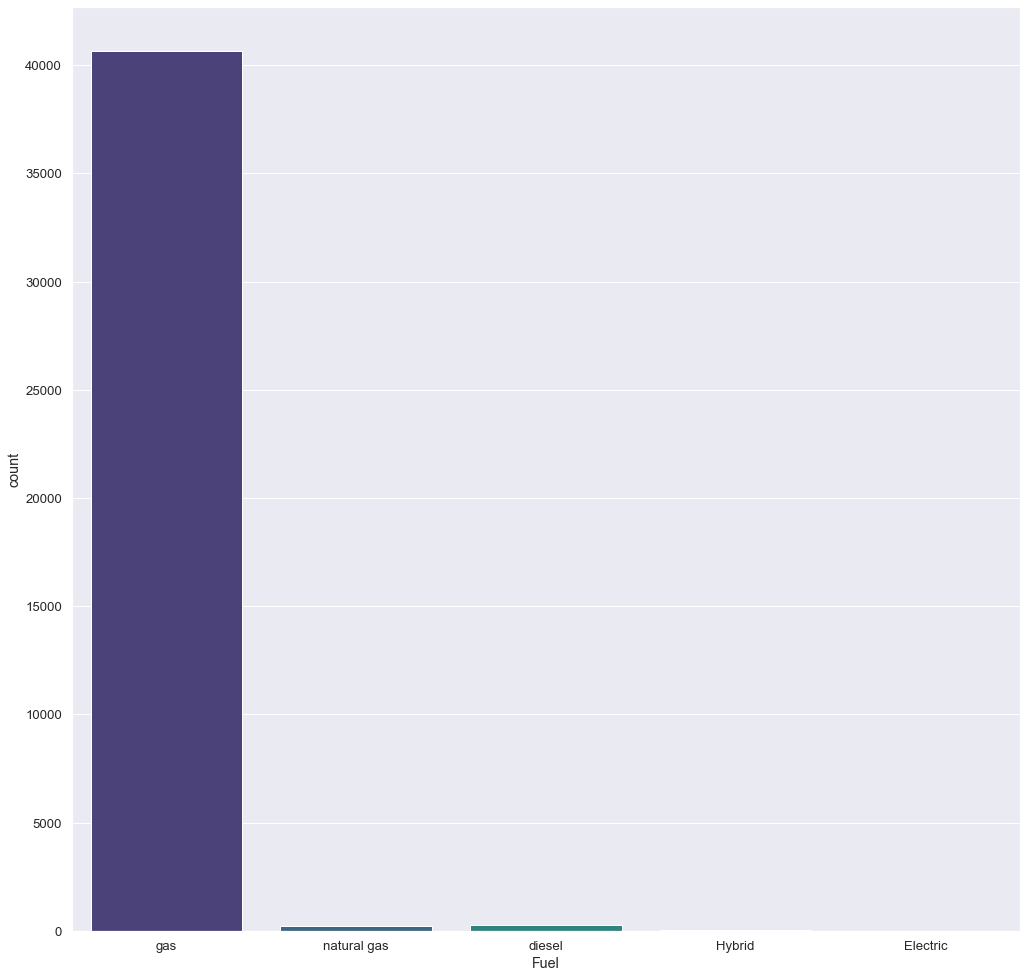

In [78]:
sns.countplot(x='Fuel', data=df, palette='viridis')

<b> the most fuel used is gas</b>

<AxesSubplot:xlabel='Leather seats', ylabel='count'>

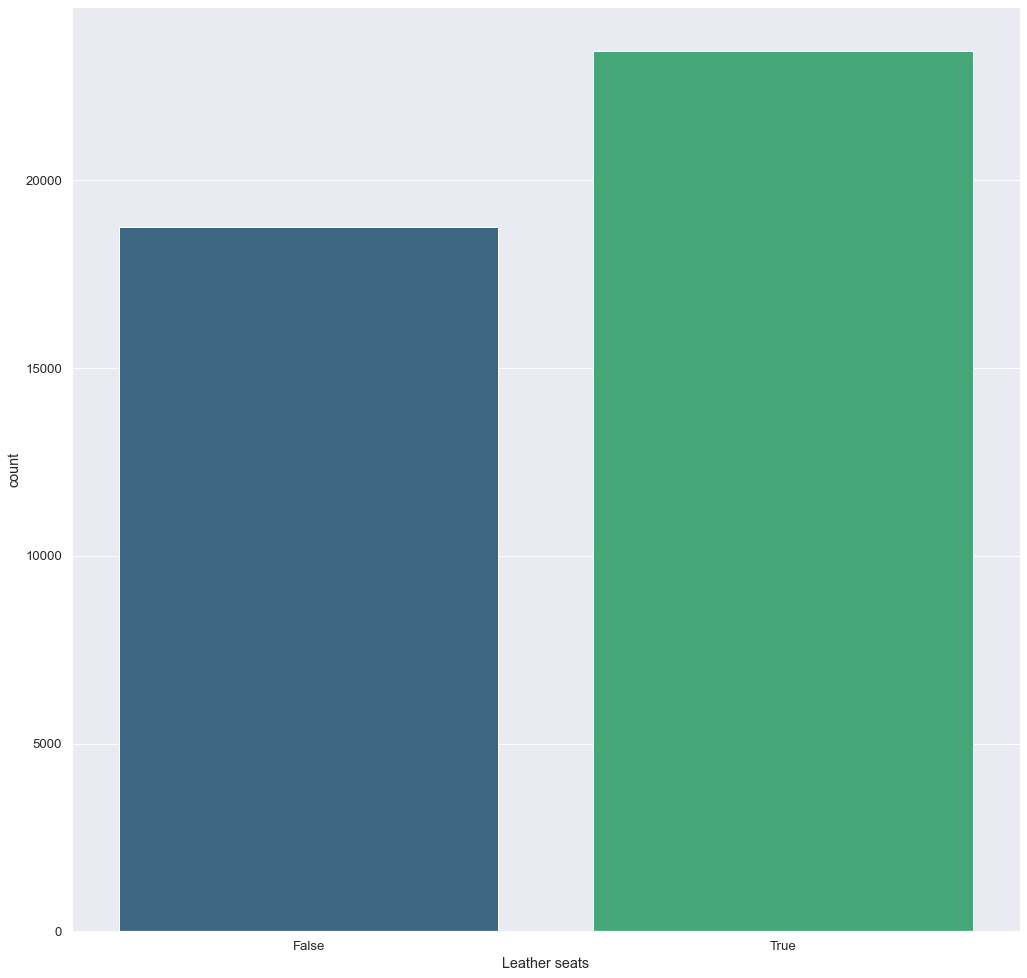

In [79]:
sns.countplot(x='Leather seats', data=df, palette='viridis')

<b> the most Leather seats</b>

<AxesSubplot:xlabel='Closing mirrors', ylabel='count'>

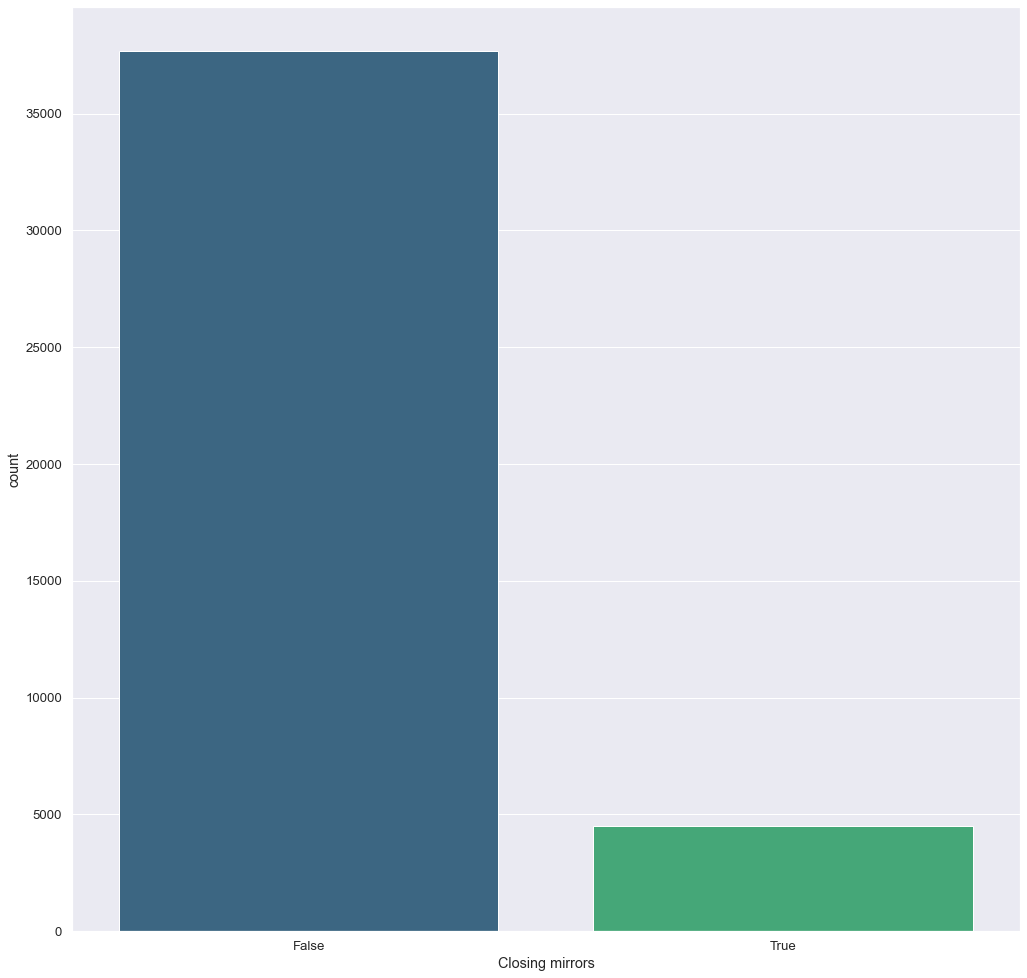

In [80]:

sns.countplot(x='Closing mirrors', data=df, palette='viridis')

<b>Most of the cars (>35K) does not have Closing mirrors</b>

<AxesSubplot:xlabel='Intelligent parking system', ylabel='count'>

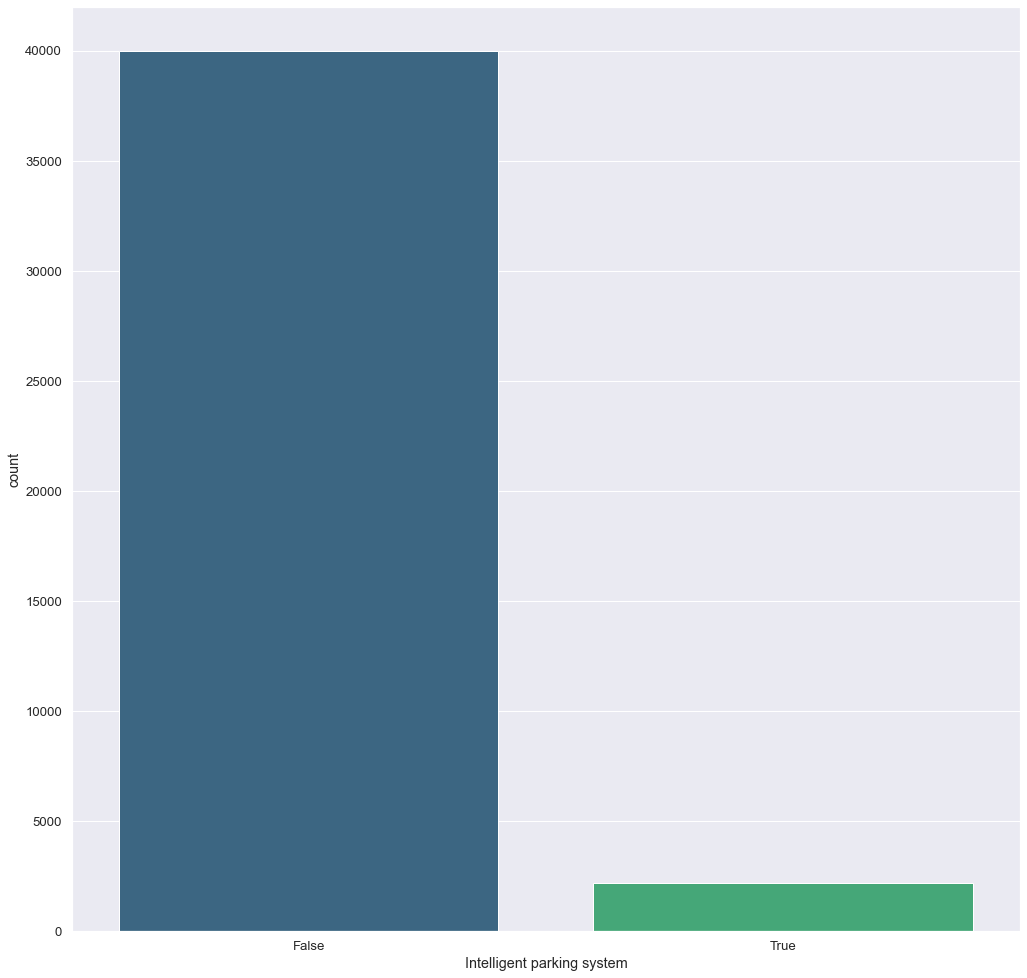

In [81]:
sns.countplot(x='Intelligent parking system', data=df, palette='viridis')

<b>Most of the cars (>4000) does not have  Intelligent parking system</b>

<AxesSubplot:xlabel='Sunroof', ylabel='count'>

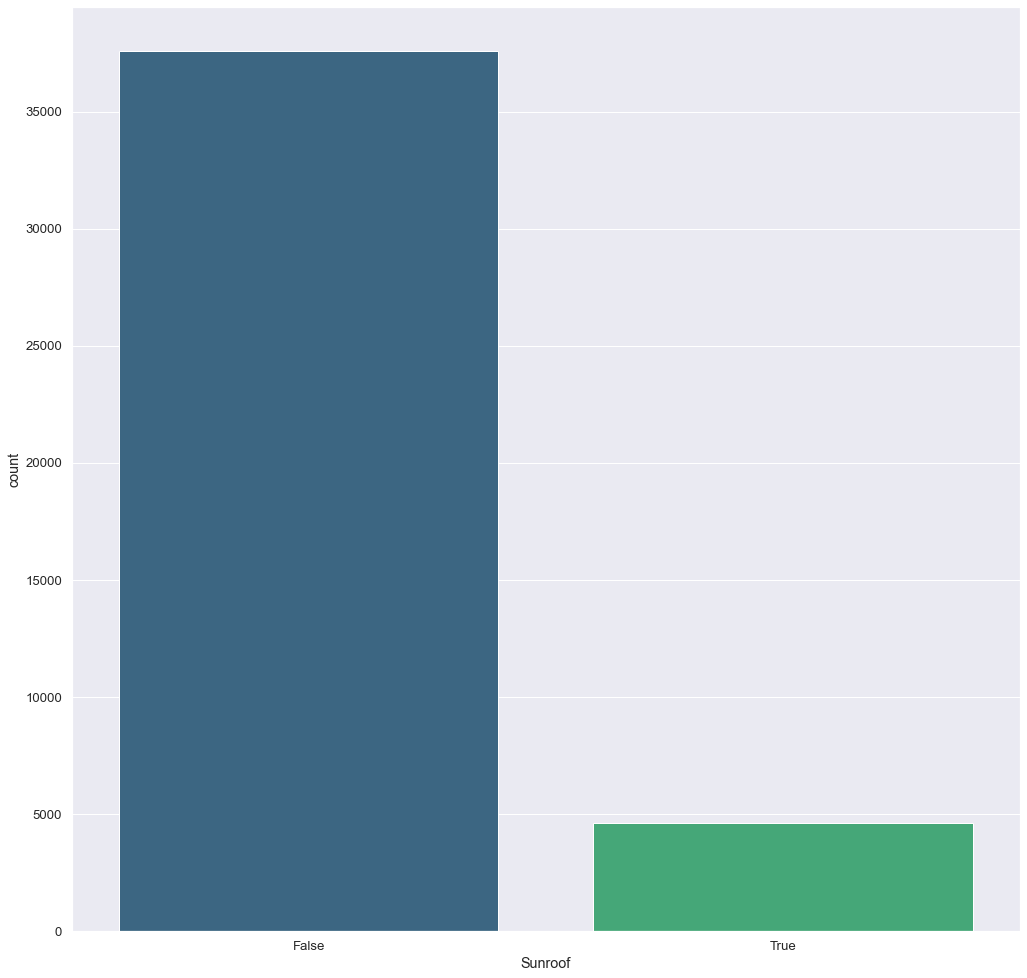

In [82]:
sns.countplot(x='Sunroof', data=df, palette='viridis')

<b>Most of the cars (>35K) does not have Sunroof</b>

<AxesSubplot:xlabel='Fabric brushes', ylabel='count'>

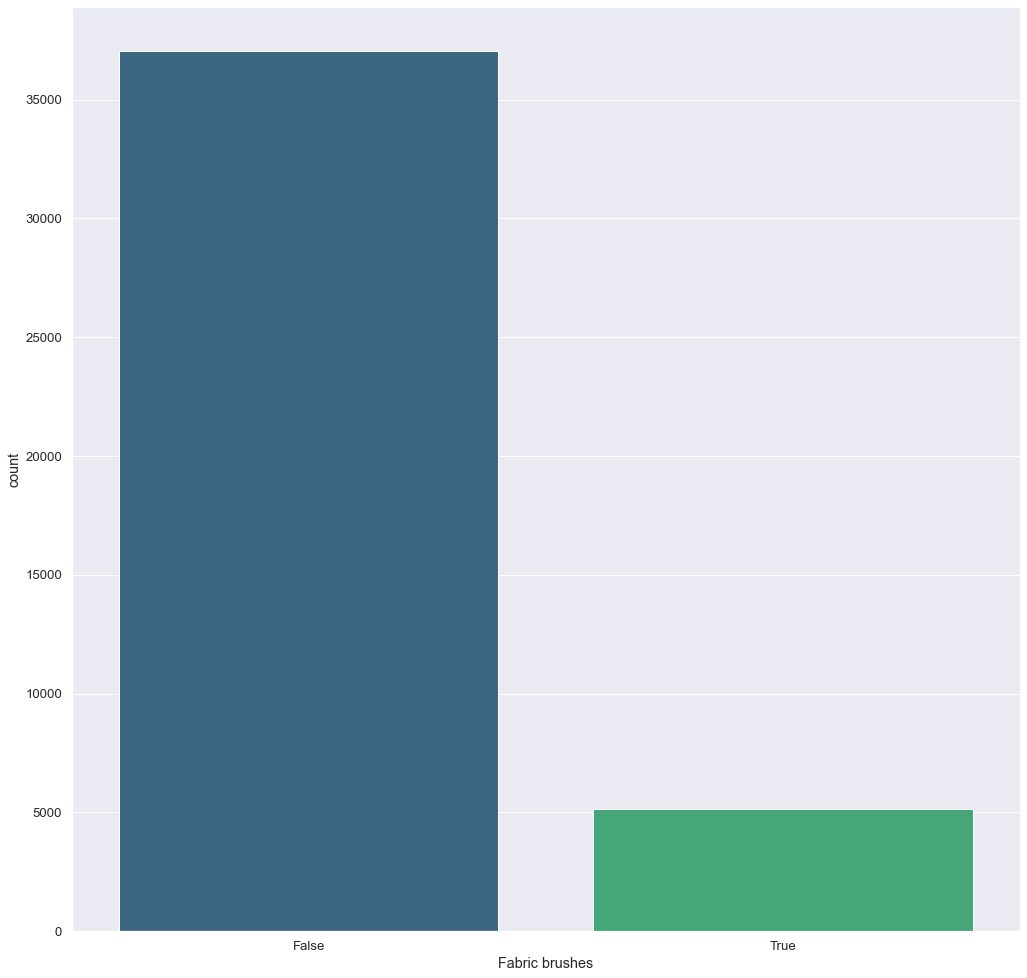

In [83]:
sns.countplot(x='Fabric brushes', data=df, palette='viridis')

<b>Most of the cars (>35K) does not have  Fabric brushes</b>

<AxesSubplot:xlabel='Air Conditioning', ylabel='count'>

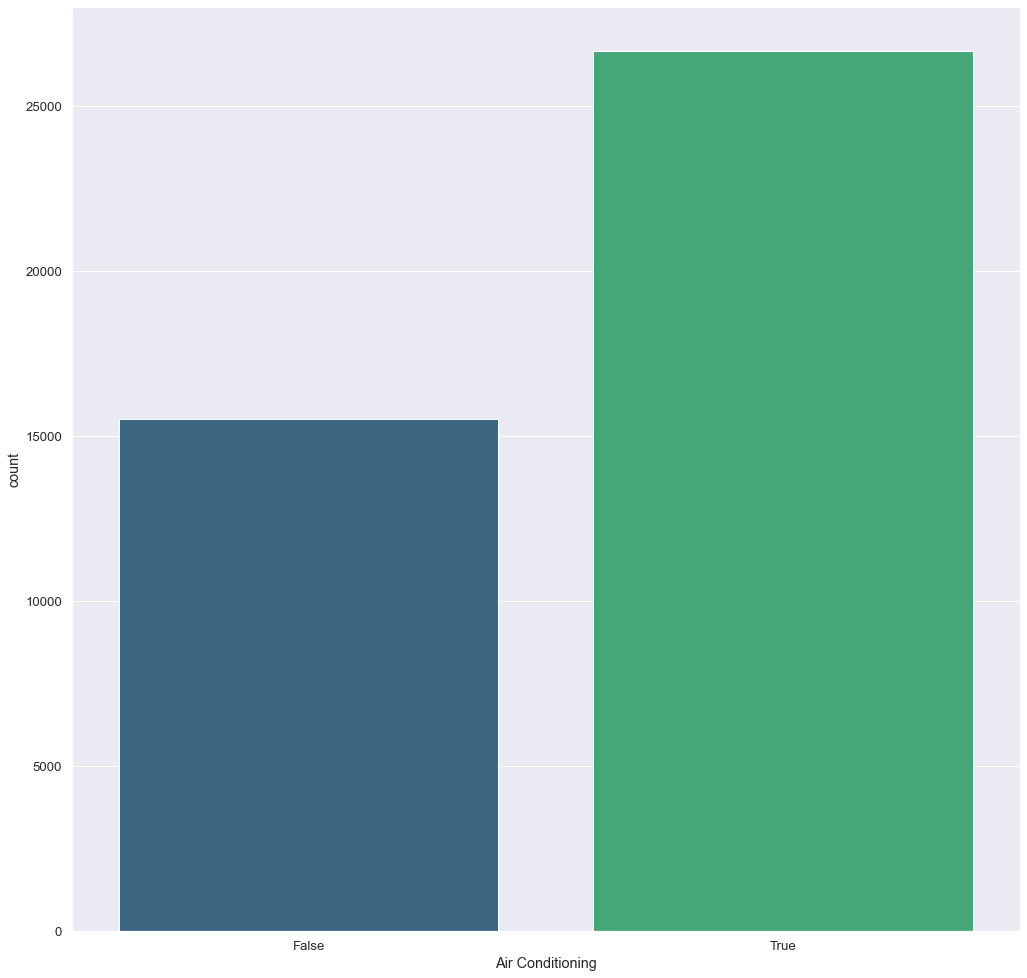

In [84]:
sns.countplot(x='Air Conditioning', data=df, palette='viridis')

<b> Most of the cars (>28K) does  have Air Conditioning </b>

<AxesSubplot:xlabel='Power Steering', ylabel='count'>

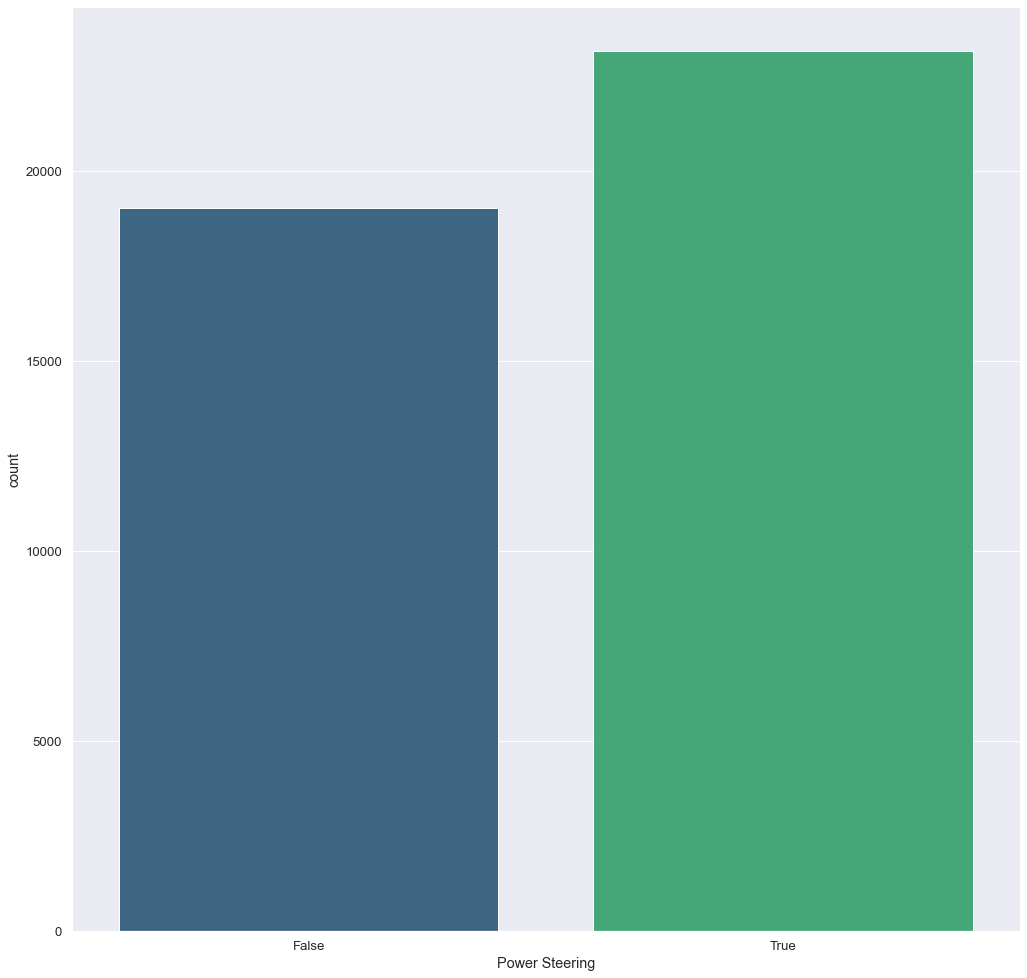

In [85]:
sns.countplot(x='Power Steering', data=df, palette='viridis')

<b><b> Most of the cars (>23K) does  have Power Steering </b></b>

<AxesSubplot:xlabel='Remote Keyless', ylabel='count'>

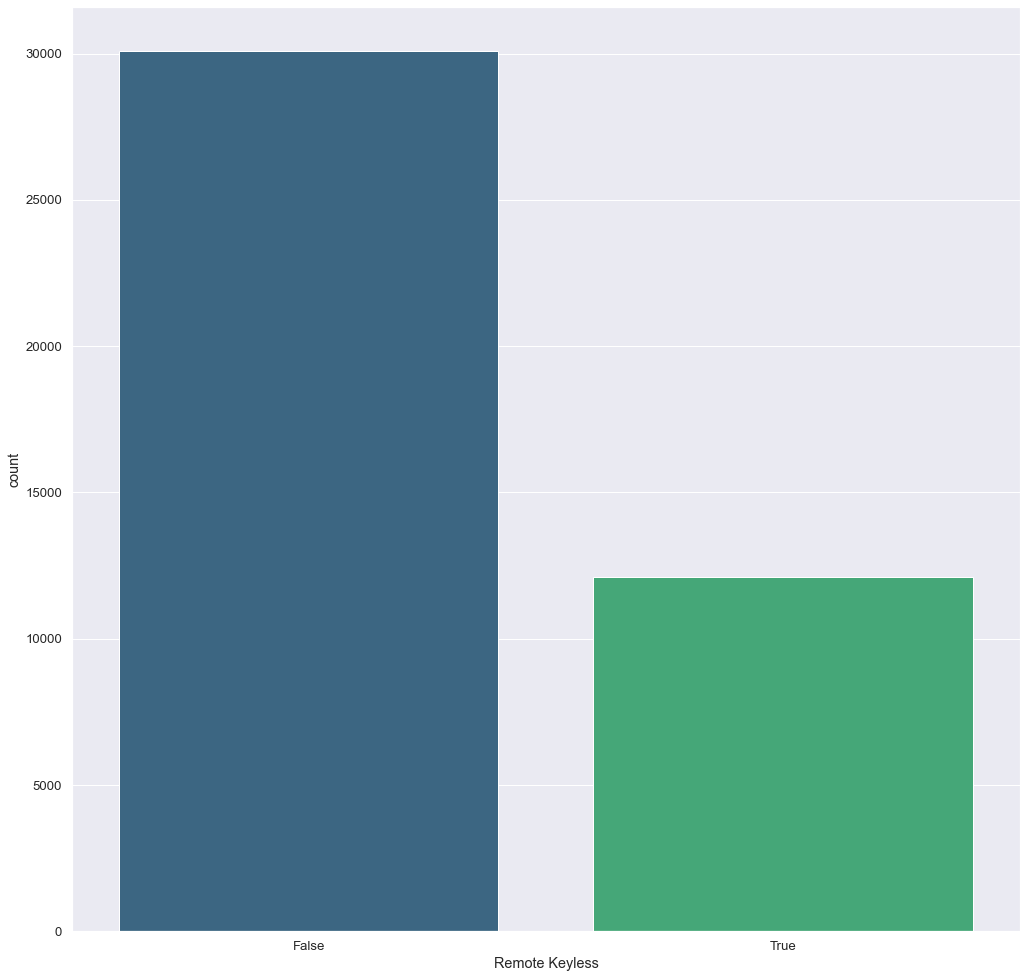

In [86]:
sns.countplot(x='Remote Keyless', data=df, palette='viridis')

<b> Most of the cars (30K) does  have  Remote Keyless </b>

<AxesSubplot:xlabel='Electric mirrors', ylabel='count'>

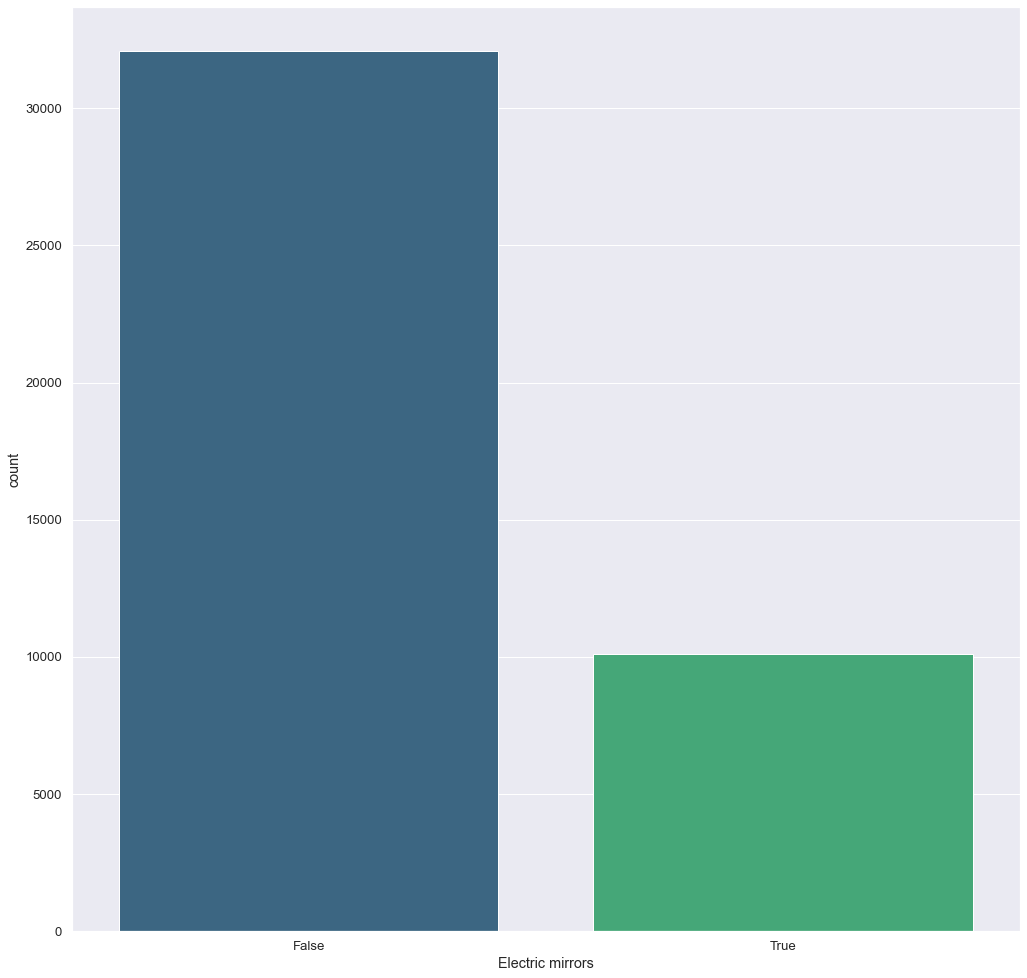

In [87]:

sns.countplot(x='Electric mirrors', data=df, palette='viridis')

<b> Most of the cars (>30K) does not  have  Electric mirrors </b>

<AxesSubplot:xlabel='Front Power Windows', ylabel='count'>

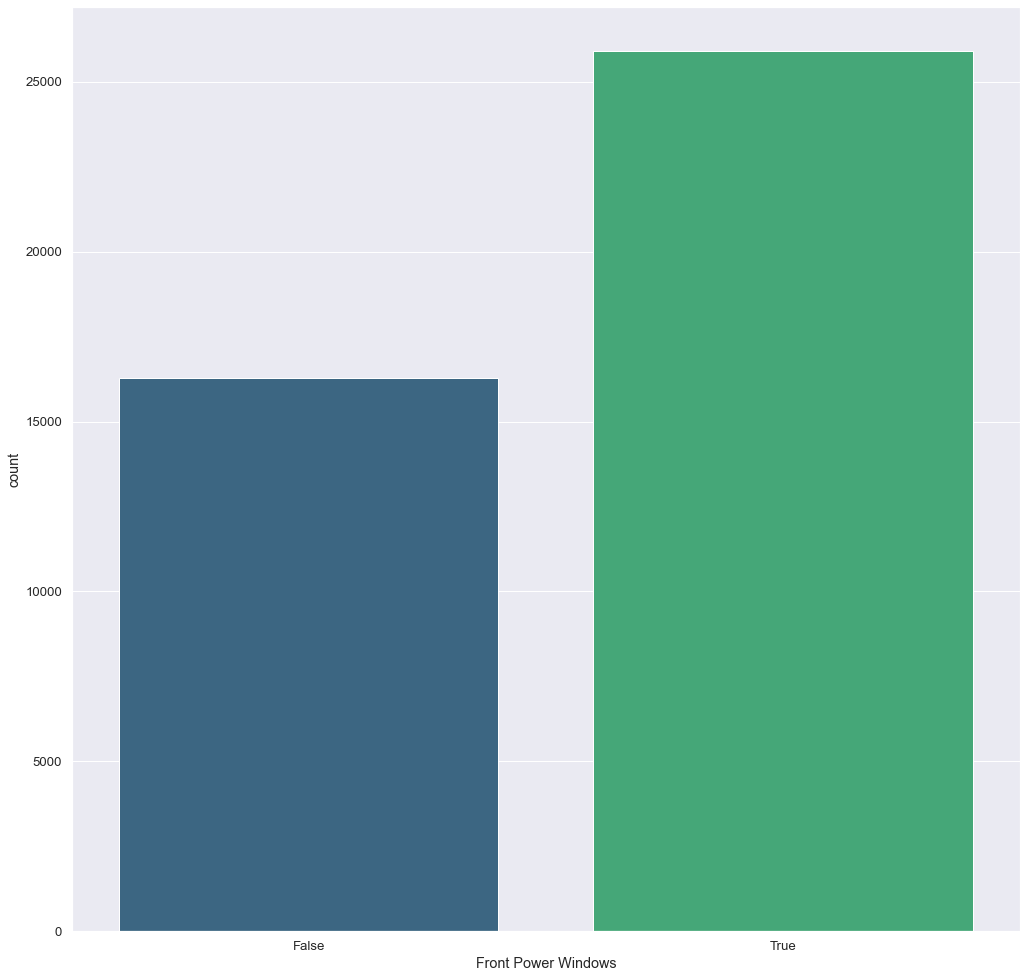

In [88]:
sns.countplot(x='Front Power Windows', data=df, palette='viridis')

<b> Most of the cars (>25K) does  have Front Power Windows </b>

<AxesSubplot:xlabel='Back Power Windows', ylabel='count'>

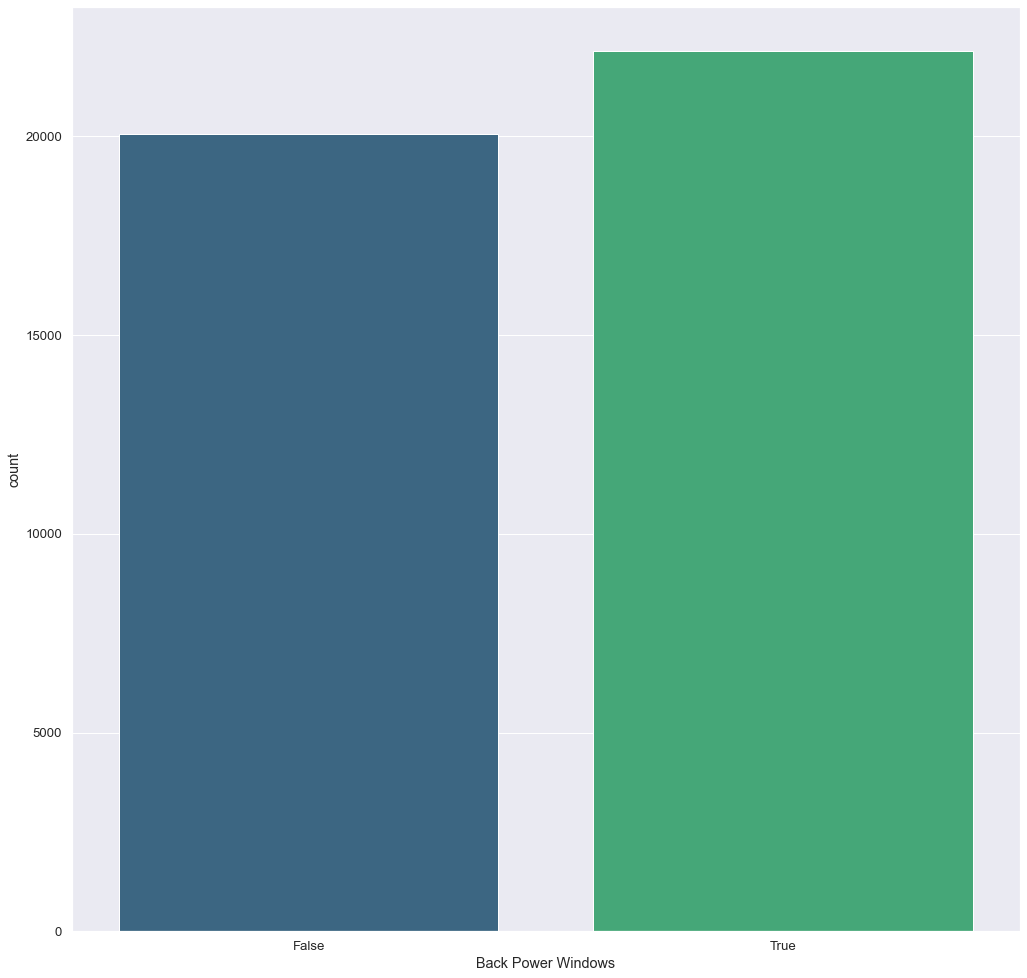

In [89]:
sns.countplot(x='Back Power Windows', data=df, palette='viridis')

<b> Most of the cars (>20K) does  have Back Power Windows</b>

<AxesSubplot:xlabel='Tinted Glass', ylabel='count'>

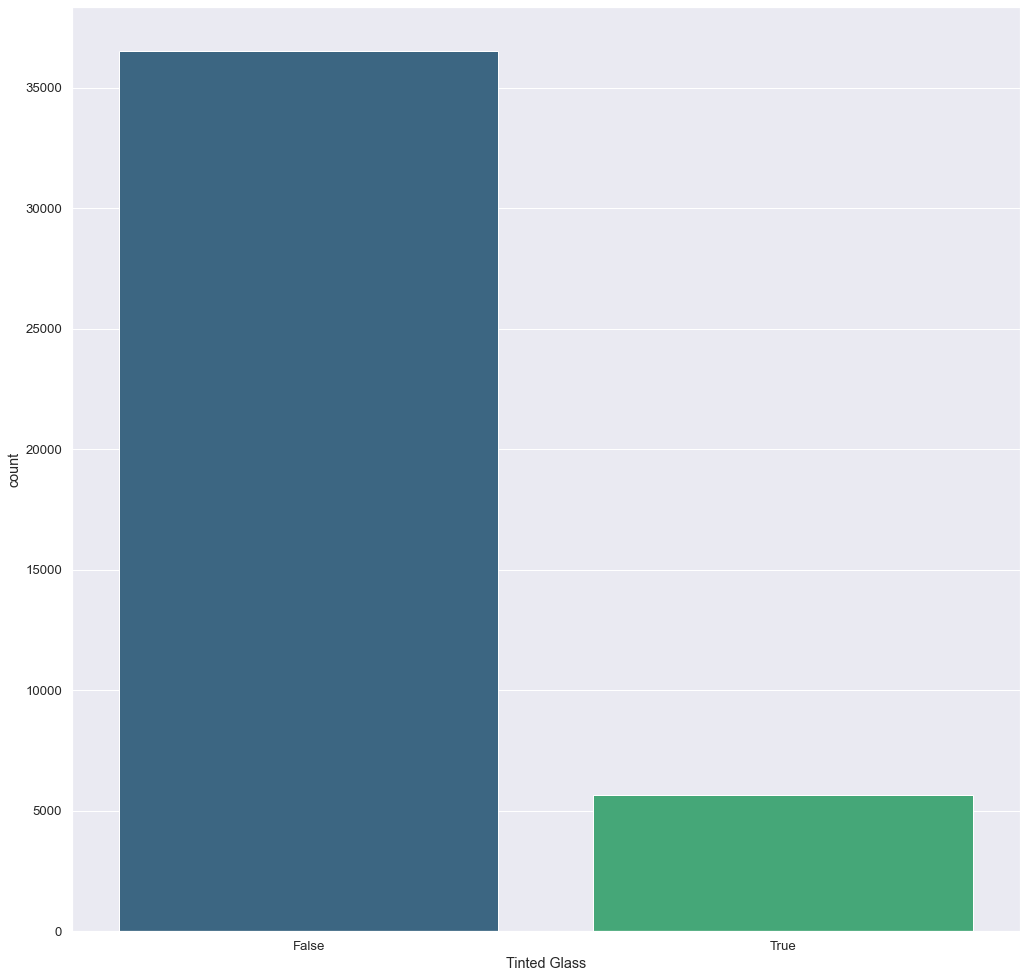

In [90]:
sns.countplot(x='Tinted Glass', data=df, palette='viridis')

<b> Most of the cars (>35K) does  not have Tinted Glass </b>

<AxesSubplot:xlabel='CD Player', ylabel='count'>

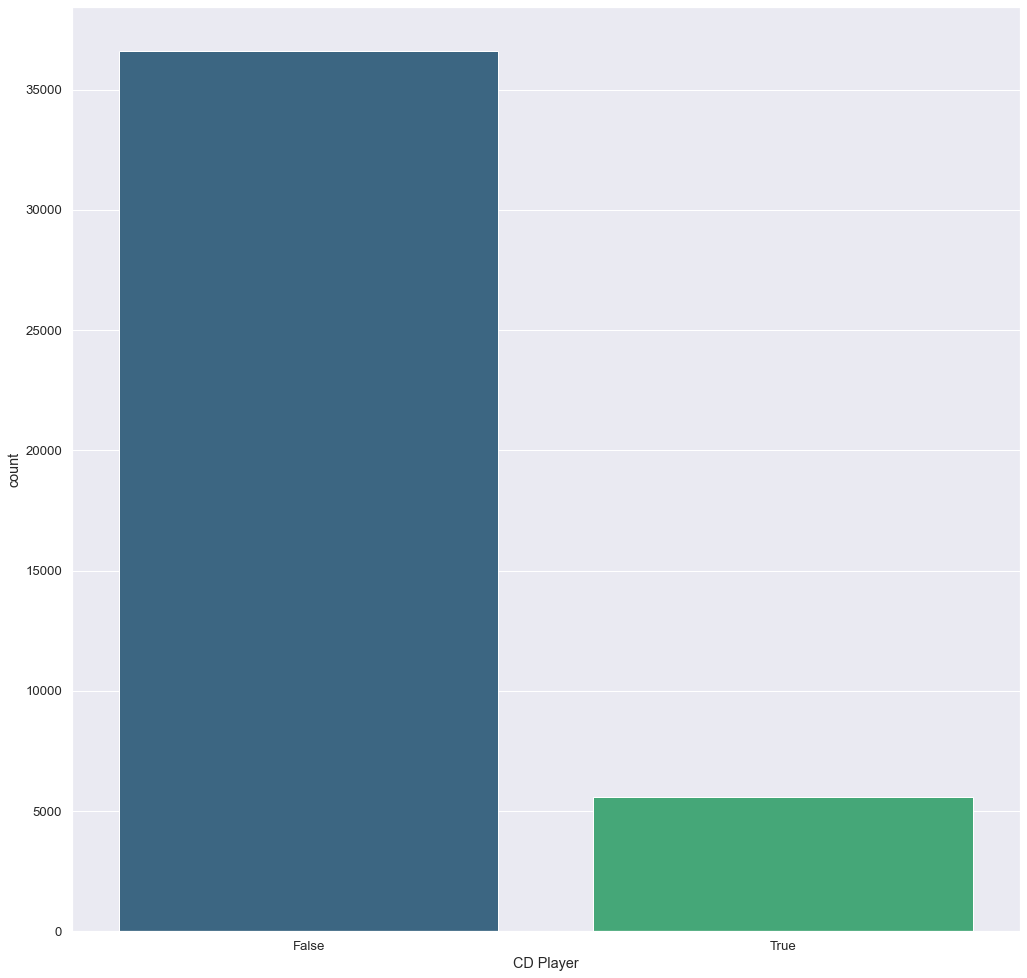

In [91]:
sns.countplot(x='CD Player', data=df, palette='viridis')

<b> Most of the cars (>35K) does  not have CD Player </b>

<AxesSubplot:xlabel='DVD Player', ylabel='count'>

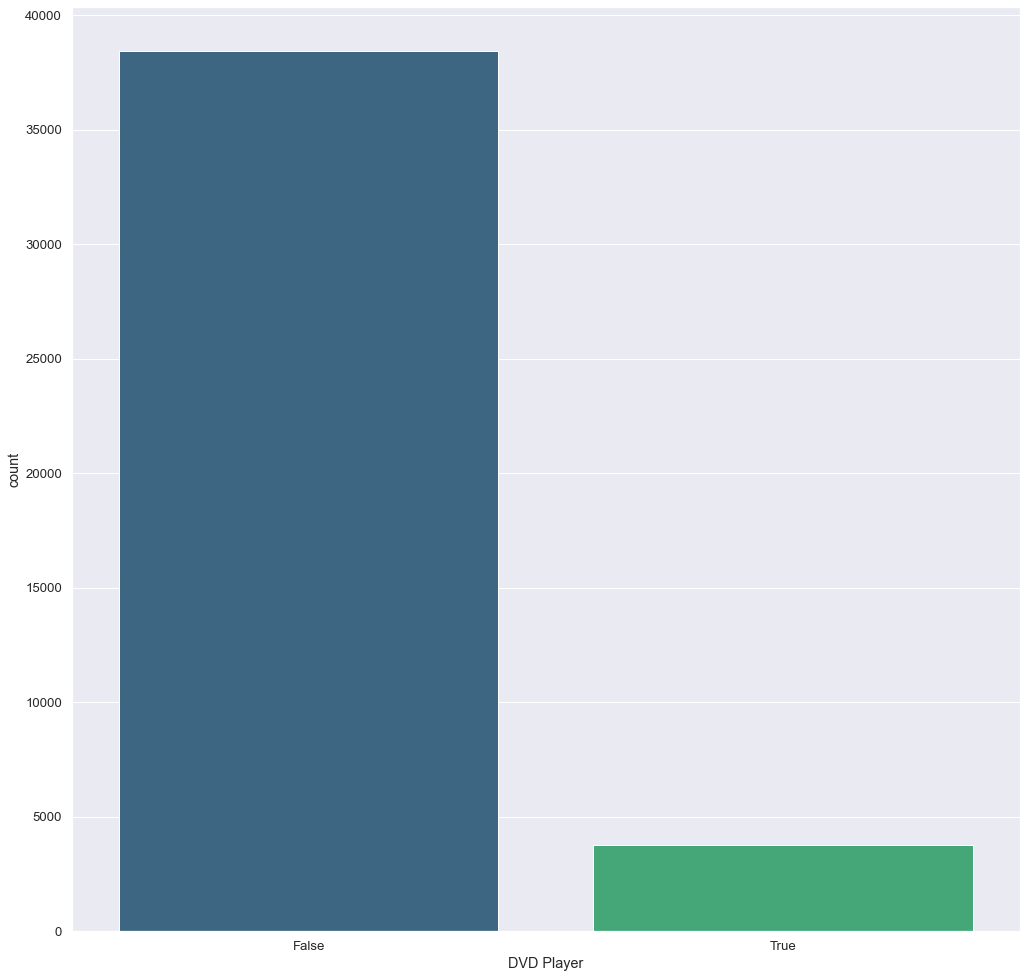

In [92]:
sns.countplot(x='DVD Player', data=df, palette='viridis')

<b> Most of the cars (>35K) does  not have  DVD Plyer </b>

<AxesSubplot:xlabel='Bluetooth', ylabel='count'>

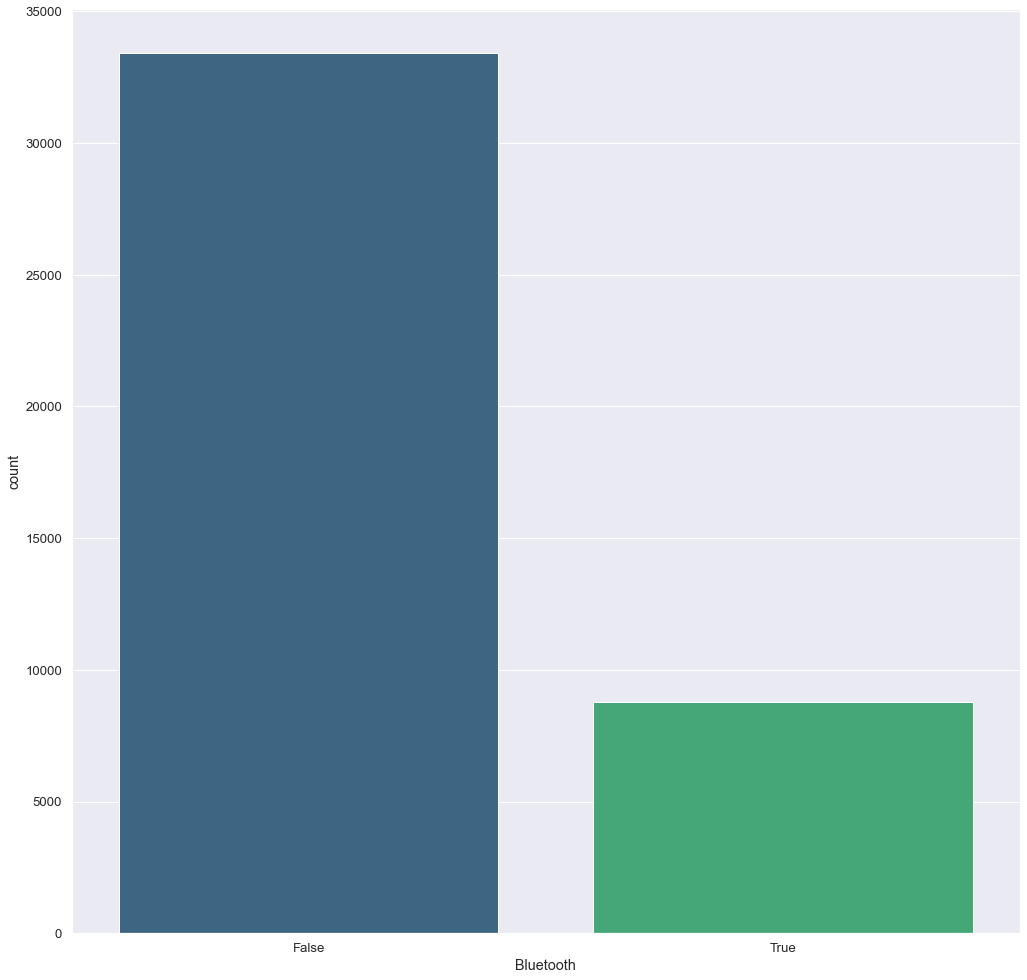

In [93]:
sns.countplot(x='Bluetooth', data=df, palette='viridis')

<b> Most of the cars (>35K) does  not have Bluetooth </b>

<AxesSubplot:xlabel='Multifunction', ylabel='count'>

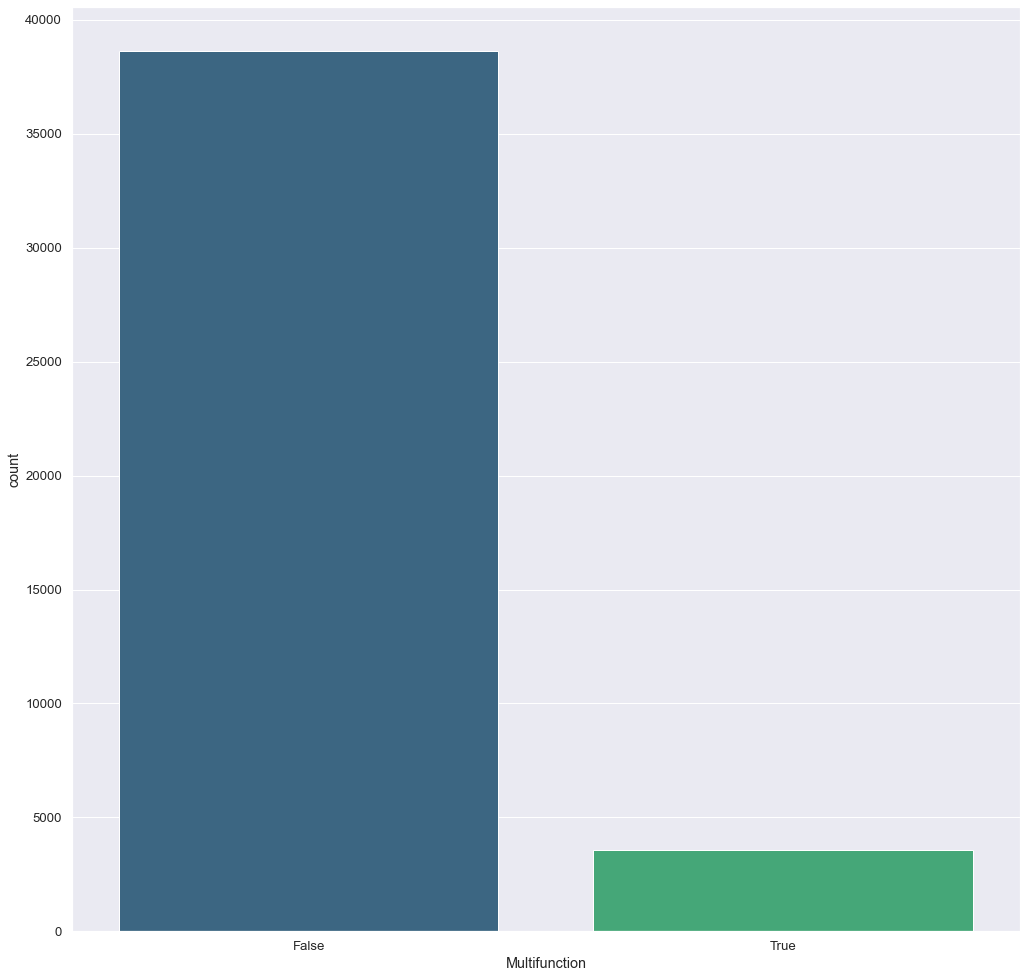

In [94]:
sns.countplot(x='Multifunction', data=df, palette='viridis')

<b> Most of the cars (>35K) does  not have  Multifunction </b>

<AxesSubplot:xlabel='Cassette Radio', ylabel='count'>

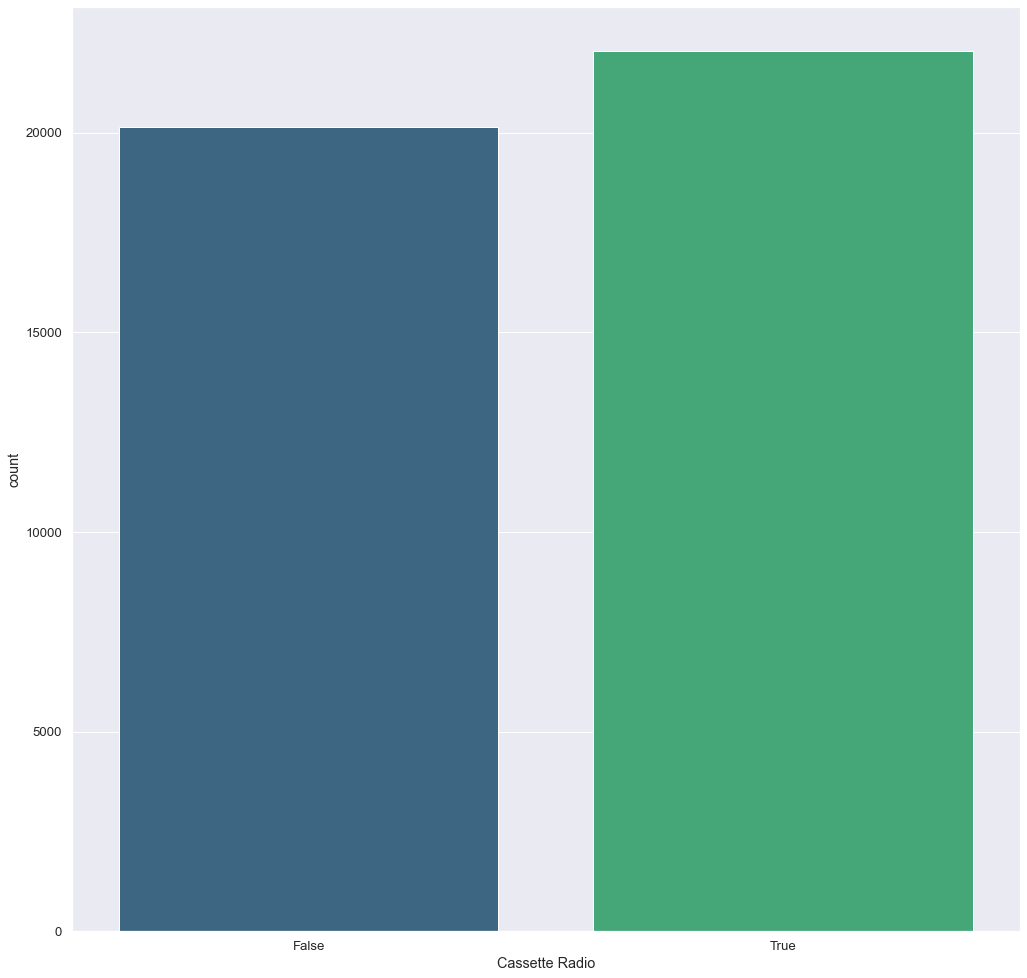

In [95]:
sns.countplot(x='Cassette Radio', data=df, palette='viridis')

<b> Most of the cars (>20K) does   have  Cassette Radio  </b>

<AxesSubplot:xlabel='AUX', ylabel='count'>

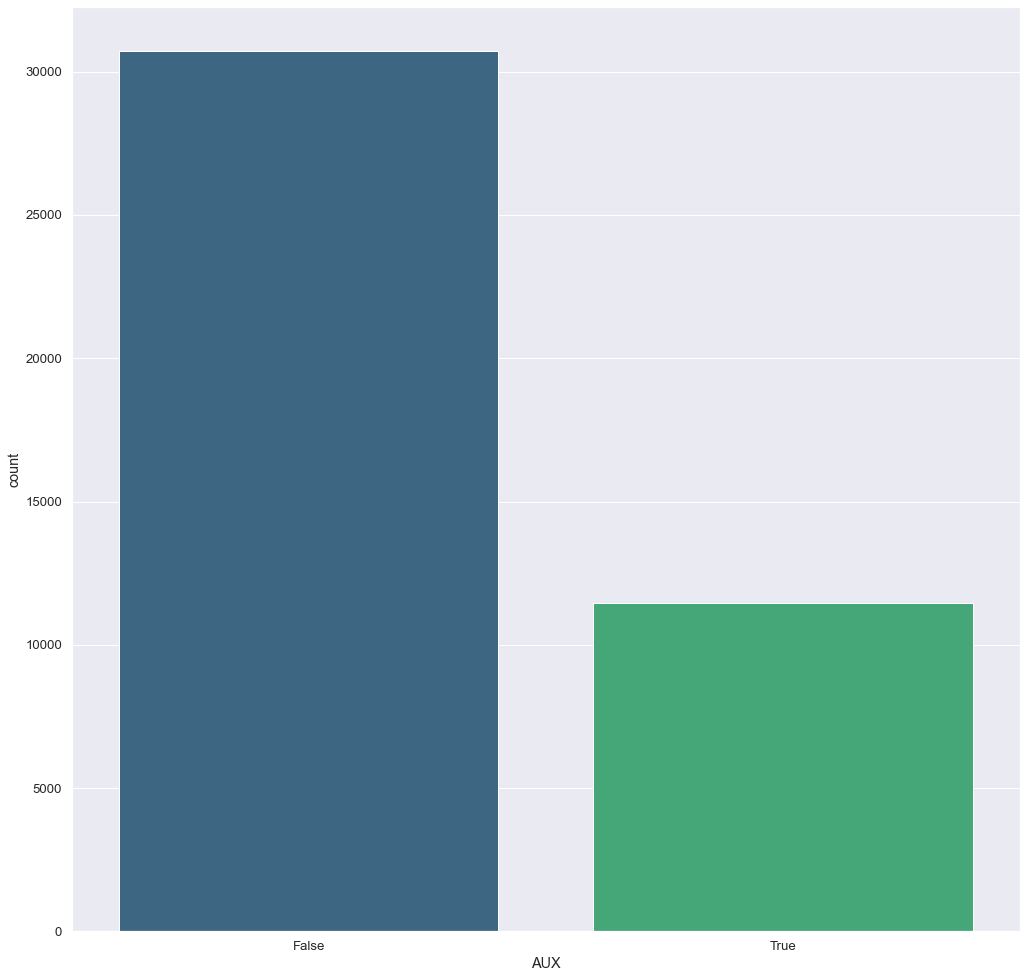

In [96]:

sns.countplot(x='AUX', data=df, palette='viridis')

<b> Most of the cars (>35K) does  not have  AUX </b>

<AxesSubplot:xlabel='CD Changer', ylabel='count'>

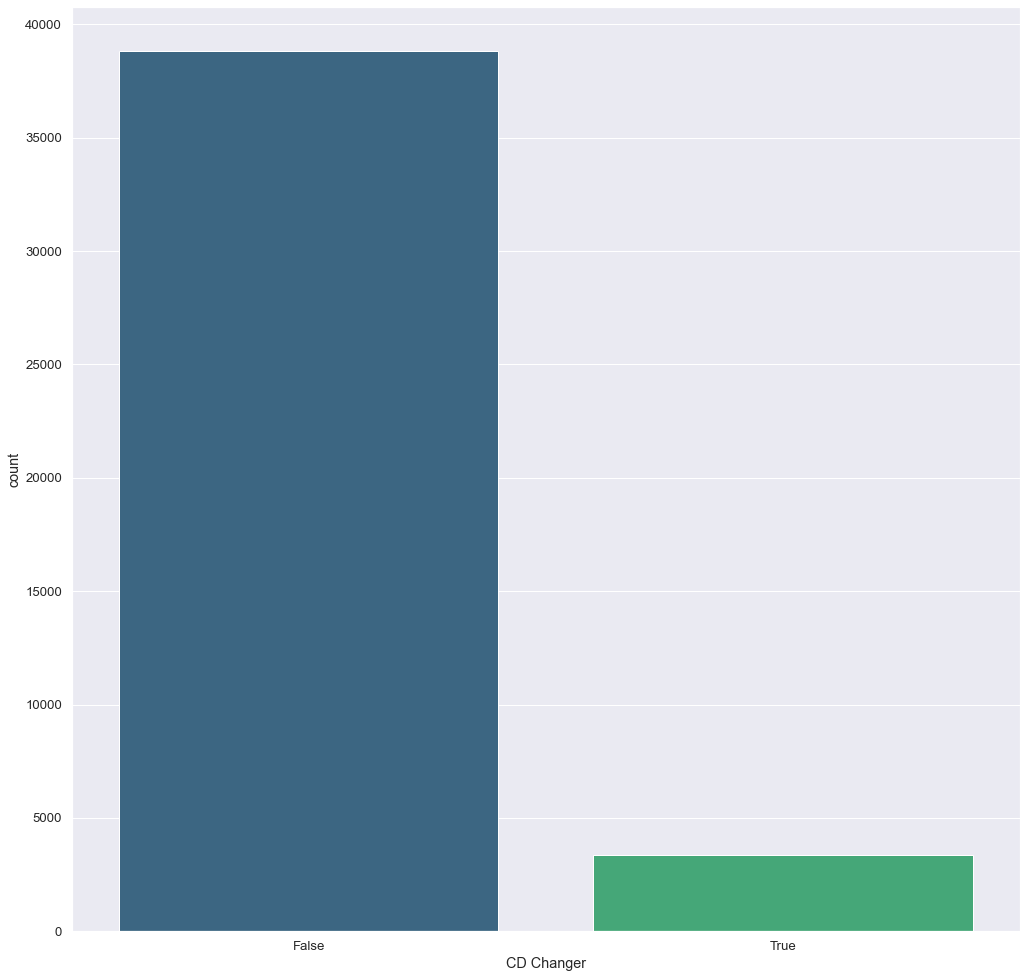

In [97]:
sns.countplot(x='CD Changer', data=df, palette='viridis')

<b> Most of the cars (>35K) does  not have  CD Changer </b>

<AxesSubplot:xlabel='USB Port', ylabel='count'>

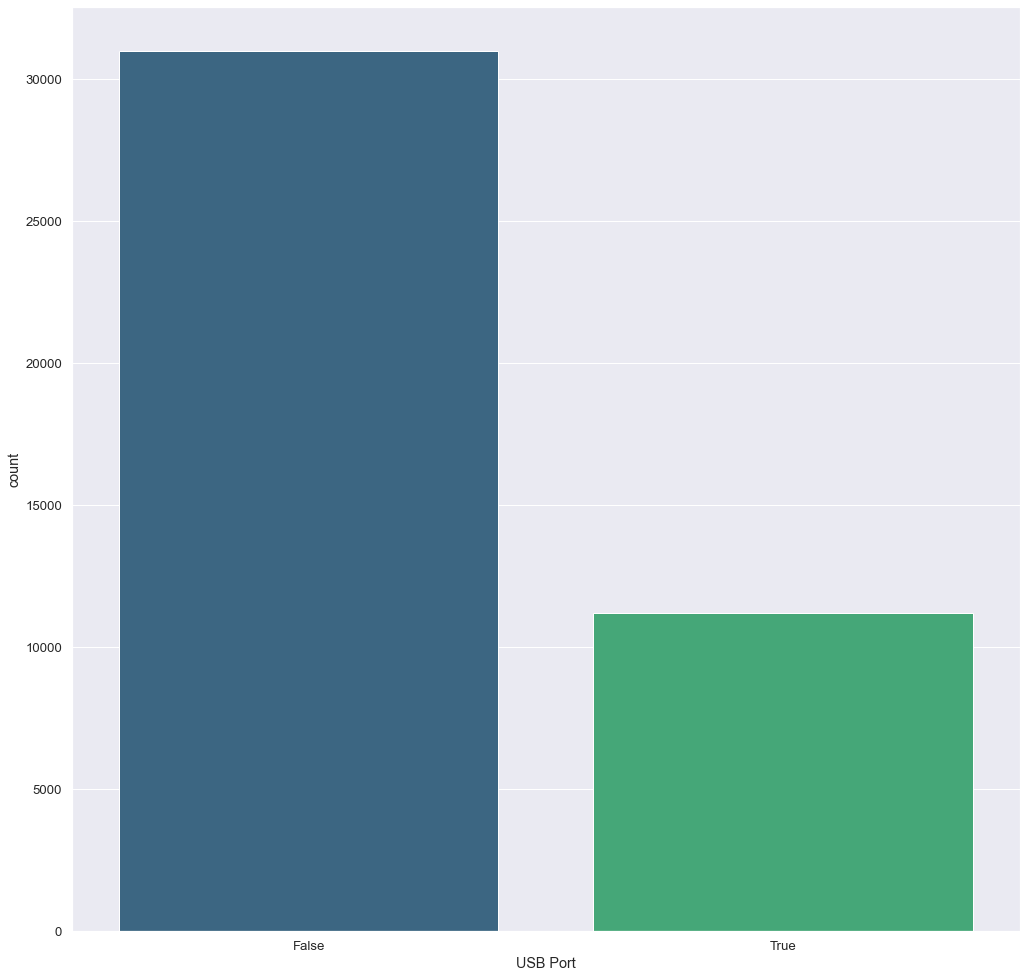

In [98]:
sns.countplot(x='USB Port', data=df, palette='viridis')

<b> Most of the cars (>30K) does  not have USB Port </b>

<AxesSubplot:xlabel='Anti - theft System', ylabel='count'>

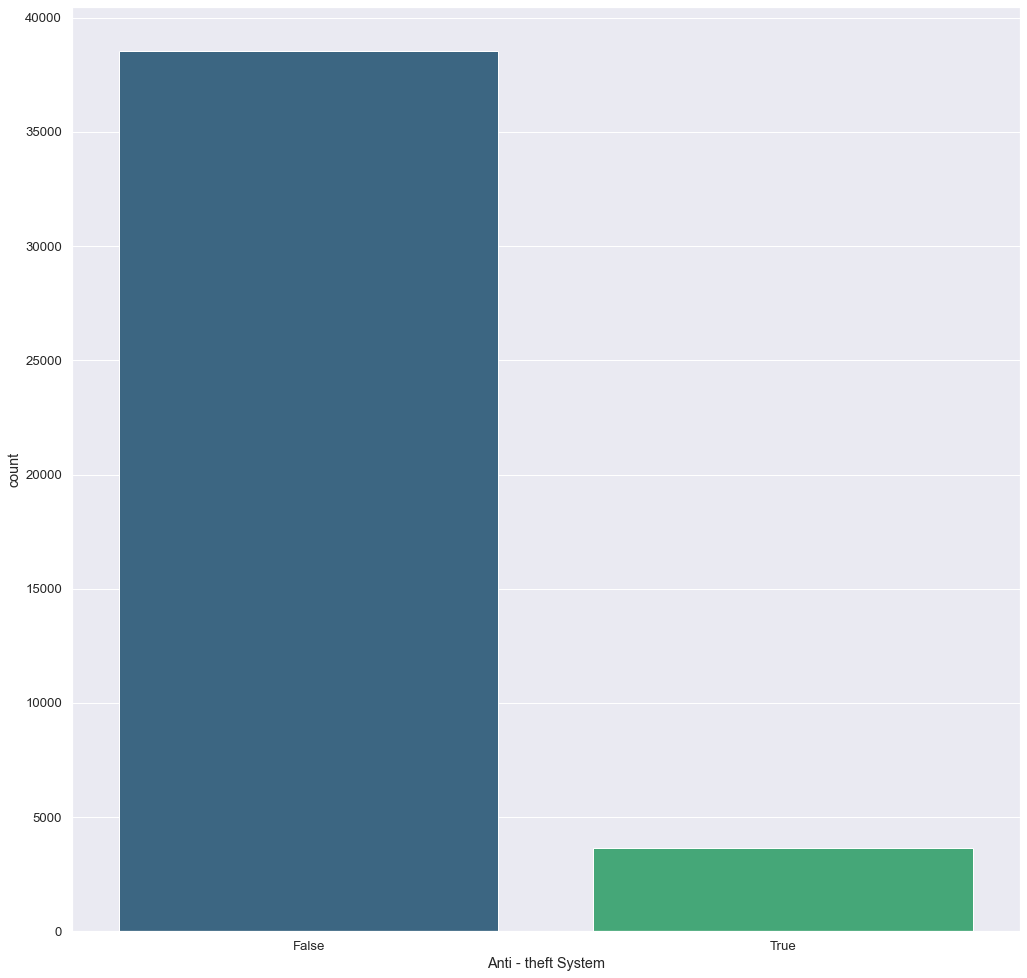

In [99]:
sns.countplot(x='Anti - theft System', data=df, palette='viridis')

<b> Most of the cars (>35K) does  not have  Anti -theft system </b>

<AxesSubplot:xlabel='Side Airbag', ylabel='count'>

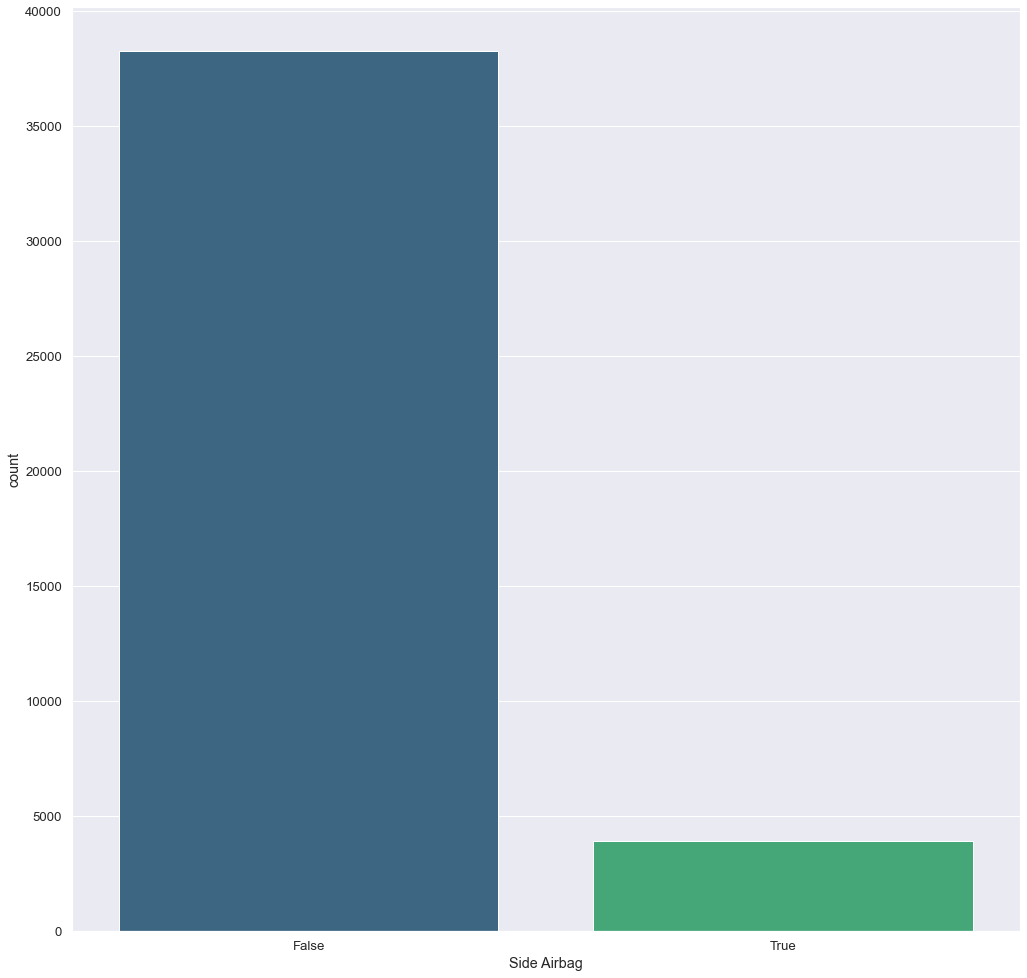

In [100]:
sns.countplot(x='Side Airbag', data=df, palette='viridis')

<b> Most of the cars (>35K) does  not have  Side Airbag </b>

<AxesSubplot:xlabel='ABS', ylabel='count'>

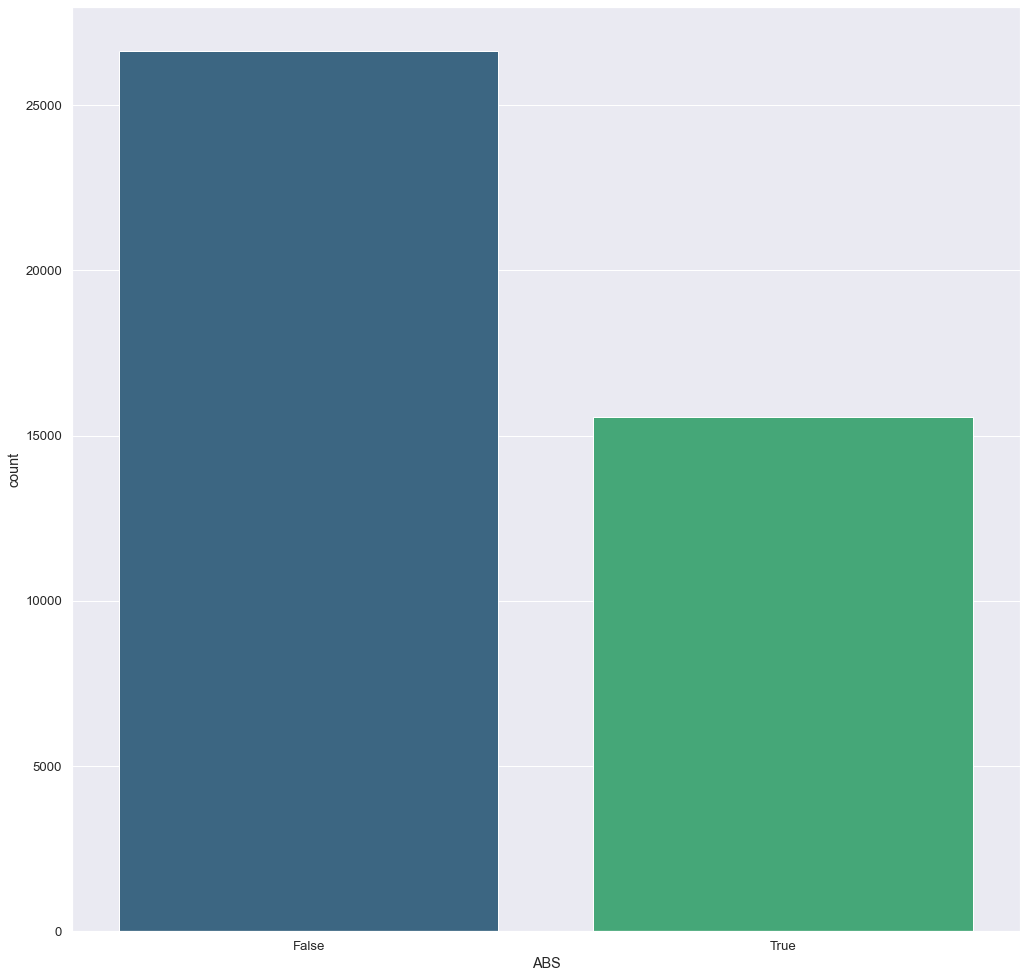

In [101]:
sns.countplot(x='ABS', data=df, palette='viridis')

<b> Most of the cars (>25K) does  not have ABS </b>

<AxesSubplot:xlabel='EPS', ylabel='count'>

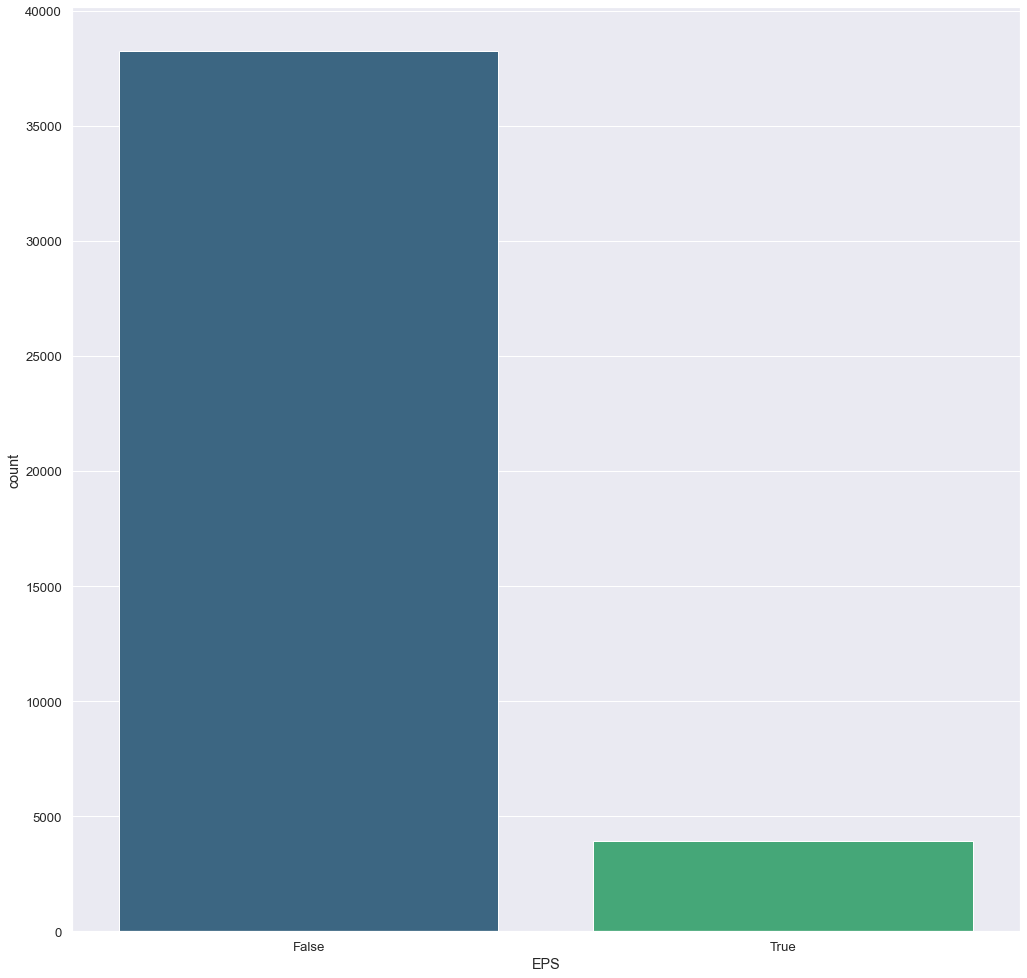

In [102]:
      sns.countplot(x='EPS', data=df, palette='viridis')            

<b> Most of the cars (>35K) does  not have  EPS </b>

<AxesSubplot:xlabel='EBD', ylabel='count'>

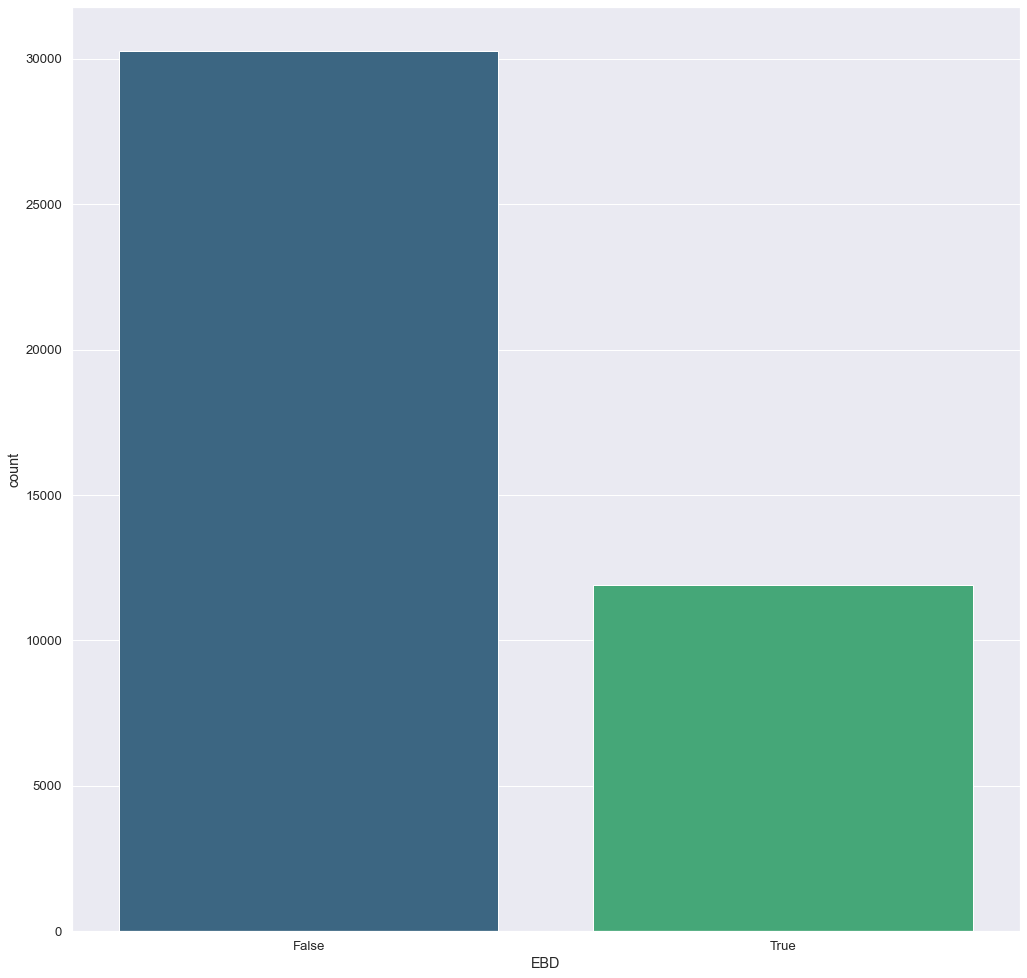

In [103]:
 sns.countplot(x='EBD', data=df, palette='viridis')                     

<b> Most of the cars (>30K) does  not have EBD</b>

<AxesSubplot:xlabel='ESP', ylabel='count'>

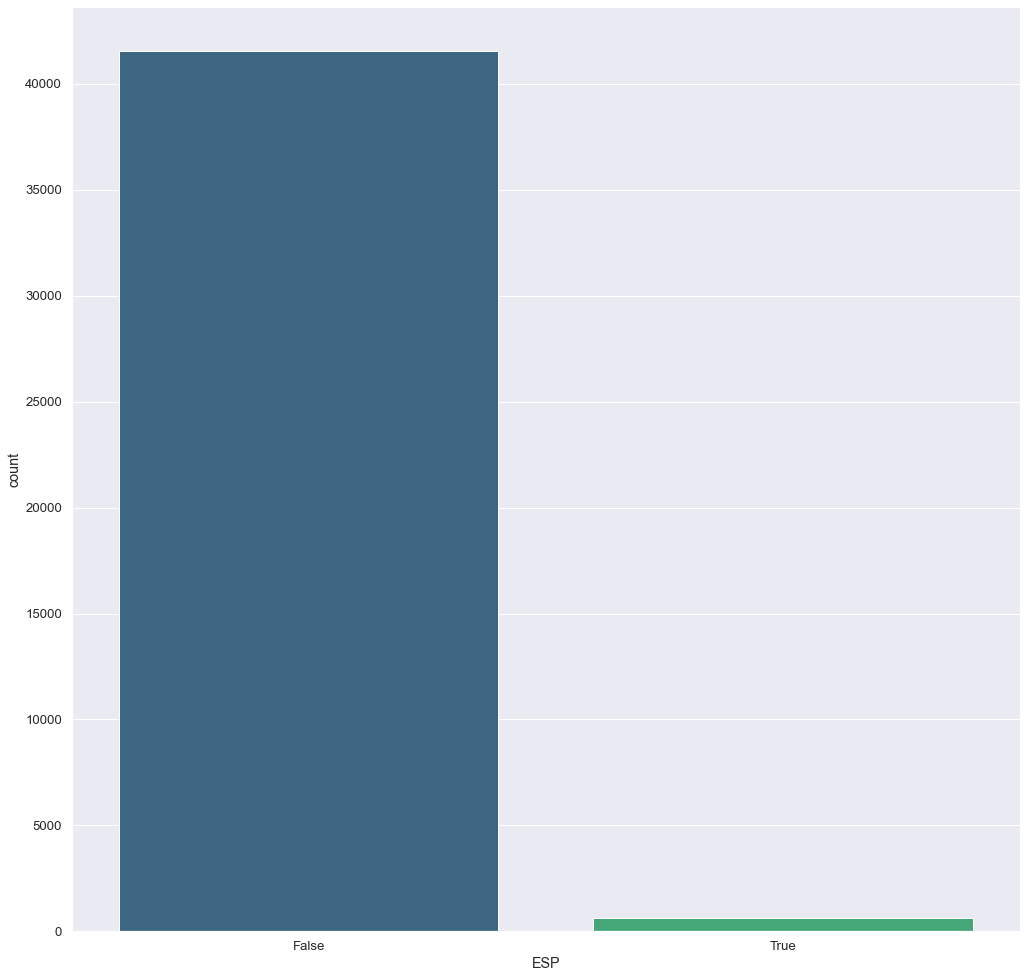

In [104]:
 sns.countplot(x='ESP', data=df, palette='viridis')                

<b> Most of the cars (>40K) does  not have ESP </b>

<AxesSubplot:xlabel='Sensors', ylabel='count'>

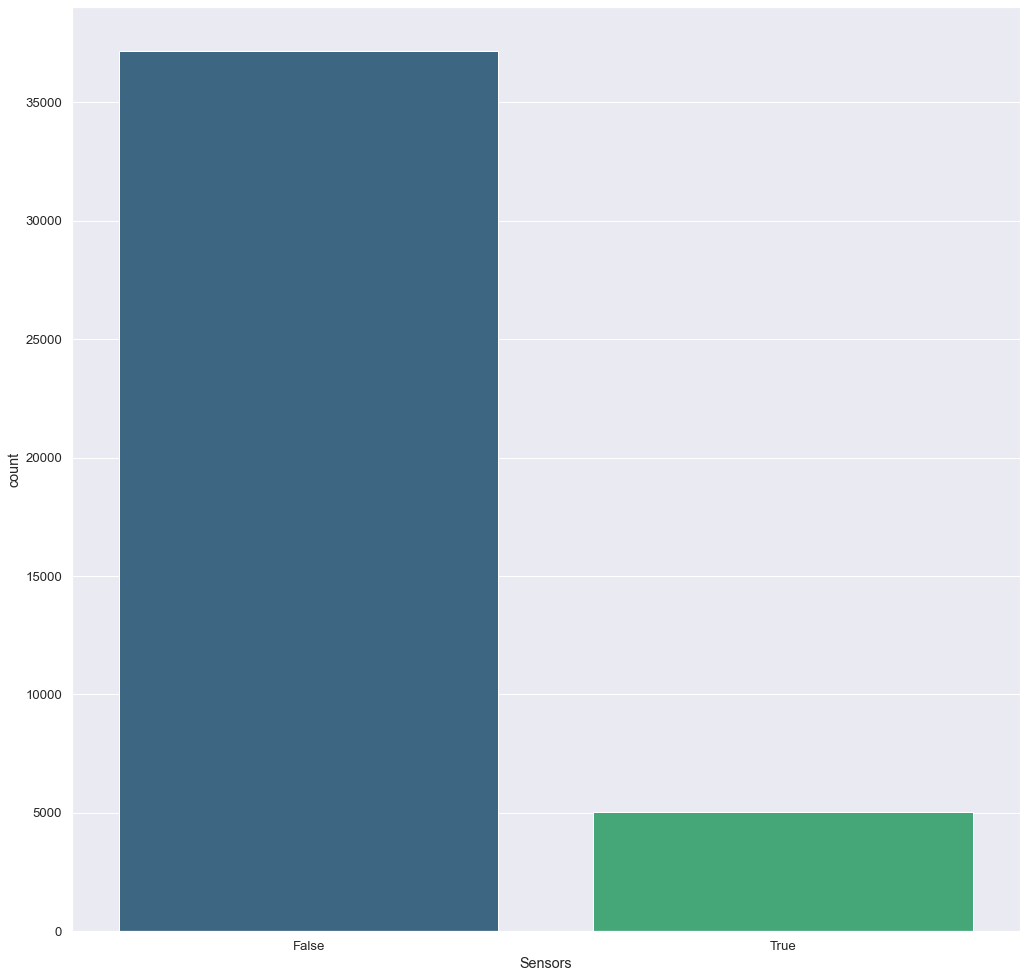

In [105]:
   sns.countplot(x='Sensors', data=df, palette='viridis')  

<b> Most of the cars (>35K) does  not have  Sensors </b>

<AxesSubplot:xlabel='Rear sensors', ylabel='count'>

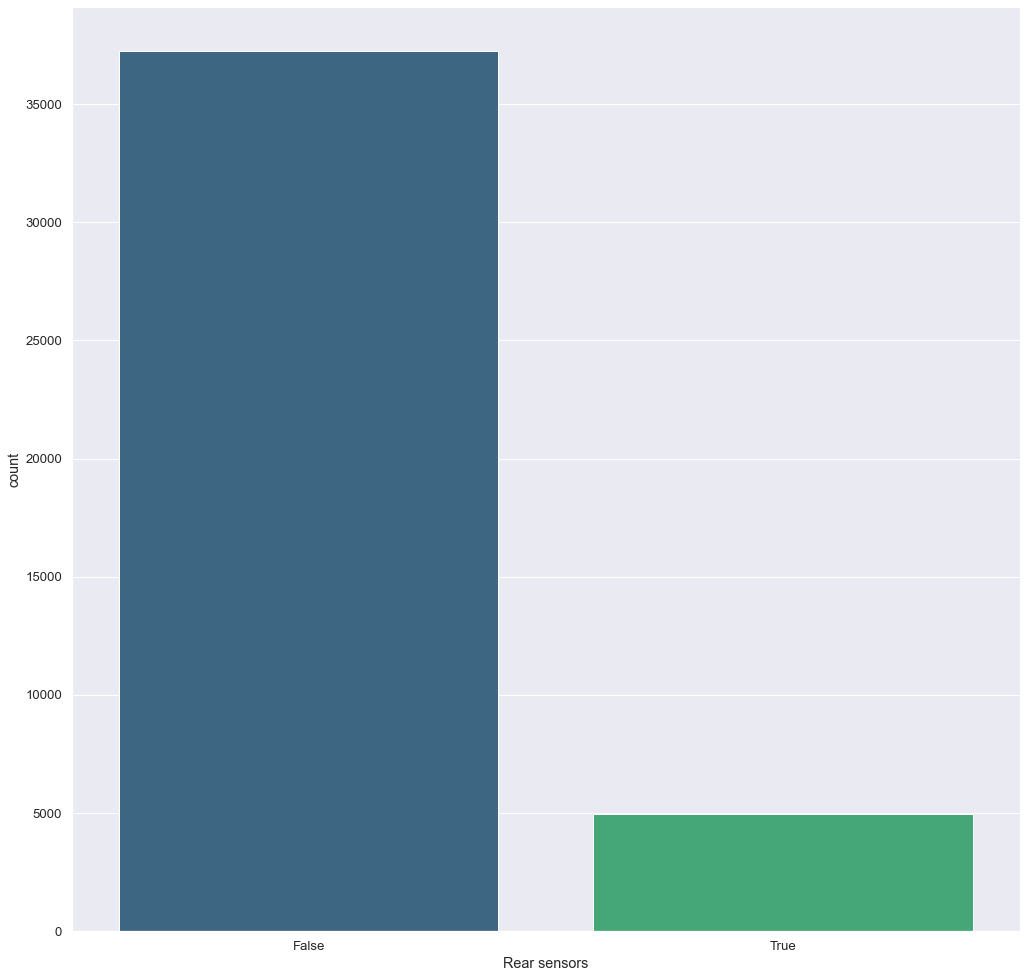

In [106]:
sns.countplot(x='Rear sensors', data=df, palette='viridis')  

<b> Most of the cars (>35K) does  not have  Sensors </b>

<AxesSubplot:xlabel='Driver Airbag', ylabel='count'>

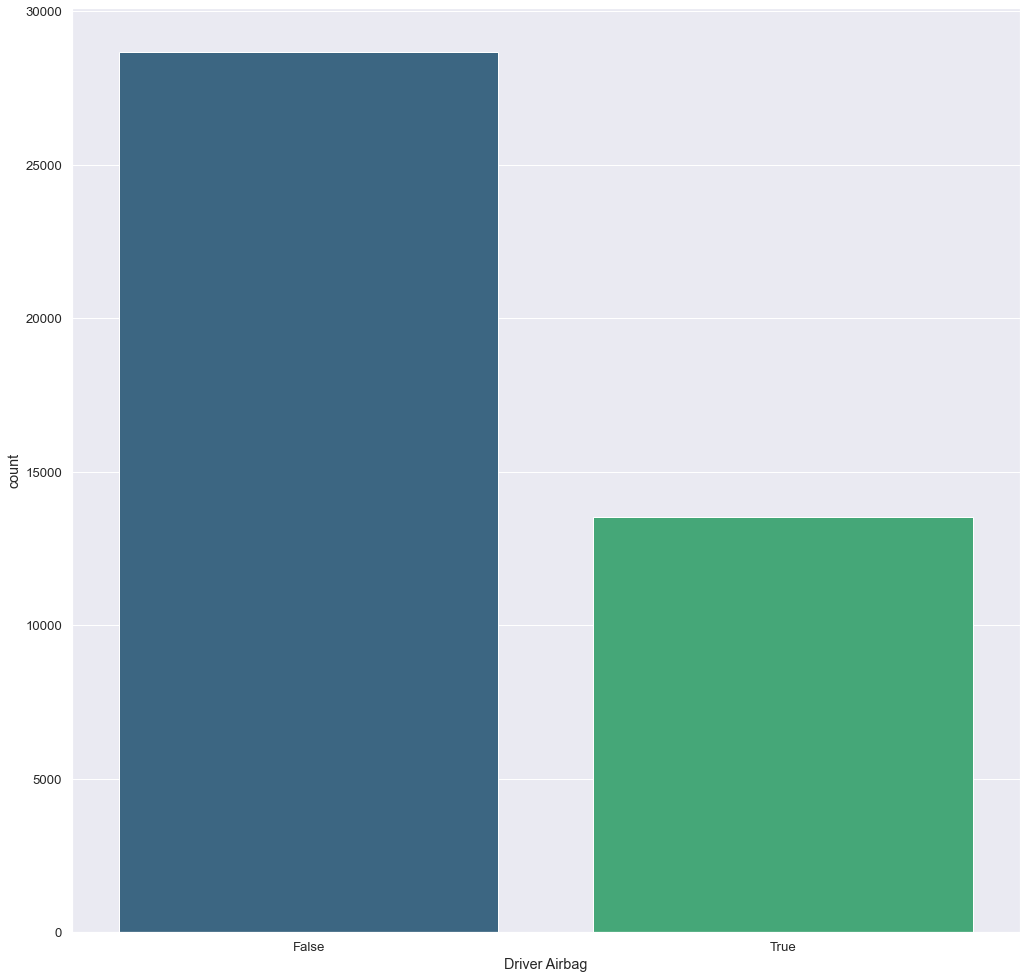

In [107]:
sns.countplot(x='Driver Airbag', data=df, palette='viridis')  

<b> Most of the cars (>25K) does  not have  Driver Airbag </b>

<AxesSubplot:xlabel='Passenger Airbag', ylabel='count'>

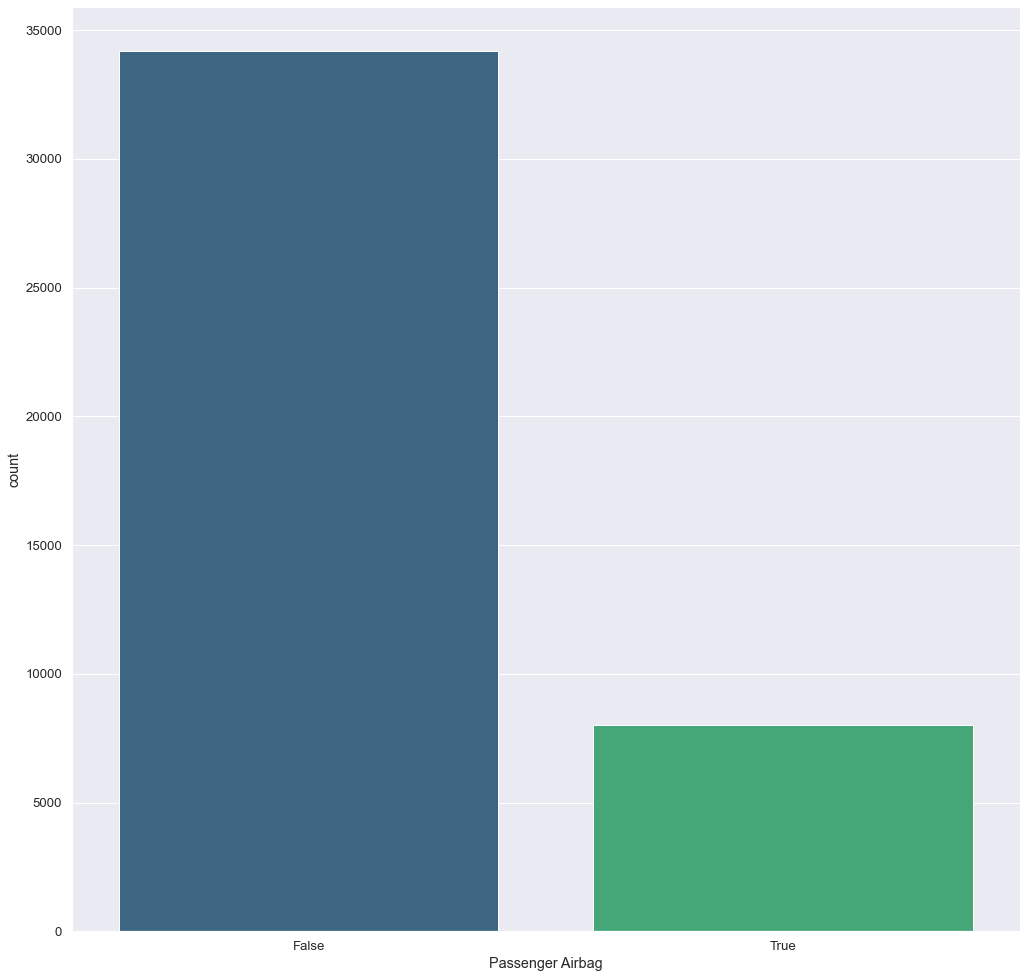

In [108]:
sns.countplot(x='Passenger Airbag', data=df, palette='viridis')  

<b> Most of the cars (>30K) does  not have  Passenger Airbag </b>

<AxesSubplot:xlabel='Front sensors', ylabel='count'>

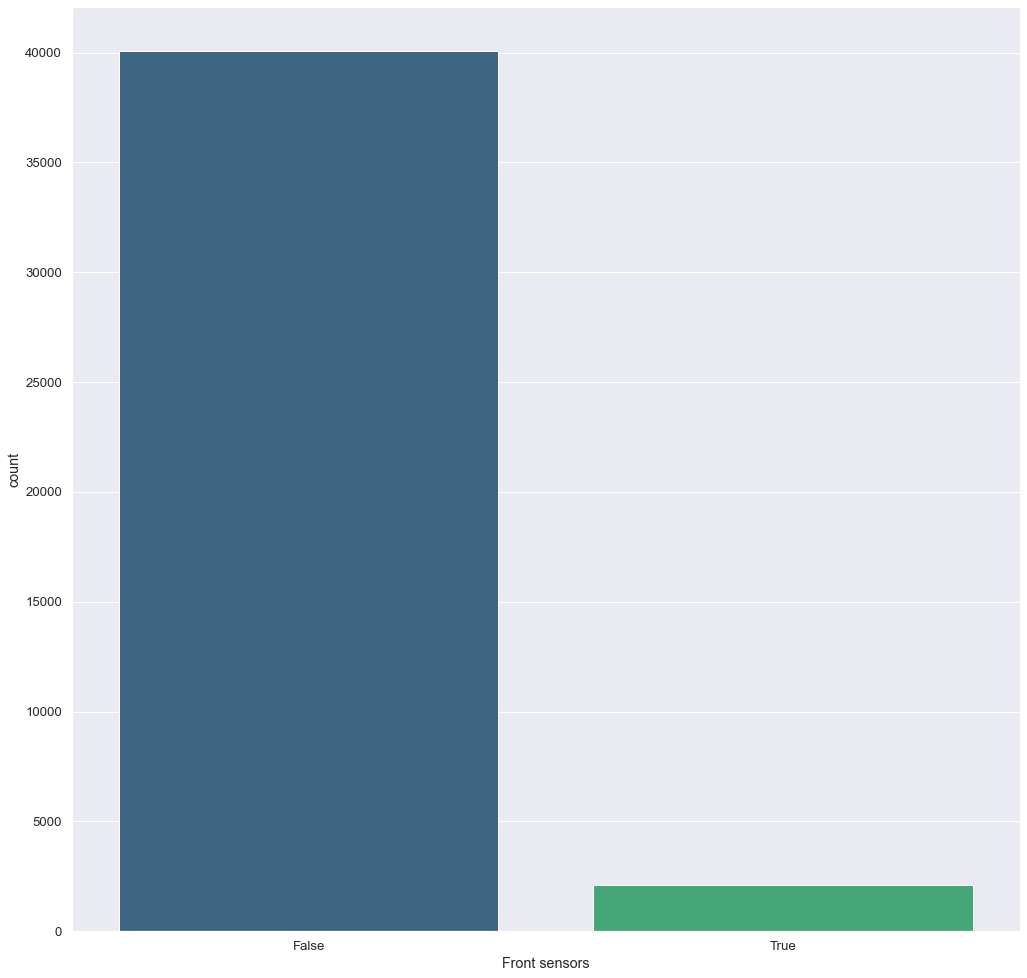

In [109]:
sns.countplot(x='Front sensors', data=df, palette='viridis')  

<b> Most of the cars (40K) does  not have  Front sensors </b>

<AxesSubplot:xlabel='Alloy wheels', ylabel='count'>

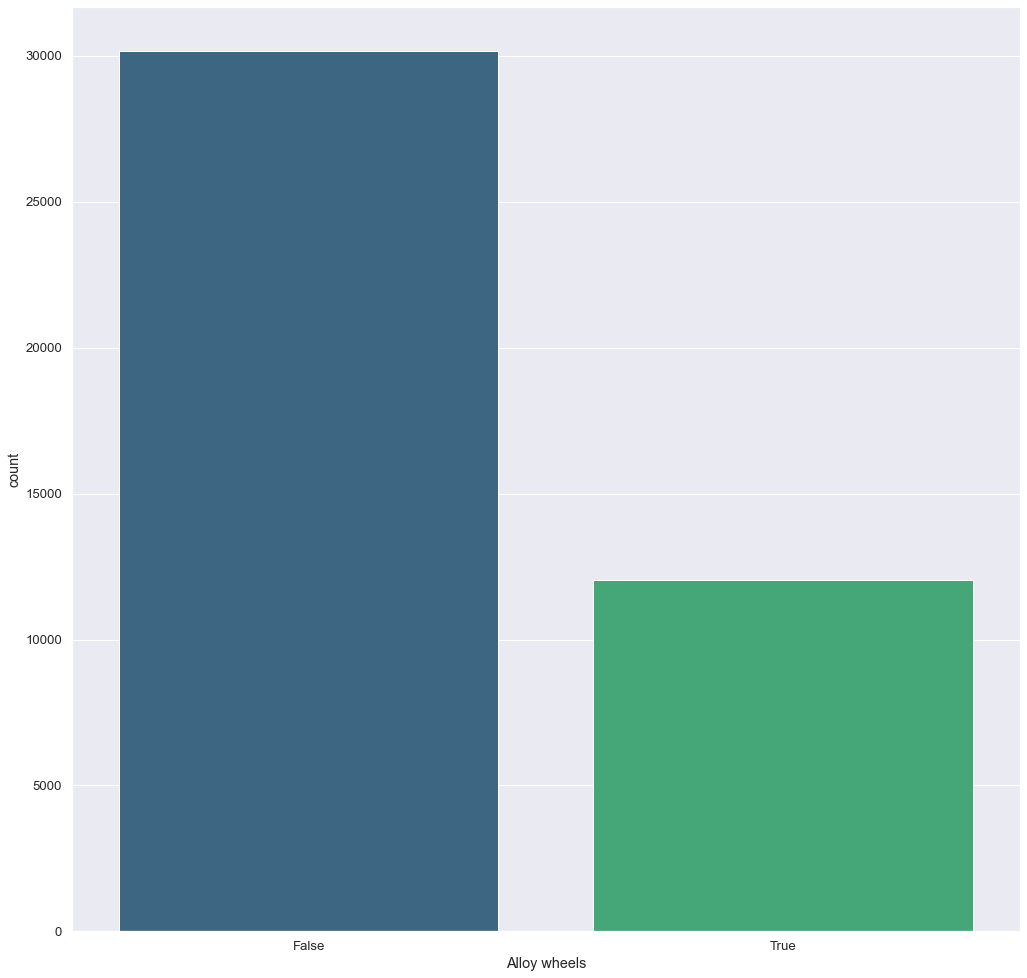

In [110]:
sns.countplot(x='Alloy wheels', data=df, palette='viridis')  

<b> Most of the cars (>30K) does  not have  Alloy wheels </b>

<AxesSubplot:xlabel='Rear camera', ylabel='count'>

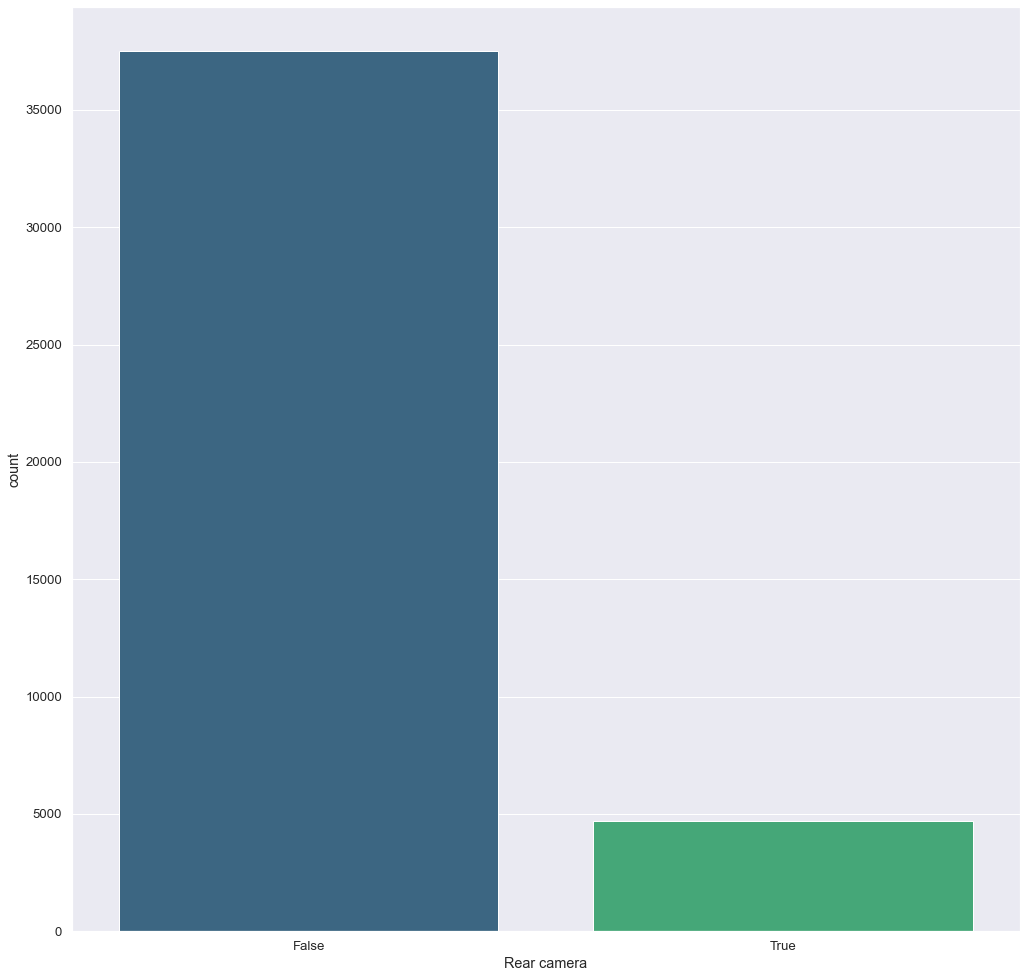

In [111]:
sns.countplot(x='Rear camera', data=df, palette='viridis')  

<b> Most of the cars (>35K) does  not have Rear camera </b>

<AxesSubplot:xlabel='GPS', ylabel='count'>

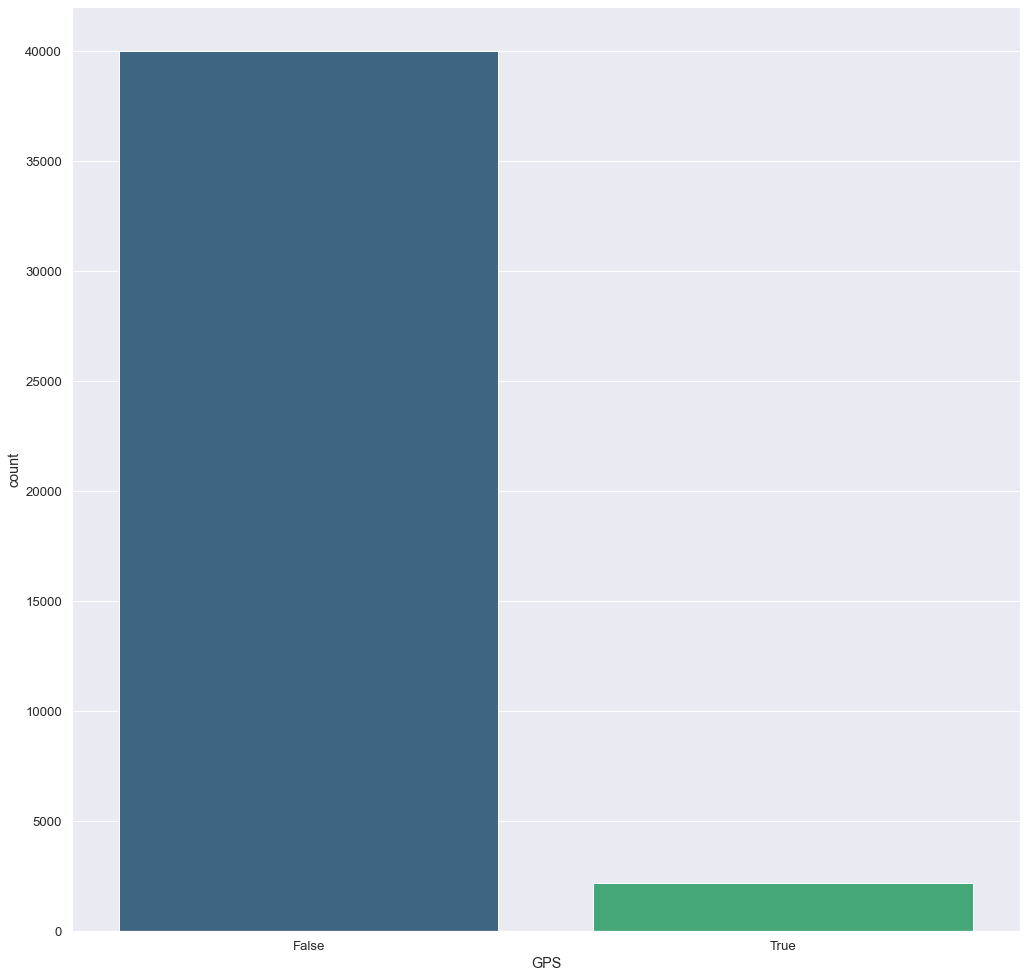

In [112]:
sns.countplot(x='GPS', data=df, palette='viridis')  

<b> Most of the cars (40K) does  not have  GPS </b>

<AxesSubplot:xlabel='Fog light', ylabel='count'>

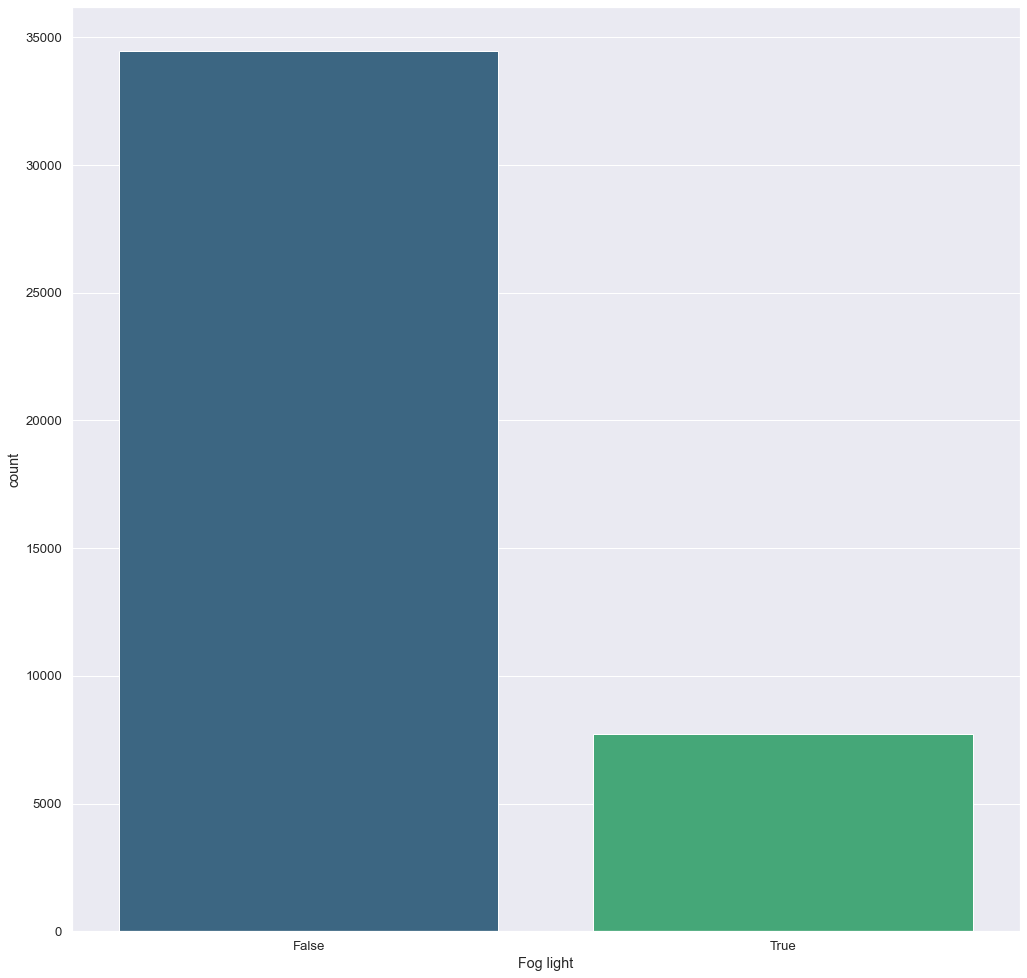

In [113]:
sns.countplot(x='Fog light', data=df, palette='viridis')  

<b> Most of the cars (>30K) does  not have Fog light </b>

<AxesSubplot:xlabel='Rear spoiler', ylabel='count'>

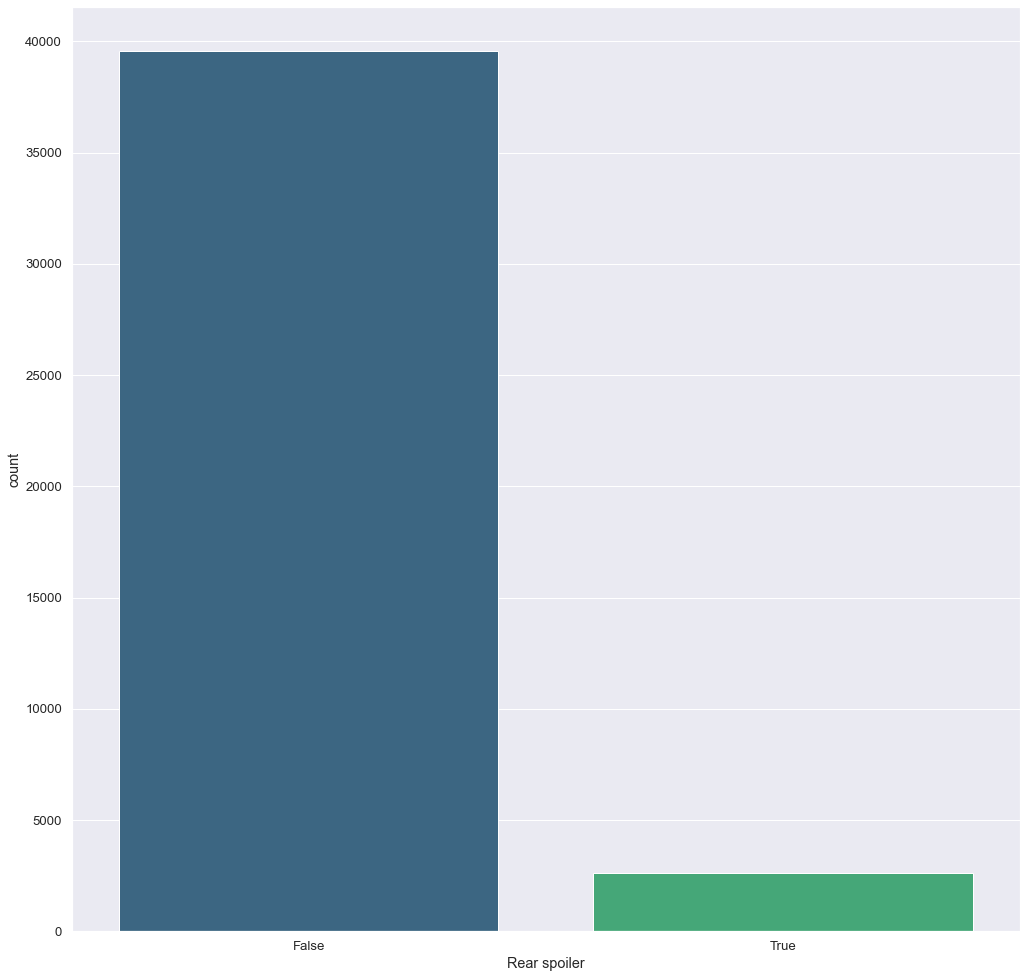

In [114]:
sns.countplot(x='Rear spoiler', data=df, palette='viridis')  

<b> Most of the cars (>35K) does  not have  Rear spoiler </b>

<AxesSubplot:xlabel='Cruise control', ylabel='count'>

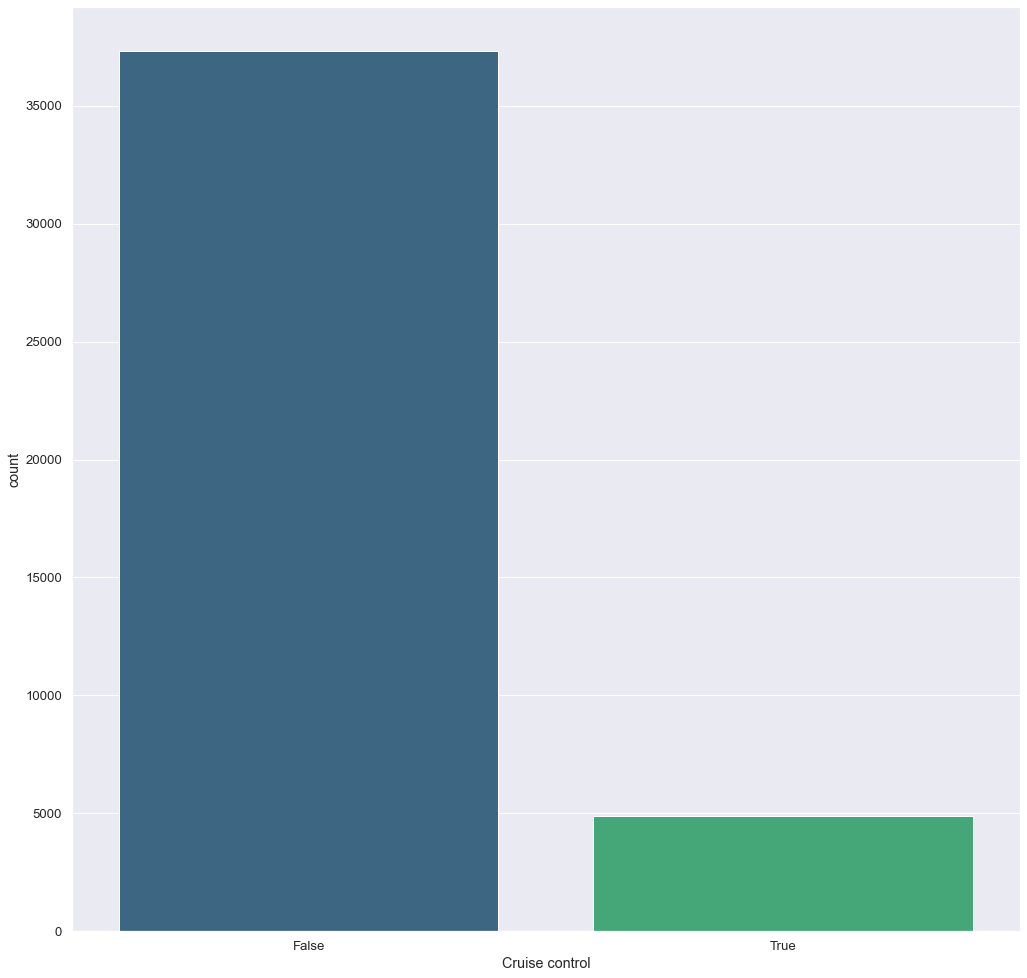

In [115]:
sns.countplot(x='Cruise control', data=df, palette='viridis')  

<b> Most of the cars (>35K) does  not have  Cruise control </b>

<AxesSubplot:xlabel='Power Seats', ylabel='count'>

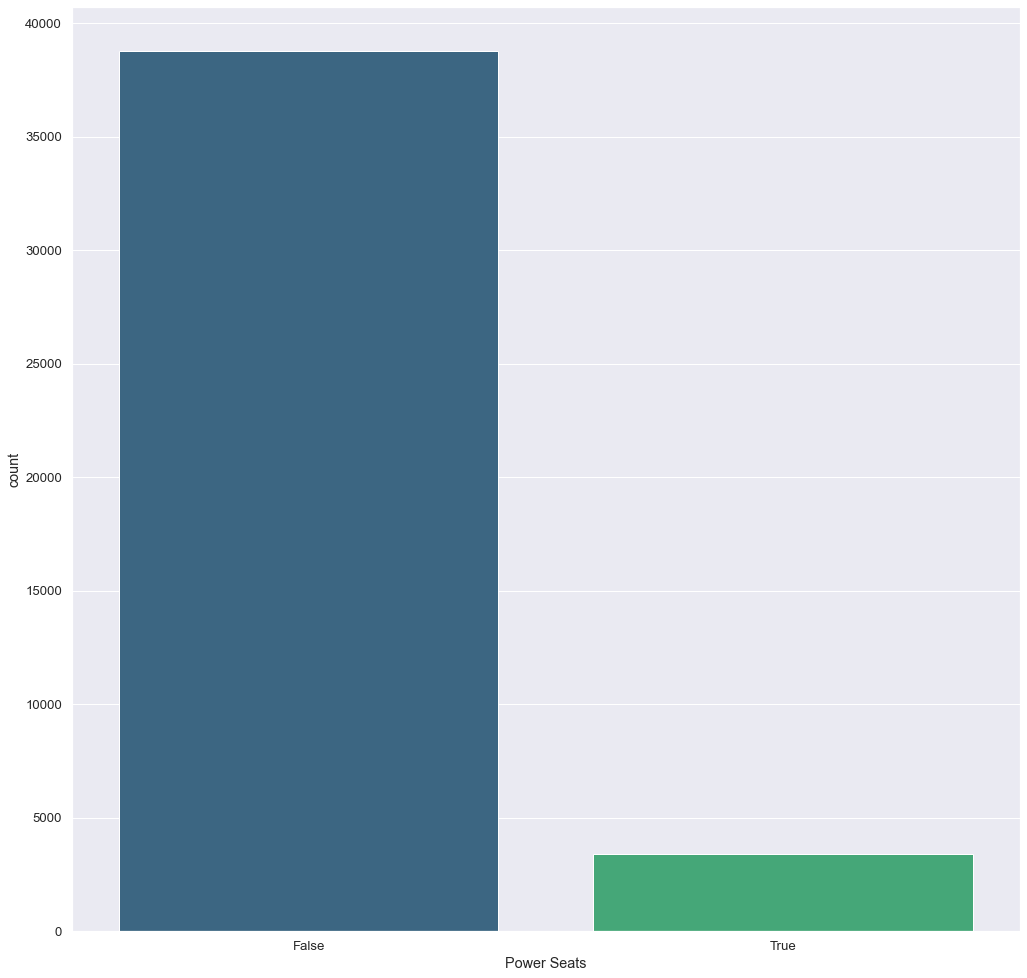

In [116]:
sns.countplot(x='Power Seats', data=df, palette='viridis')  

<b> Most of the cars (>35K) does  not have Power Seats </b>

<AxesSubplot:xlabel='Central lock', ylabel='count'>

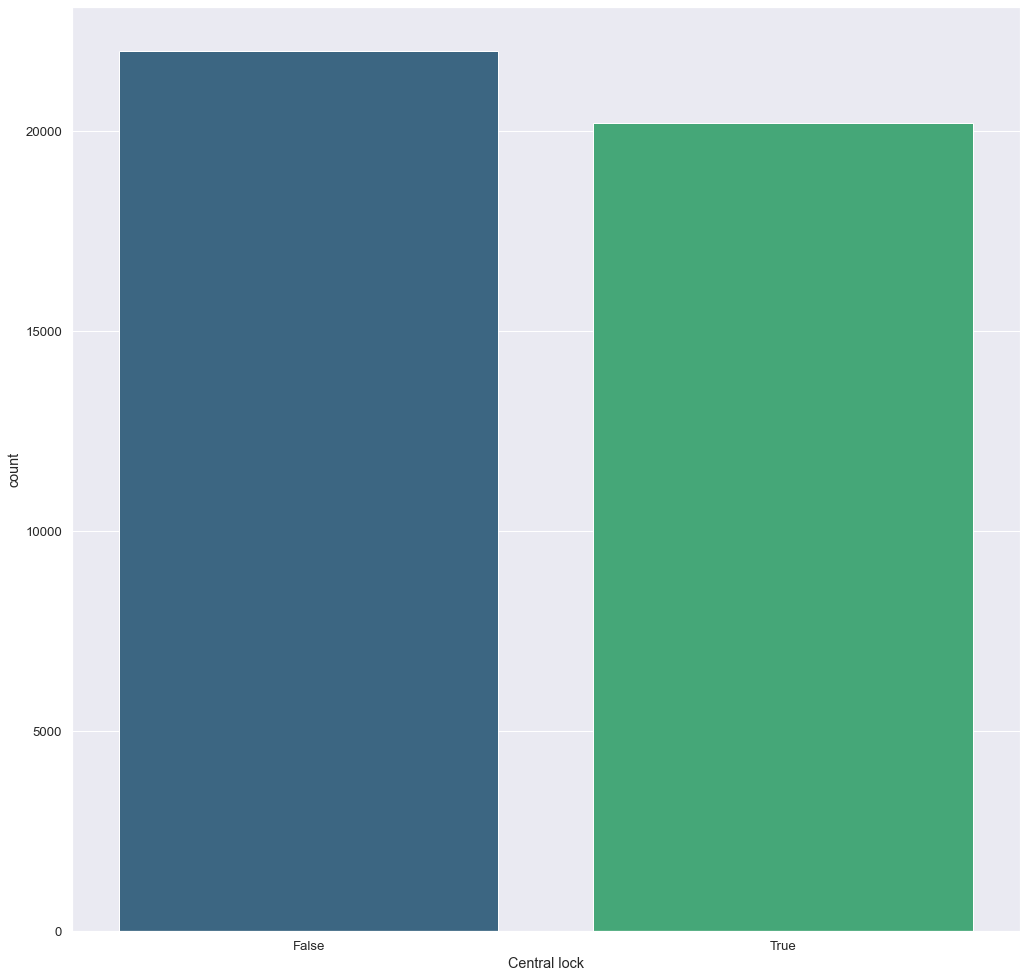

In [117]:
sns.countplot(x='Central lock', data=df, palette='viridis')  

<b> Most of the cars (>20K) does  not have  Central lock </b>

<AxesSubplot:xlabel='Alarm', ylabel='count'>

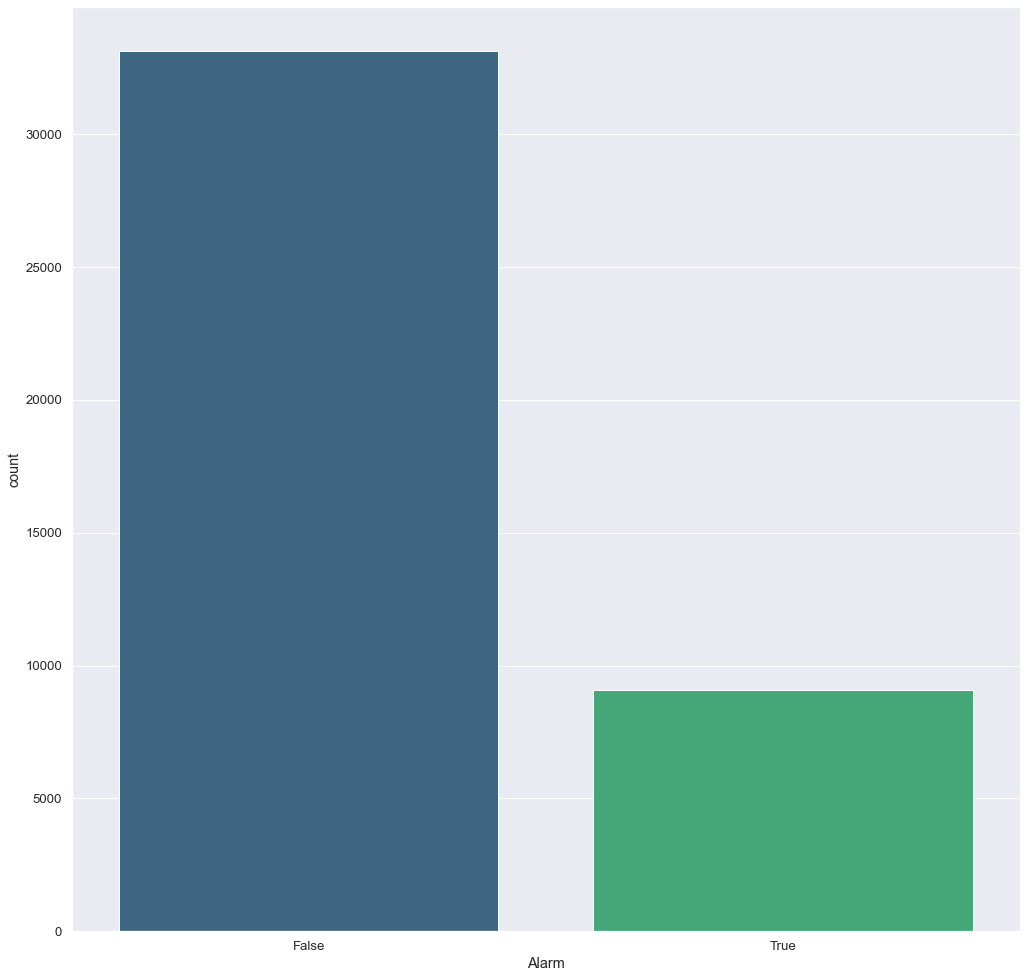

In [118]:
sns.countplot(x='Alarm', data=df, palette='viridis')  

<b> Most of the cars (>30K) does  not have  Alarm </b>

In [119]:
df.columns

Index(['Make', 'Model', 'Used since', 'Km', 'Transmission', 'City', 'Color',
       'Fuel', 'Leather seats', 'Closing mirrors',
       'Intelligent parking system', 'Sunroof', 'Fabric brushes',
       'Air Conditioning', 'Power Steering', 'Remote Keyless',
       'Electric mirrors', 'Front Power Windows', 'Back Power Windows',
       'Tinted Glass', 'CD Player', 'DVD Player', 'Bluetooth', 'Multifunction',
       'Cassette Radio', 'AUX', 'CD Changer', 'USB Port',
       'Anti - theft System', 'Side Airbag', 'ABS', 'EPS', 'EBD', 'ESP',
       'Sensors', 'Rear sensors', 'Driver Airbag', 'Passenger Airbag',
       'Front sensors', 'Alloy wheels', 'Rear camera', 'GPS', 'Fog light',
       'Rear spoiler', 'Cruise control', 'Power Seats', 'Central lock',
       'Alarm', 'Price'],
      dtype='object')

<AxesSubplot:xlabel='Fuel', ylabel='count'>

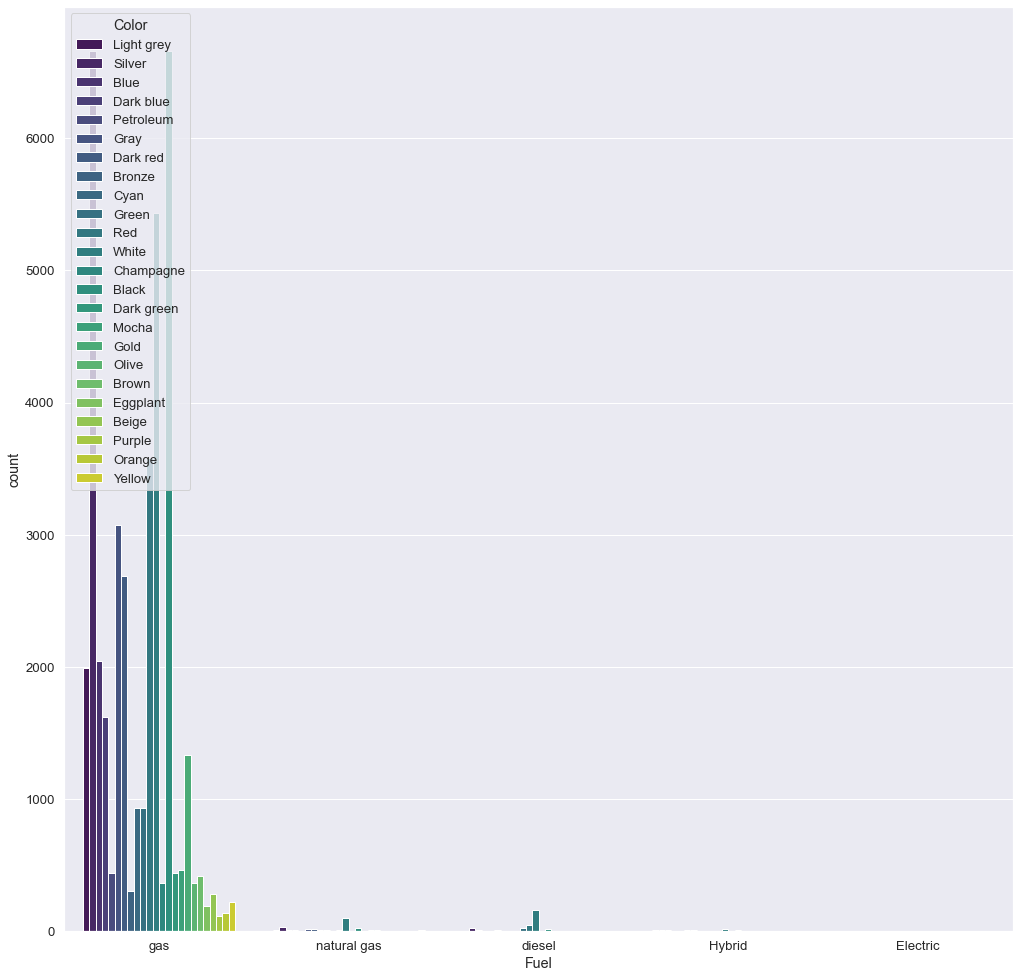

In [120]:
sns.countplot(x='Fuel', data=df, hue='Color', palette='viridis')

<AxesSubplot:xlabel='Leather seats', ylabel='count'>

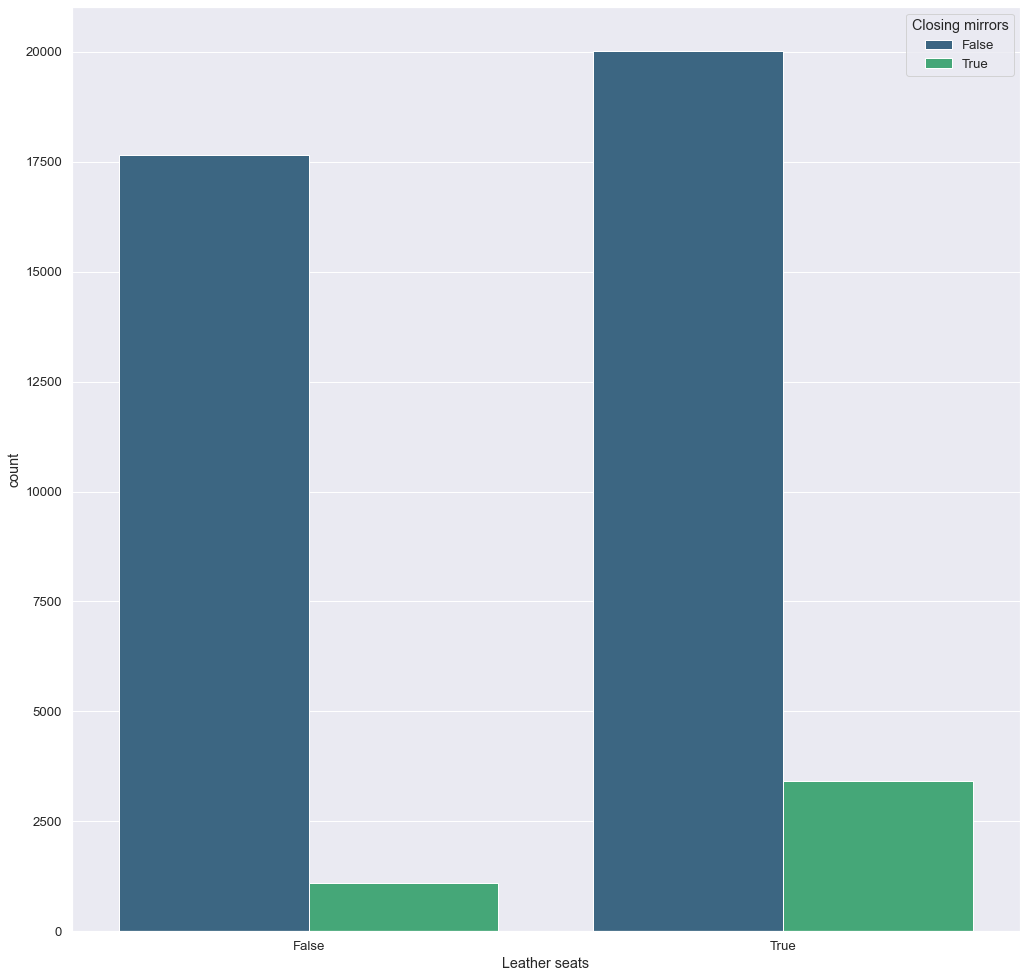

In [121]:
sns.countplot(x='Leather seats', data=df, hue='Closing mirrors', palette='viridis')

<AxesSubplot:xlabel='Transmission', ylabel='count'>

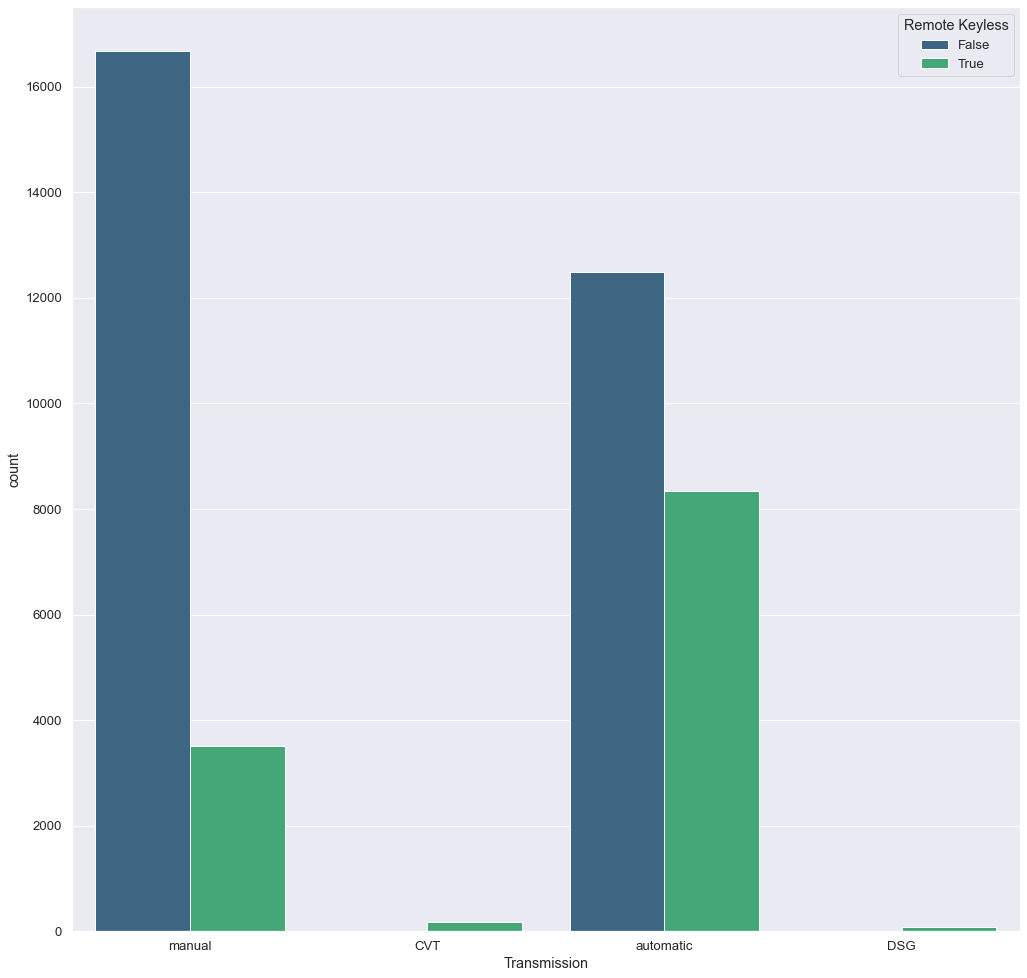

In [122]:
sns.countplot(x='Transmission', data=df, hue='Remote Keyless', palette='viridis')

<AxesSubplot:xlabel='Fuel', ylabel='count'>

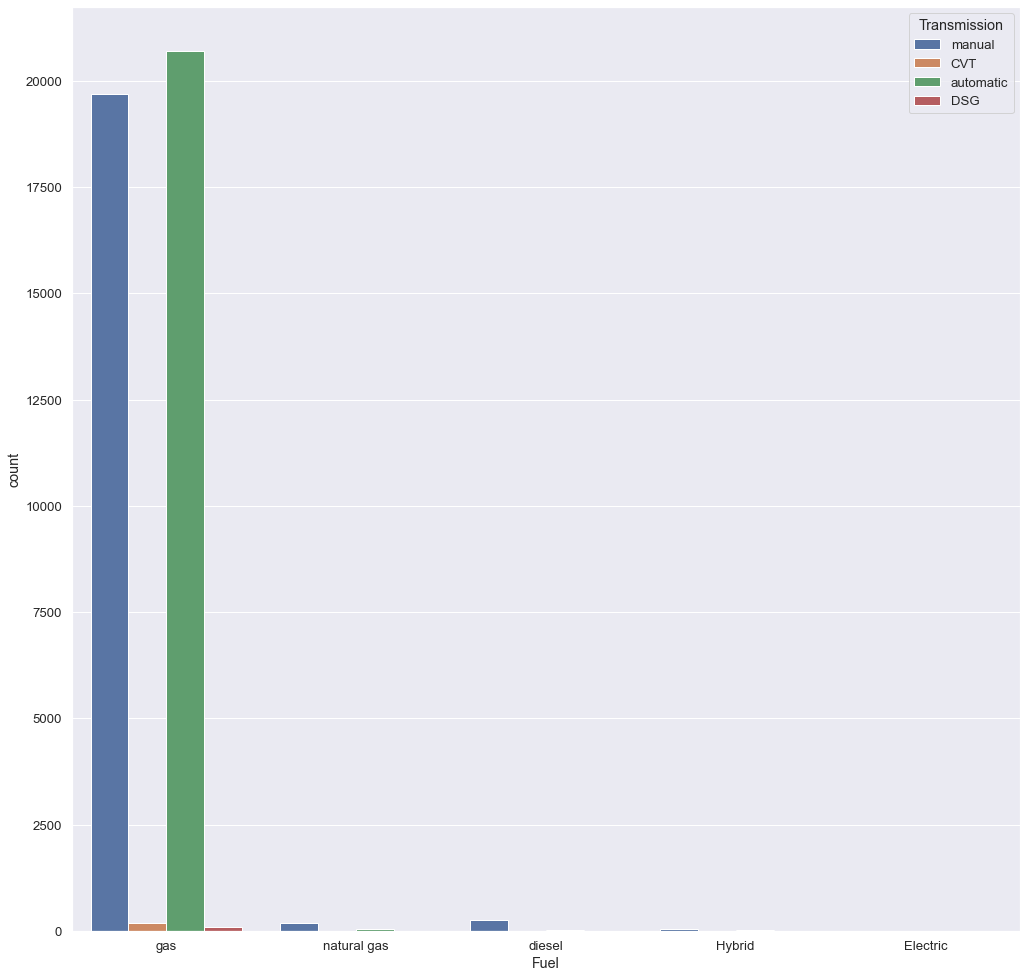

In [123]:
sns.countplot(x='Fuel', data=df, hue='Transmission')

<b> Most of the cars (>20K) does   have automatic  and  Most of the cars gas </b>

<AxesSubplot:xlabel='Transmission', ylabel='count'>

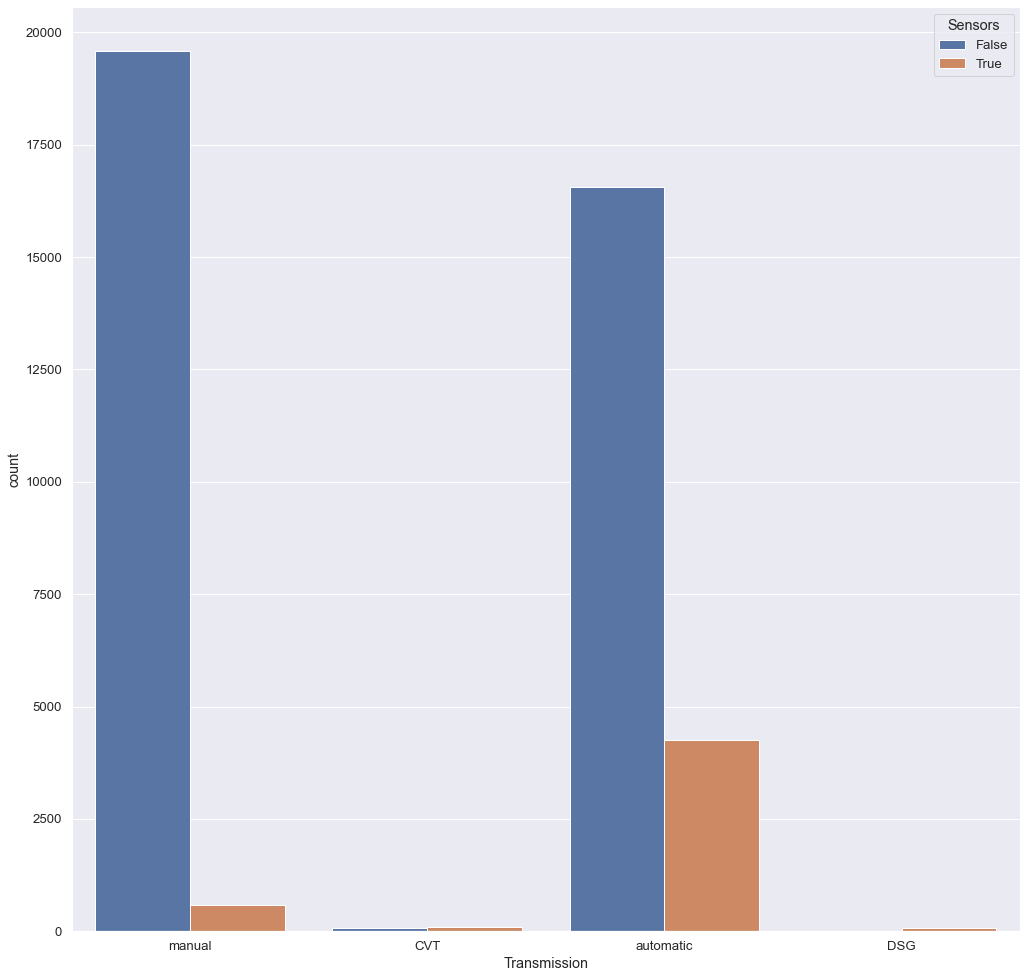

In [124]:
sns.countplot(x='Transmission', data=df, hue='Sensors')

<b> Most of the cars (>17K) does  not have Sensors  and  Most of the cars  (>2500K) does automaticr </b>

In [125]:
df['Used since'].value_counts()

2015    2306
2010    2002
2008    1979
2016    1837
2013    1821
        ... 
1962       1
1942       1
1964       1
1968       1
1960       1
Name: Used since, Length: 66, dtype: int64

In [126]:
#cars_in_important_years = df[df['Used since'].isin([2015, 2010, 2008, 2016, 2013])]
#cars_in_important_years

In [127]:
#sns.violinplot(y='Used since', x='Price', data=cars_in_important_years, hue='Fuel')

<AxesSubplot:xlabel='Fuel', ylabel='Price'>

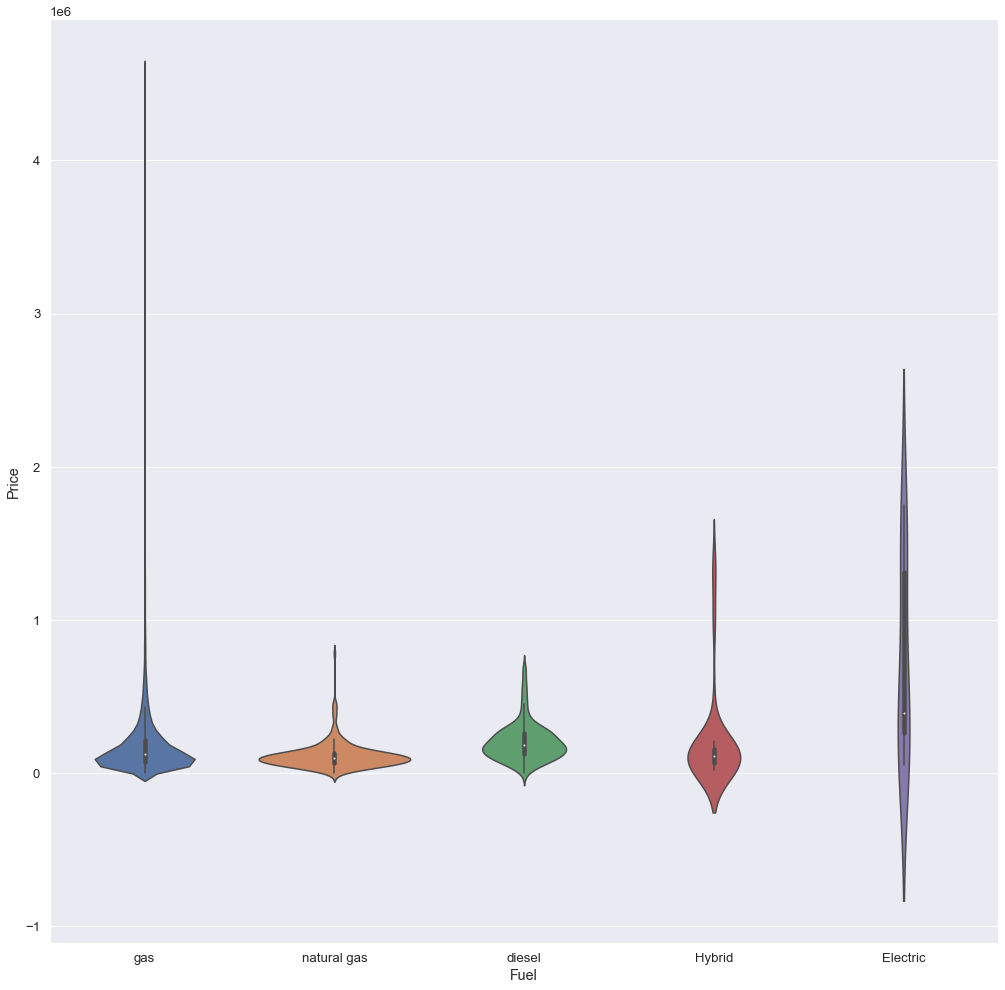

In [128]:
sns.violinplot(x='Fuel', y='Price', data=df)

<AxesSubplot:xlabel='Transmission', ylabel='Km'>

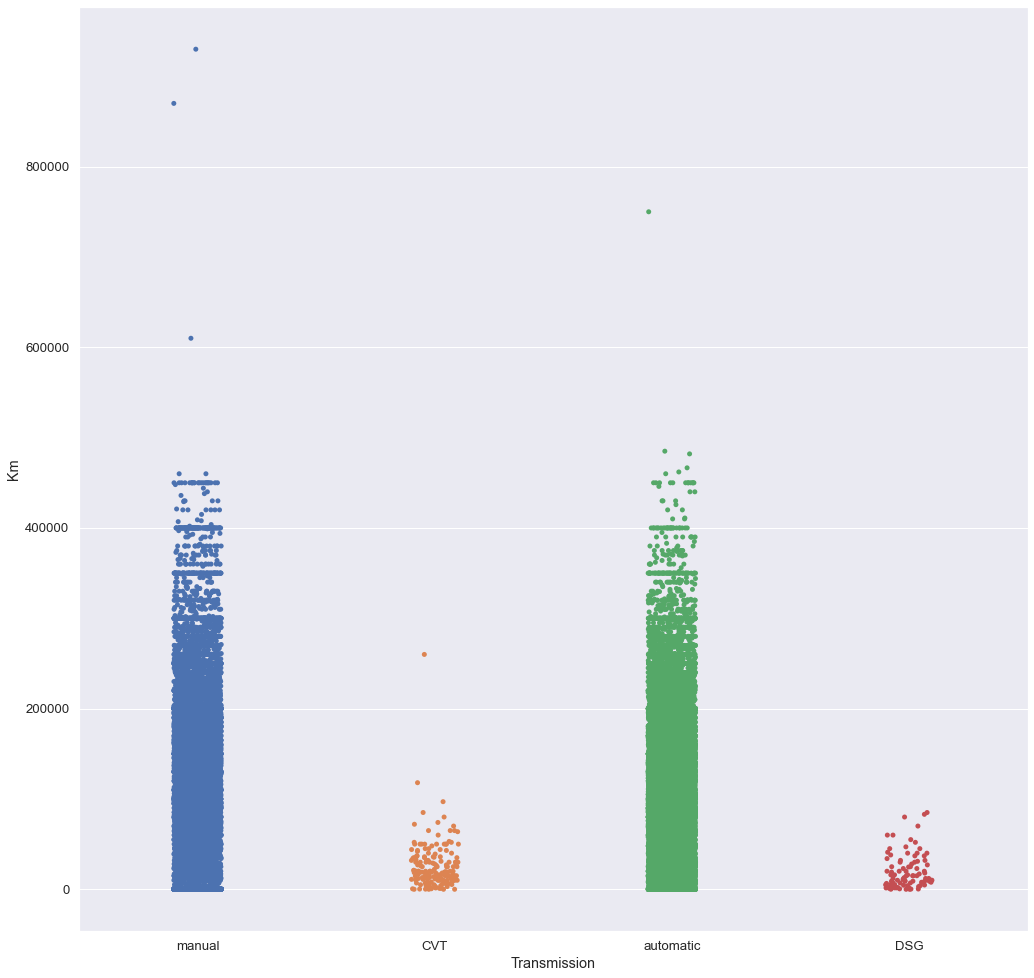

In [129]:
sns.stripplot(x='Transmission', y='Km', data=df, dodge=True)

In [130]:
#sns.swarmplot(x='Fuel', y='Km', data=df, dodge=True)

In [131]:
#sns.barplot(x='Mpdel', y='Price', data=df, estimator=np.sum, hue='Fuel')

In [132]:
df_corr = df.corr()
df_corr

Km  Leather seats  Closing mirrors  \
Km                          1.000000      -0.077291        -0.064145   
Leather seats              -0.077291       1.000000         0.141391   
Closing mirrors            -0.064145       0.141391         1.000000   
Intelligent parking system -0.105305       0.123118         0.475226   
Sunroof                    -0.044717       0.205546         0.429179   
Fabric brushes             -0.026425      -0.272631         0.176020   
Air Conditioning            0.166599       0.288061         0.235209   
Power Steering              0.094491       0.308785         0.242467   
Remote Keyless              0.015519       0.046211         0.425424   
Electric mirrors           -0.007861       0.162342         0.507497   
Front Power Windows         0.106799       0.273428         0.243003   
Back Power Windows          0.105049       0.242961         0.275957   
Tinted Glass               -0.068230       0.082735         0.409174   
CD Player                   0.036333       0.081299         0.308657   
DVD Player                 -0.000667       0.100597         0.422663   
Bluetooth                  -0.047364       0.159719         0.499363   
Multifunction              -0.115325       0.102408         0.421339   
Cassette Radio             -0.020206       0.453088         0.069245   
AUX                        -0.003709       0.109114         0.412726   
CD Changer                  0.047317       0.078054         0.307506   
USB Port                   -0.010724       0.189553         0.433734   
Anti - theft System        -0.124154       0.078390         0.409390   
Side Airbag                -0.026423       0.089583         0.452876   
ABS                         0.000029       0.150783         0.362554   
EPS                        -0.087391       0.109586         0.571884   
EBD                        -0.053623       0.198796         0.374170   
ESP                        -0.106498       0.023898         0.247621   
Sensors                    -0.039287       0.172161         0.515339   
Rear sensors               -0.073594       0.175256         0.502075   
Driver Airbag               0.001823       0.142368         0.395220   
Passenger Airbag           -0.045463       0.070306         0.497515   
Front sensors              -0.064541       0.146950         0.513725   
Alloy wheels               -0.008545       0.106828         0.415747   
Rear camera                -0.075368       0.196038         0.460716   
GPS                        -0.057046       0.137025         0.450221   
Fog light                  -0.010013       0.127421         0.483183   
Rear spoiler               -0.038331       0.109085         0.361761   
Cruise control             -0.077370       0.154184         0.582804   
Power Seats                -0.017012       0.154960         0.434215   
Central lock                0.079055       0.294666         0.247845   
Alarm                      -0.034072       0.108129         0.423326   
Price                      -0.099100       0.048279         0.344010   

                            Intelligent parking system   Sunroof  \
Km                                           -0.105305 -0.044717   
Leather seats                                 0.123118  0.205546   
Closing mirrors                               0.475226  0.429179   
Intelligent parking system                    1.000000  0.355186   
Sunroof                                       0.355186  1.000000   
Fabric brushes                                0.131675  0.048810   
Air Conditioning                              0.173333  0.226928   
Power Steering                                0.198132  0.236234   
Remote Keyless                                0.334670  0.297154   
Electric mirrors                              0.387116  0.387337   
Front Power Windows                           0.179083  0.239496   
Back Power Windows                            0.212789  0.270235   
Tinted Glass                                  0.43459

<AxesSubplot:>

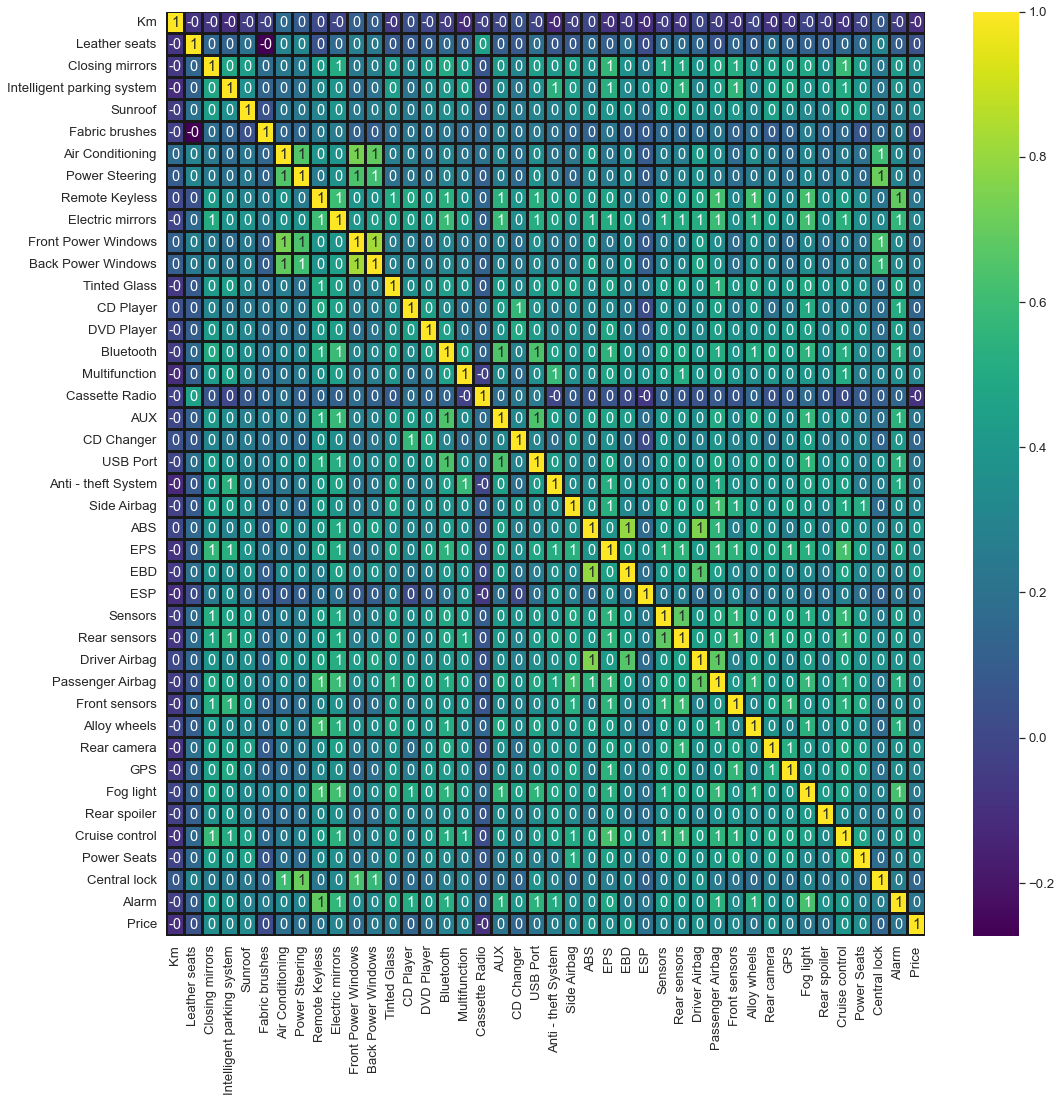

In [133]:
sns.heatmap(df_corr, cmap='viridis', linecolor='k', linewidths=2, annot=True, fmt='0.0f')

In [134]:
df.isnull().sum() * 100 / 42186

Make                          2.195041
Model                         2.195041
Used since                    0.000000
Km                            2.195041
Transmission                  2.195041
City                          2.195041
Color                         2.195041
Fuel                          2.195041
Leather seats                 0.000000
Closing mirrors               0.000000
Intelligent parking system    0.000000
Sunroof                       0.000000
Fabric brushes                0.000000
Air Conditioning              0.000000
Power Steering                0.000000
Remote Keyless                0.000000
Electric mirrors              0.000000
Front Power Windows           0.000000
Back Power Windows            0.000000
Tinted Glass                  0.000000
CD Player                     0.000000
DVD Player                    0.000000
Bluetooth                     0.000000
Multifunction                 0.000000
Cassette Radio                0.000000
AUX                      

# Imputation transformer for missing values.


In [135]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')
df['Make']=impute.fit_transform(df[['Make']])
impute.statistics_

array(['Hyundai'], dtype=object)

In [136]:
   
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')
df['Model']=impute.fit_transform(df[['Model']])
impute.statistics_

array(['Lancer'], dtype=object)

In [137]:
   
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')
df['Used since']=impute.fit_transform(df[['Used since']])
impute.statistics_

array(['2015'], dtype=object)

In [138]:


from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')
df['Transmission']=impute.fit_transform(df[['Transmission']])
impute.statistics_

array(['automatic'], dtype=object)

In [139]:

from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')
df['City']=impute.fit_transform(df[['City']])
impute.statistics_

array(['Cairo'], dtype=object)

In [140]:

from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')
df['Color']=impute.fit_transform(df[['Color']])
impute.statistics_

array(['Silver'], dtype=object)

In [141]:

from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')
df['Fuel']=impute.fit_transform(df[['Fuel']])
impute.statistics_

array(['gas'], dtype=object)

In [142]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='median')
df['Price']=impute.fit_transform(df[['Price']])
impute.statistics_

array([124000.])

In [143]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='median')
df['Km']=impute.fit_transform(df[['Km']])
impute.statistics_

array([110000.])

In [144]:
df.isnull().sum() * 100 / 42186

Make                          0.0
Model                         0.0
Used since                    0.0
Km                            0.0
Transmission                  0.0
City                          0.0
Color                         0.0
Fuel                          0.0
Leather seats                 0.0
Closing mirrors               0.0
Intelligent parking system    0.0
Sunroof                       0.0
Fabric brushes                0.0
Air Conditioning              0.0
Power Steering                0.0
Remote Keyless                0.0
Electric mirrors              0.0
Front Power Windows           0.0
Back Power Windows            0.0
Tinted Glass                  0.0
CD Player                     0.0
DVD Player                    0.0
Bluetooth                     0.0
Multifunction                 0.0
Cassette Radio                0.0
AUX                           0.0
CD Changer                    0.0
USB Port                      0.0
Anti - theft System           0.0
Side Airbag   

In [145]:

from datasist.structdata import detect_outliers
idx=detect_outliers(df,0,['Km'])
outliers_km=df.iloc[idx]
clean_km=df.drop(idx,axis=0)

In [146]:
outliers_km

Make         Model Used since        Km Transmission  \
183        Fiat           Uno       2000  870000.0       manual   
259    Speranza          A516       2010  400000.0       manual   
406       Honda         Civic       1997  400000.0    automatic   
418       Geely     Emgrand 7       2018  610000.0       manual   
440        Lada          1500       1980  450000.0       manual   
...         ...           ...        ...       ...          ...   
40313    Toyota         Yaris       2008  400000.0       manual   
41195    Toyota       Corolla       1991  400000.0       manual   
41444    Daewoo       Leganza       1994  390000.0    automatic   
41673   Hyundai         Verna       2010  400000.0       manual   
41787     Mazda  3 || Mazda 3       2007  395000.0    automatic   

                  City      Color         Fuel  Leather seats  \
183          Nasr city        Red          gas          False   
259           Mokattam      White          gas          False   
406              Cairo       Blue          gas          False   
418              Cairo     Bronze  natural gas           True   
440         Alexandria        Red          gas          False   
...                ...        ...          ...            ...   
40313          Sharqia  Dark blue          gas           True   
41195            Cairo      White          gas           True   
41444  10th of Ramadan     Silver          gas          False   
41673         Ismailia      Black          gas          False   
41787       Obour City     Silver          gas          False   

       Closing mirrors  ...  Alloy wheels  Rear camera    GPS  Fog light  \
183              False  ...         False        False  False      False   
259              False  ...         False        False  False      False   
406              False  ...          True        False  False      False   
418              False  ...          True        False  False      False   
440              False  ...          True        False  False      False   
...                ...  ...           ...          ...    ...        ...   
40313            False  ...         False        False  False      False   
41195            False  ...          True        False  False       True   
41444            False  ...          True        False  False      False   
41673            False  ...         False        False  False      False   
41787            False  ...          True        False  False       True   

       Rear spoiler  Cruise control  Power Seats  Central lock  Alarm  \
183           False           False        False         False  False   
259           False           False        False         False  False   
406           False           False        False         False   True   
418           False           False        False         False   True   
440           False           False        False         False  False   
...             ...             ...          ...           ...    ...   
40313         False           False        False          True  False   
41195          True           False        False          True  False   
41444         False           False         True         False  False   
41673         False           False        False         False  False   
41787          True           False        False          True  False   

          Price  
183     62000.0  
259     55000.0  
406    100000.0  
418    150000.0  
440     25000.0  
...         ...  
40313   90000.0  
41195   55000.0  
41444   55000.0  
41673   93000.0  
41787  140000.0  

[228 rows x 49 columns]

In [147]:
df.columns

Index(['Make', 'Model', 'Used since', 'Km', 'Transmission', 'City', 'Color',
       'Fuel', 'Leather seats', 'Closing mirrors',
       'Intelligent parking system', 'Sunroof', 'Fabric brushes',
       'Air Conditioning', 'Power Steering', 'Remote Keyless',
       'Electric mirrors', 'Front Power Windows', 'Back Power Windows',
       'Tinted Glass', 'CD Player', 'DVD Player', 'Bluetooth', 'Multifunction',
       'Cassette Radio', 'AUX', 'CD Changer', 'USB Port',
       'Anti - theft System', 'Side Airbag', 'ABS', 'EPS', 'EBD', 'ESP',
       'Sensors', 'Rear sensors', 'Driver Airbag', 'Passenger Airbag',
       'Front sensors', 'Alloy wheels', 'Rear camera', 'GPS', 'Fog light',
       'Rear spoiler', 'Cruise control', 'Power Seats', 'Central lock',
       'Alarm', 'Price'],
      dtype='object')

In [148]:
cat_feat = ['Make', 'Model', 'Used since',  'Transmission', 'City', 'Color',
       'Fuel', 'Leather seats', 'Closing mirrors',
       'Intelligent parking system', 'Sunroof', 'Fabric brushes',
       'Air Conditioning', 'Power Steering', 'Remote Keyless',
       'Electric mirrors', 'Front Power Windows', 'Back Power Windows',
       'Tinted Glass', 'CD Player', 'DVD Player', 'Bluetooth', 'Multifunction',
       'Cassette Radio', 'AUX', 'CD Changer', 'USB Port',
       'Anti - theft System', 'Side Airbag', 'ABS', 'EPS', 'EBD', 'ESP',
       'Sensors', 'Rear sensors', 'Driver Airbag', 'Passenger Airbag',
       'Front sensors', 'Alloy wheels', 'Rear camera', 'GPS', 'Fog light',
       'Rear spoiler', 'Cruise control', 'Power Seats', 'Central lock',
       'Alarm']

for col in cat_feat:
    print(f'Categorical feature name: {col}')
    print(outliers_km[col].unique())
    print('-'*13)
    print(outliers_km[col].value_counts())
    print('-'*50)

Categorical feature name: Make
['Fiat' 'Speranza' 'Honda' 'Geely' 'Lada' 'Toyota' 'Hyundai' 'Chevrolet'
 'Kia' 'Renault' 'Jeep' 'Nissan' 'BMW' 'Volkswagen' 'Skoda' 'Daewoo'
 'Mitsubishi' 'Mercedes' 'Citro�n' 'Peugeot' 'Isuzu' 'Opel' 'Byd' 'Seat'
 'Suzuki' 'Land Rover' 'Mazda' 'Volvo' 'Daihatsu' 'Kenbo']
-------------
Hyundai       31
Chevrolet     24
Daewoo        21
Mitsubishi    17
Toyota        14
Byd           12
Fiat          10
Opel          10
Skoda          9
Isuzu          9
Kia            8
Mercedes       8
Nissan         7
Jeep           6
Peugeot        6
Volkswagen     5
BMW            5
Honda          5
Renault        4
Suzuki         3
Geely          2
Speranza       2
Mazda          2
Seat           2
Daihatsu       1
Kenbo          1
Volvo          1
Land Rover     1
Citro�n        1
Lada           1
Name: Make, dtype: int64
--------------------------------------------------
Categorical feature name: Model
['Uno' 'A516' 'Civic' 'Emgrand 7' '1500' 'Corolla' 'Elantra HD'

In [149]:
cat_feat2 = ['Km','Price']

for col in cat_feat2:
    print(f'numerical feature name: {col}')
    print(outliers_km[col].sum())
    print('-'*13)
    print(outliers_km[col].describe())
    print('-'*50)

numerical feature name: Km
95558218.0
-------------
count       228.000000
mean     419114.991228
std       56775.668694
min      382000.000000
25%      400000.000000
50%      400000.000000
75%      430000.000000
max      930000.000000
Name: Km, dtype: float64
--------------------------------------------------
numerical feature name: Price
29221000.0
-------------
count    2.280000e+02
mean     1.281623e+05
std      1.264323e+05
min      1.600000e+04
25%      7.000000e+04
50%      9.500000e+04
75%      1.460000e+05
max      1.400000e+06
Name: Price, dtype: float64
--------------------------------------------------


In [150]:
clean_km

Make       Model Used since        Km Transmission  \
0        Skoda  Octavia A4       2000  175000.0       manual   
1       Proton       Preve       2019   17000.0          CVT   
2       Suzuki      Maruti       2007   93300.0       manual   
3      Peugeot         508       2021    7000.0    automatic   
4      Citro�n  C4 Picasso       2017  129000.0    automatic   
...        ...         ...        ...       ...          ...   
42181  Hyundai      Lancer        nan  110000.0    automatic   
42182  Hyundai      Lancer        nan  110000.0    automatic   
42183  Hyundai      Lancer        nan  110000.0    automatic   
42184  Hyundai      Lancer        nan  110000.0    automatic   
42185  Hyundai      Lancer        nan  110000.0    automatic   

                      City       Color Fuel  Leather seats  Closing mirrors  \
0                  Abu Qir  Light grey  gas           True            False   
1      Tagamo3 - New Cairo      Silver  gas          False            False   
2                Nasr city        Blue  gas          False            False   
3                6 October   Dark blue  gas          False             True   
4                6 October   Petroleum  gas           True             True   
...                    ...         ...  ...            ...              ...   
42181                Cairo      Silver  gas          False            False   
42182                Cairo      Silver  gas          False            False   
42183                Cairo      Silver  gas          False            False   
42184                Cairo      Silver  gas          False            False   
42185                Cairo      Silver  gas          False            False   

       ...  Alloy wheels  Rear camera    GPS  Fog light  Rear spoiler  \
0      ...          True         True   True       True         False   
1      ...          True        False  False       True          True   
2      ...         False        False  False      False         False   
3      ...          True        False   True       True         False   
4      ...          True        False   True       True         False   
...    ...           ...          ...    ...        ...           ...   
42181  ...         False        False  False      False         False   
42182  ...         False        False  False      False         False   
42183  ...         False        False  False      False         False   
42184  ...         False        False  False      False         False   
42185  ...         False        False  False      False         False   

       Cruise control  Power Seats  Central lock  Alarm     Price  
0               False        False          True   True  123000.0  
1               False        False          True   True  225000.0  
2               False        False         False  False   48000.0  
3                True        False          True   True  520000.0  
4                True        False          True   True  285000.0  
...               ...          ...           ...    ...       ...  
42181           False        False         False  False  124000.0  
42182           False        False         False  False  124000.0  
42183           False        False         False  False  124000.0  
42184           False        False         False  False  124000.0  
42185           False        False         False  False  124000.0  

[41958 rows x 49 columns]

In [151]:
cat_feat = ['Make', 'Model', 'Used since',  'Transmission', 'City', 'Color',
       'Fuel', 'Leather seats', 'Closing mirrors',
       'Intelligent parking system', 'Sunroof', 'Fabric brushes',
       'Air Conditioning', 'Power Steering', 'Remote Keyless',
       'Electric mirrors', 'Front Power Windows', 'Back Power Windows',
       'Tinted Glass', 'CD Player', 'DVD Player', 'Bluetooth', 'Multifunction',
       'Cassette Radio', 'AUX', 'CD Changer', 'USB Port',
       'Anti - theft System', 'Side Airbag', 'ABS', 'EPS', 'EBD', 'ESP',
       'Sensors', 'Rear sensors', 'Driver Airbag', 'Passenger Airbag',
       'Front sensors', 'Alloy wheels', 'Rear camera', 'GPS', 'Fog light',
       'Rear spoiler', 'Cruise control', 'Power Seats', 'Central lock',
       'Alarm']

for col in cat_feat:
    print(f'Categorical feature name: {col}')
    print(clean_km[col].unique())
    print('-'*13)
    print(clean_km[col].value_counts())
    print('-'*50)

Categorical feature name: Make
['Skoda' 'Proton' 'Suzuki' 'Peugeot' 'Citro�n' 'MG' 'Nissan' 'Renault'
 'Chevrolet' 'Fiat' 'Kia' 'Daewoo' 'Opel' 'Changan' 'Hyundai' 'Jeep' 'BMW'
 'Toyota' 'Seat' 'Subaru' 'Porsche' 'Mercedes' 'Mitsubishi' 'Volkswagen'
 'Honda' 'Byd' 'Dodge' 'Audi' 'Geely' 'Lada' 'Speranza' 'Emgrand'
 'Land Rover' 'Chery' 'Jac' 'Mazda' 'Brilliance' 'Mini' 'Infiniti'
 'Senova' 'Ford' 'Isuzu' 'Daihatsu' 'DFSK' 'Ssang Yong' 'Kenbo' 'Faw' 'Ds'
 'Volvo' 'Zotye' 'Chrysler' 'Jaguar' 'Haval' 'Alfa Romeo' 'Mahindra'
 'Great Wall' 'Bentley' 'Jetour' 'Canghe || Changhe' 'Saipa' 'Lancia'
 'Karry' 'Haima' 'Baic' 'Soueast' 'Chana' 'Lexus' 'Sokon' 'Lifan' 'Hafei'
 'Keyton' 'Hawtai' 'Datsun' 'Hummer' 'Cadillac' 'Jonway' 'Buick' 'Domy'
 'Ferrari' 'Maserati' 'Landwind' 'Gmc' 'Tesla' 'Pontiac' 'DFM' 'Bugatti'
 'Tata' 'Foton']
-------------
Hyundai      5612
Fiat         3706
Chevrolet    3198
Kia          2610
Daewoo       1951
             ... 
DFM             1
Pontiac         1
Bugatti  

[ True False]
-------------
False    26443
True     15515
Name: ABS, dtype: int64
--------------------------------------------------
Categorical feature name: EPS
[ True False]
-------------
False    38024
True      3934
Name: EPS, dtype: int64
--------------------------------------------------
Categorical feature name: EBD
[ True False]
-------------
False    30060
True     11898
Name: EBD, dtype: int64
--------------------------------------------------
Categorical feature name: ESP
[False  True]
-------------
False    41317
True       641
Name: ESP, dtype: int64
--------------------------------------------------
Categorical feature name: Sensors
[ True False]
-------------
False    36938
True      5020
Name: Sensors, dtype: int64
--------------------------------------------------
Categorical feature name: Rear sensors
[False  True]
-------------
False    37014
True      4944
Name: Rear sensors, dtype: int64
--------------------------------------------------
Categorical feature name: 

In [152]:
from datasist.structdata import detect_outliers
idx_price=detect_outliers(df,0,['Price'])
outliers_price=df.iloc[idx]
clean_price=df.drop(idx,axis=0)

In [153]:
outliers_price

Make         Model Used since        Km Transmission  \
183        Fiat           Uno       2000  870000.0       manual   
259    Speranza          A516       2010  400000.0       manual   
406       Honda         Civic       1997  400000.0    automatic   
418       Geely     Emgrand 7       2018  610000.0       manual   
440        Lada          1500       1980  450000.0       manual   
...         ...           ...        ...       ...          ...   
40313    Toyota         Yaris       2008  400000.0       manual   
41195    Toyota       Corolla       1991  400000.0       manual   
41444    Daewoo       Leganza       1994  390000.0    automatic   
41673   Hyundai         Verna       2010  400000.0       manual   
41787     Mazda  3 || Mazda 3       2007  395000.0    automatic   

                  City      Color         Fuel  Leather seats  \
183          Nasr city        Red          gas          False   
259           Mokattam      White          gas          False   
406              Cairo       Blue          gas          False   
418              Cairo     Bronze  natural gas           True   
440         Alexandria        Red          gas          False   
...                ...        ...          ...            ...   
40313          Sharqia  Dark blue          gas           True   
41195            Cairo      White          gas           True   
41444  10th of Ramadan     Silver          gas          False   
41673         Ismailia      Black          gas          False   
41787       Obour City     Silver          gas          False   

       Closing mirrors  ...  Alloy wheels  Rear camera    GPS  Fog light  \
183              False  ...         False        False  False      False   
259              False  ...         False        False  False      False   
406              False  ...          True        False  False      False   
418              False  ...          True        False  False      False   
440              False  ...          True        False  False      False   
...                ...  ...           ...          ...    ...        ...   
40313            False  ...         False        False  False      False   
41195            False  ...          True        False  False       True   
41444            False  ...          True        False  False      False   
41673            False  ...         False        False  False      False   
41787            False  ...          True        False  False       True   

       Rear spoiler  Cruise control  Power Seats  Central lock  Alarm  \
183           False           False        False         False  False   
259           False           False        False         False  False   
406           False           False        False         False   True   
418           False           False        False         False   True   
440           False           False        False         False  False   
...             ...             ...          ...           ...    ...   
40313         False           False        False          True  False   
41195          True           False        False          True  False   
41444         False           False         True         False  False   
41673         False           False        False         False  False   
41787          True           False        False          True  False   

          Price  
183     62000.0  
259     55000.0  
406    100000.0  
418    150000.0  
440     25000.0  
...         ...  
40313   90000.0  
41195   55000.0  
41444   55000.0  
41673   93000.0  
41787  140000.0  

[228 rows x 49 columns]

In [154]:
cat_feat = ['Make', 'Model', 'Used since',  'Transmission', 'City', 'Color',
       'Fuel', 'Leather seats', 'Closing mirrors',
       'Intelligent parking system', 'Sunroof', 'Fabric brushes',
       'Air Conditioning', 'Power Steering', 'Remote Keyless',
       'Electric mirrors', 'Front Power Windows', 'Back Power Windows',
       'Tinted Glass', 'CD Player', 'DVD Player', 'Bluetooth', 'Multifunction',
       'Cassette Radio', 'AUX', 'CD Changer', 'USB Port',
       'Anti - theft System', 'Side Airbag', 'ABS', 'EPS', 'EBD', 'ESP',
       'Sensors', 'Rear sensors', 'Driver Airbag', 'Passenger Airbag',
       'Front sensors', 'Alloy wheels', 'Rear camera', 'GPS', 'Fog light',
       'Rear spoiler', 'Cruise control', 'Power Seats', 'Central lock',
       'Alarm']

for col in cat_feat:
    print(f'Categorical feature name: {col}')
    print(outliers_price[col].unique())
    print('-'*13)
    print(outliers_price[col].value_counts())
    print('-'*50)

Categorical feature name: Make
['Fiat' 'Speranza' 'Honda' 'Geely' 'Lada' 'Toyota' 'Hyundai' 'Chevrolet'
 'Kia' 'Renault' 'Jeep' 'Nissan' 'BMW' 'Volkswagen' 'Skoda' 'Daewoo'
 'Mitsubishi' 'Mercedes' 'Citro�n' 'Peugeot' 'Isuzu' 'Opel' 'Byd' 'Seat'
 'Suzuki' 'Land Rover' 'Mazda' 'Volvo' 'Daihatsu' 'Kenbo']
-------------
Hyundai       31
Chevrolet     24
Daewoo        21
Mitsubishi    17
Toyota        14
Byd           12
Fiat          10
Opel          10
Skoda          9
Isuzu          9
Kia            8
Mercedes       8
Nissan         7
Jeep           6
Peugeot        6
Volkswagen     5
BMW            5
Honda          5
Renault        4
Suzuki         3
Geely          2
Speranza       2
Mazda          2
Seat           2
Daihatsu       1
Kenbo          1
Volvo          1
Land Rover     1
Citro�n        1
Lada           1
Name: Make, dtype: int64
--------------------------------------------------
Categorical feature name: Model
['Uno' 'A516' 'Civic' 'Emgrand 7' '1500' 'Corolla' 'Elantra HD'

In [155]:
cat_feat2 = ['Km','Price']

for col in cat_feat2:
    print(f'numerical feature name: {col}')
    print(outliers_price[col].sum())
    print('-'*13)
    print(outliers_price[col].describe())
    print('-'*50)

numerical feature name: Km
95558218.0
-------------
count       228.000000
mean     419114.991228
std       56775.668694
min      382000.000000
25%      400000.000000
50%      400000.000000
75%      430000.000000
max      930000.000000
Name: Km, dtype: float64
--------------------------------------------------
numerical feature name: Price
29221000.0
-------------
count    2.280000e+02
mean     1.281623e+05
std      1.264323e+05
min      1.600000e+04
25%      7.000000e+04
50%      9.500000e+04
75%      1.460000e+05
max      1.400000e+06
Name: Price, dtype: float64
--------------------------------------------------


In [156]:
clean_price

Make       Model Used since        Km Transmission  \
0        Skoda  Octavia A4       2000  175000.0       manual   
1       Proton       Preve       2019   17000.0          CVT   
2       Suzuki      Maruti       2007   93300.0       manual   
3      Peugeot         508       2021    7000.0    automatic   
4      Citro�n  C4 Picasso       2017  129000.0    automatic   
...        ...         ...        ...       ...          ...   
42181  Hyundai      Lancer        nan  110000.0    automatic   
42182  Hyundai      Lancer        nan  110000.0    automatic   
42183  Hyundai      Lancer        nan  110000.0    automatic   
42184  Hyundai      Lancer        nan  110000.0    automatic   
42185  Hyundai      Lancer        nan  110000.0    automatic   

                      City       Color Fuel  Leather seats  Closing mirrors  \
0                  Abu Qir  Light grey  gas           True            False   
1      Tagamo3 - New Cairo      Silver  gas          False            False   
2                Nasr city        Blue  gas          False            False   
3                6 October   Dark blue  gas          False             True   
4                6 October   Petroleum  gas           True             True   
...                    ...         ...  ...            ...              ...   
42181                Cairo      Silver  gas          False            False   
42182                Cairo      Silver  gas          False            False   
42183                Cairo      Silver  gas          False            False   
42184                Cairo      Silver  gas          False            False   
42185                Cairo      Silver  gas          False            False   

       ...  Alloy wheels  Rear camera    GPS  Fog light  Rear spoiler  \
0      ...          True         True   True       True         False   
1      ...          True        False  False       True          True   
2      ...         False        False  False      False         False   
3      ...          True        False   True       True         False   
4      ...          True        False   True       True         False   
...    ...           ...          ...    ...        ...           ...   
42181  ...         False        False  False      False         False   
42182  ...         False        False  False      False         False   
42183  ...         False        False  False      False         False   
42184  ...         False        False  False      False         False   
42185  ...         False        False  False      False         False   

       Cruise control  Power Seats  Central lock  Alarm     Price  
0               False        False          True   True  123000.0  
1               False        False          True   True  225000.0  
2               False        False         False  False   48000.0  
3                True        False          True   True  520000.0  
4                True        False          True   True  285000.0  
...               ...          ...           ...    ...       ...  
42181           False        False         False  False  124000.0  
42182           False        False         False  False  124000.0  
42183           False        False         False  False  124000.0  
42184           False        False         False  False  124000.0  
42185           False        False         False  False  124000.0  

[41958 rows x 49 columns]

In [157]:
cat_feat = ['Make', 'Model', 'Used since',  'Transmission', 'City', 'Color',
       'Fuel', 'Leather seats', 'Closing mirrors',
       'Intelligent parking system', 'Sunroof', 'Fabric brushes',
       'Air Conditioning', 'Power Steering', 'Remote Keyless',
       'Electric mirrors', 'Front Power Windows', 'Back Power Windows',
       'Tinted Glass', 'CD Player', 'DVD Player', 'Bluetooth', 'Multifunction',
       'Cassette Radio', 'AUX', 'CD Changer', 'USB Port',
       'Anti - theft System', 'Side Airbag', 'ABS', 'EPS', 'EBD', 'ESP',
       'Sensors', 'Rear sensors', 'Driver Airbag', 'Passenger Airbag',
       'Front sensors', 'Alloy wheels', 'Rear camera', 'GPS', 'Fog light',
       'Rear spoiler', 'Cruise control', 'Power Seats', 'Central lock',
       'Alarm']

for col in cat_feat:
    print(f'Categorical feature name: {col}')
    print(clean_price[col].unique())
    print('-'*13)
    print(clean_price[col].value_counts())
    print('-'*50)

Categorical feature name: Make
['Skoda' 'Proton' 'Suzuki' 'Peugeot' 'Citro�n' 'MG' 'Nissan' 'Renault'
 'Chevrolet' 'Fiat' 'Kia' 'Daewoo' 'Opel' 'Changan' 'Hyundai' 'Jeep' 'BMW'
 'Toyota' 'Seat' 'Subaru' 'Porsche' 'Mercedes' 'Mitsubishi' 'Volkswagen'
 'Honda' 'Byd' 'Dodge' 'Audi' 'Geely' 'Lada' 'Speranza' 'Emgrand'
 'Land Rover' 'Chery' 'Jac' 'Mazda' 'Brilliance' 'Mini' 'Infiniti'
 'Senova' 'Ford' 'Isuzu' 'Daihatsu' 'DFSK' 'Ssang Yong' 'Kenbo' 'Faw' 'Ds'
 'Volvo' 'Zotye' 'Chrysler' 'Jaguar' 'Haval' 'Alfa Romeo' 'Mahindra'
 'Great Wall' 'Bentley' 'Jetour' 'Canghe || Changhe' 'Saipa' 'Lancia'
 'Karry' 'Haima' 'Baic' 'Soueast' 'Chana' 'Lexus' 'Sokon' 'Lifan' 'Hafei'
 'Keyton' 'Hawtai' 'Datsun' 'Hummer' 'Cadillac' 'Jonway' 'Buick' 'Domy'
 'Ferrari' 'Maserati' 'Landwind' 'Gmc' 'Tesla' 'Pontiac' 'DFM' 'Bugatti'
 'Tata' 'Foton']
-------------
Hyundai      5612
Fiat         3706
Chevrolet    3198
Kia          2610
Daewoo       1951
             ... 
DFM             1
Pontiac         1
Bugatti  

[False  True]
-------------
False    41317
True       641
Name: ESP, dtype: int64
--------------------------------------------------
Categorical feature name: Sensors
[ True False]
-------------
False    36938
True      5020
Name: Sensors, dtype: int64
--------------------------------------------------
Categorical feature name: Rear sensors
[False  True]
-------------
False    37014
True      4944
Name: Rear sensors, dtype: int64
--------------------------------------------------
Categorical feature name: Driver Airbag
[ True False]
-------------
False    28479
True     13479
Name: Driver Airbag, dtype: int64
--------------------------------------------------
Categorical feature name: Passenger Airbag
[ True False]
-------------
False    33975
True      7983
Name: Passenger Airbag, dtype: int64
--------------------------------------------------
Categorical feature name: Front sensors
[False  True]
-------------
False    39838
True      2120
Name: Front sensors, dtype: int64
-----------

In [158]:
cat_feat2 = ['Km','Price']

for col in cat_feat2:
    print(f'numerical feature name: {col}')
    print(clean_price[col].sum())
    print('-'*13)
    print(clean_price[col].describe())
    print('-'*50)

numerical feature name: Km
4605720289.0
-------------
count     41958.000000
mean     109769.776658
std       84400.351970
min           0.000000
25%       28000.000000
50%      110000.000000
75%      170000.000000
max      381000.000000
Name: Km, dtype: float64
--------------------------------------------------
numerical feature name: Price
7432184901.0
-------------
count    4.195800e+04
mean     1.771339e+05
std      2.089915e+05
min      0.000000e+00
25%      7.000000e+04
50%      1.240000e+05
75%      2.100000e+05
max      4.600000e+06
Name: Price, dtype: float64
--------------------------------------------------


In [159]:
df

Make       Model Used since        Km Transmission  \
0        Skoda  Octavia A4       2000  175000.0       manual   
1       Proton       Preve       2019   17000.0          CVT   
2       Suzuki      Maruti       2007   93300.0       manual   
3      Peugeot         508       2021    7000.0    automatic   
4      Citro�n  C4 Picasso       2017  129000.0    automatic   
...        ...         ...        ...       ...          ...   
42181  Hyundai      Lancer        nan  110000.0    automatic   
42182  Hyundai      Lancer        nan  110000.0    automatic   
42183  Hyundai      Lancer        nan  110000.0    automatic   
42184  Hyundai      Lancer        nan  110000.0    automatic   
42185  Hyundai      Lancer        nan  110000.0    automatic   

                      City       Color Fuel  Leather seats  Closing mirrors  \
0                  Abu Qir  Light grey  gas           True            False   
1      Tagamo3 - New Cairo      Silver  gas          False            False   
2                Nasr city        Blue  gas          False            False   
3                6 October   Dark blue  gas          False             True   
4                6 October   Petroleum  gas           True             True   
...                    ...         ...  ...            ...              ...   
42181                Cairo      Silver  gas          False            False   
42182                Cairo      Silver  gas          False            False   
42183                Cairo      Silver  gas          False            False   
42184                Cairo      Silver  gas          False            False   
42185                Cairo      Silver  gas          False            False   

       ...  Alloy wheels  Rear camera    GPS  Fog light  Rear spoiler  \
0      ...          True         True   True       True         False   
1      ...          True        False  False       True          True   
2      ...         False        False  False      False         False   
3      ...          True        False   True       True         False   
4      ...          True        False   True       True         False   
...    ...           ...          ...    ...        ...           ...   
42181  ...         False        False  False      False         False   
42182  ...         False        False  False      False         False   
42183  ...         False        False  False      False         False   
42184  ...         False        False  False      False         False   
42185  ...         False        False  False      False         False   

       Cruise control  Power Seats  Central lock  Alarm     Price  
0               False        False          True   True  123000.0  
1               False        False          True   True  225000.0  
2               False        False         False  False   48000.0  
3                True        False          True   True  520000.0  
4                True        False          True   True  285000.0  
...               ...          ...           ...    ...       ...  
42181           False        False         False  False  124000.0  
42182           False        False         False  False  124000.0  
42183           False        False         False  False  124000.0  
42184           False        False         False  False  124000.0  
42185           False        False         False  False  124000.0  

[42186 rows x 49 columns]

In [160]:
#new_df = df.drop(['CC','Body Style'],axis=1)

In [161]:
from datasist.structdata import detect_outliers
idx=detect_outliers(df,0,['Price', 'Km'])
clean=df.drop(idx,axis=0)

In [162]:
clean.to_csv('clean_df.csv')

In [163]:
df =pd.read_csv('clean_df.csv')
df.head()

Unnamed: 0     Make       Model  Used since        Km Transmission  \
0           0    Skoda  Octavia A4      2000.0  175000.0       manual   
1           1   Proton       Preve      2019.0   17000.0          CVT   
2           2   Suzuki      Maruti      2007.0   93300.0       manual   
3           4  Citro�n  C4 Picasso      2017.0  129000.0    automatic   
4           5  Peugeot         508      2015.0   95000.0    automatic   

                  City       Color Fuel  Leather seats  ...  Alloy wheels  \
0              Abu Qir  Light grey  gas           True  ...          True   
1  Tagamo3 - New Cairo      Silver  gas          False  ...          True   
2            Nasr city        Blue  gas          False  ...         False   
3            6 October   Petroleum  gas           True  ...          True   
4            6 October  Light grey  gas           True  ...          True   

   Rear camera    GPS  Fog light  Rear spoiler  Cruise control  Power Seats  \
0         True   True       True         False           False        False   
1        False  False       True          True           False        False   
2        False  False      False         False           False        False   
3        False   True       True         False            True        False   
4        False   True       True         False            True         True   

   Central lock  Alarm     Price  
0          True   True  123000.0  
1          True   True  225000.0  
2         False  False   48000.0  
3          True   True  285000.0  
4          True   True  265000.0  

[5 rows x 50 columns]

# Database

In [164]:
df.columns

Index(['Unnamed: 0', 'Make', 'Model', 'Used since', 'Km', 'Transmission',
       'City', 'Color', 'Fuel', 'Leather seats', 'Closing mirrors',
       'Intelligent parking system', 'Sunroof', 'Fabric brushes',
       'Air Conditioning', 'Power Steering', 'Remote Keyless',
       'Electric mirrors', 'Front Power Windows', 'Back Power Windows',
       'Tinted Glass', 'CD Player', 'DVD Player', 'Bluetooth', 'Multifunction',
       'Cassette Radio', 'AUX', 'CD Changer', 'USB Port',
       'Anti - theft System', 'Side Airbag', 'ABS', 'EPS', 'EBD', 'ESP',
       'Sensors', 'Rear sensors', 'Driver Airbag', 'Passenger Airbag',
       'Front sensors', 'Alloy wheels', 'Rear camera', 'GPS', 'Fog light',
       'Rear spoiler', 'Cruise control', 'Power Seats', 'Central lock',
       'Alarm', 'Price'],
      dtype='object')

In [165]:
import sqlite3
connection=sqlite3.connect('cars.db')
c=connection.cursor()

c.execute('CREATE TABLE IF NOT EXISTS CARS (Make text, Model text, CC text, Used_since text, Km number, Transmission text, City text,Color text, Body_Style text, Fuel text, Leather_seats text, Closing_mirrors text, Intelligent_parking_system text, Sunroof text, Fabric_brushes text,Air_Conditioning text, Power_Steering text, Remote_Keyless text,Electric_mirrors text, Front_Power_Windows text, Back_Power_Windows text,Tinted_Glass text, CD_Player text, DVD_Player text, Bluetooth text, Multifunction text,Cassette_Radio text, AUX text, CD_Changer text, USB_Port text,Anti_theft_System text, Side_Airbag text, ABS text, EPS text, EBD text, ESP text,Sensors text, Rear_sensors text, Driver_Airbag text, Passenger_Airbag text, Front_sensors text, Alloy_wheels text, Rear_camera text, GPS text, Fog_light text, Rear_spoiler text, Cruise_control text, Power_Seats text, Central_lock text, Alarm text, Price number)')
connection.commit()

In [166]:
df.to_sql('CARS', connection, index=False, if_exists='replace')

C:\Users\ELPOP\anaconda3\lib\site-packages\pandas\core\generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


# EDA after clean outliers there are change in columns

In [167]:
cat_feat = ['Make', 'Model', 'Used since',  'Transmission', 'City', 'Color',
       'Fuel', 'Leather seats', 'Closing mirrors',
       'Intelligent parking system', 'Sunroof', 'Fabric brushes',
       'Air Conditioning', 'Power Steering', 'Remote Keyless',
       'Electric mirrors', 'Front Power Windows', 'Back Power Windows',
       'Tinted Glass', 'CD Player', 'DVD Player', 'Bluetooth', 'Multifunction',
       'Cassette Radio', 'AUX', 'CD Changer', 'USB Port',
       'Anti - theft System', 'Side Airbag', 'ABS', 'EPS', 'EBD', 'ESP',
       'Sensors', 'Rear sensors', 'Driver Airbag', 'Passenger Airbag',
       'Front sensors', 'Alloy wheels', 'Rear camera', 'GPS', 'Fog light',
       'Rear spoiler', 'Cruise control', 'Power Seats', 'Central lock',
       'Alarm']

for col in cat_feat:
    print(f'Categorical feature name: {col}')
    print(df[col].unique())
    print('-'*13)
    print(df[col].value_counts())
    print('-'*50)

Categorical feature name: Make
['Skoda' 'Proton' 'Suzuki' 'Citro�n' 'Peugeot' 'MG' 'Nissan' 'Renault'
 'Chevrolet' 'Fiat' 'Kia' 'Daewoo' 'Opel' 'Changan' 'Hyundai' 'Jeep' 'BMW'
 'Toyota' 'Seat' 'Subaru' 'Mitsubishi' 'Volkswagen' 'Honda' 'Mercedes'
 'Byd' 'Dodge' 'Geely' 'Lada' 'Speranza' 'Emgrand' 'Chery' 'Jac' 'Mazda'
 'Brilliance' 'Mini' 'Senova' 'Ford' 'Isuzu' 'Audi' 'Daihatsu' 'DFSK'
 'Ssang Yong' 'Kenbo' 'Faw' 'Volvo' 'Land Rover' 'Zotye' 'Chrysler'
 'Jaguar' 'Alfa Romeo' 'Mahindra' 'Ds' 'Great Wall' 'Bentley' 'Jetour'
 'Canghe || Changhe' 'Saipa' 'Lancia' 'Karry' 'Haima' 'Baic' 'Soueast'
 'Chana' 'Sokon' 'Lifan' 'Haval' 'Hafei' 'Keyton' 'Hawtai' 'Datsun'
 'Cadillac' 'Jonway' 'Buick' 'Domy' 'Landwind' 'Gmc' 'Pontiac' 'DFM'
 'Porsche' 'Lexus' 'Tata' 'Infiniti' 'Foton']
-------------
Hyundai      5288
Fiat         3703
Chevrolet    3183
Kia          2305
Daewoo       1951
             ... 
Pontiac         1
Lexus           1
Foton           1
Bentley         1
Infiniti        1
Name

[ True False]
-------------
False    25860
True     13121
Name: ABS, dtype: int64
--------------------------------------------------
Categorical feature name: EPS
[ True False]
-------------
False    36206
True      2775
Name: EPS, dtype: int64
--------------------------------------------------
Categorical feature name: EBD
[ True False]
-------------
False    29297
True      9684
Name: EBD, dtype: int64
--------------------------------------------------
Categorical feature name: ESP
[False  True]
-------------
False    38643
True       338
Name: ESP, dtype: int64
--------------------------------------------------
Categorical feature name: Sensors
[ True False]
-------------
False    35168
True      3813
Name: Sensors, dtype: int64
--------------------------------------------------
Categorical feature name: Rear sensors
[False  True]
-------------
False    35293
True      3688
Name: Rear sensors, dtype: int64
--------------------------------------------------
Categorical feature name: 

In [168]:
cat_feat2 = ['Km','Price']

for col in cat_feat2:
    print(f'numerical feature name: {col}')
    print(outliers_km[col].sum())
    print('-'*13)
    print(outliers_km[col].describe())
    print('-'*50)

numerical feature name: Km
95558218.0
-------------
count       228.000000
mean     419114.991228
std       56775.668694
min      382000.000000
25%      400000.000000
50%      400000.000000
75%      430000.000000
max      930000.000000
Name: Km, dtype: float64
--------------------------------------------------
numerical feature name: Price
29221000.0
-------------
count    2.280000e+02
mean     1.281623e+05
std      1.264323e+05
min      1.600000e+04
25%      7.000000e+04
50%      9.500000e+04
75%      1.460000e+05
max      1.400000e+06
Name: Price, dtype: float64
--------------------------------------------------


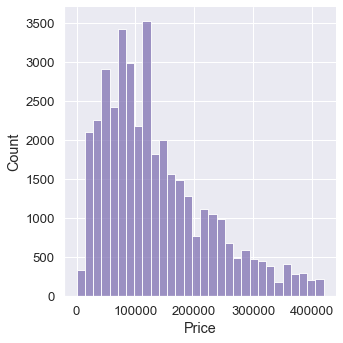

In [169]:
sns.displot(df['Price'], kde=False, bins=30, color='m')

<b>the highest price 100000 the count 3500 </b>

<AxesSubplot:xlabel='Price', ylabel='Density'>

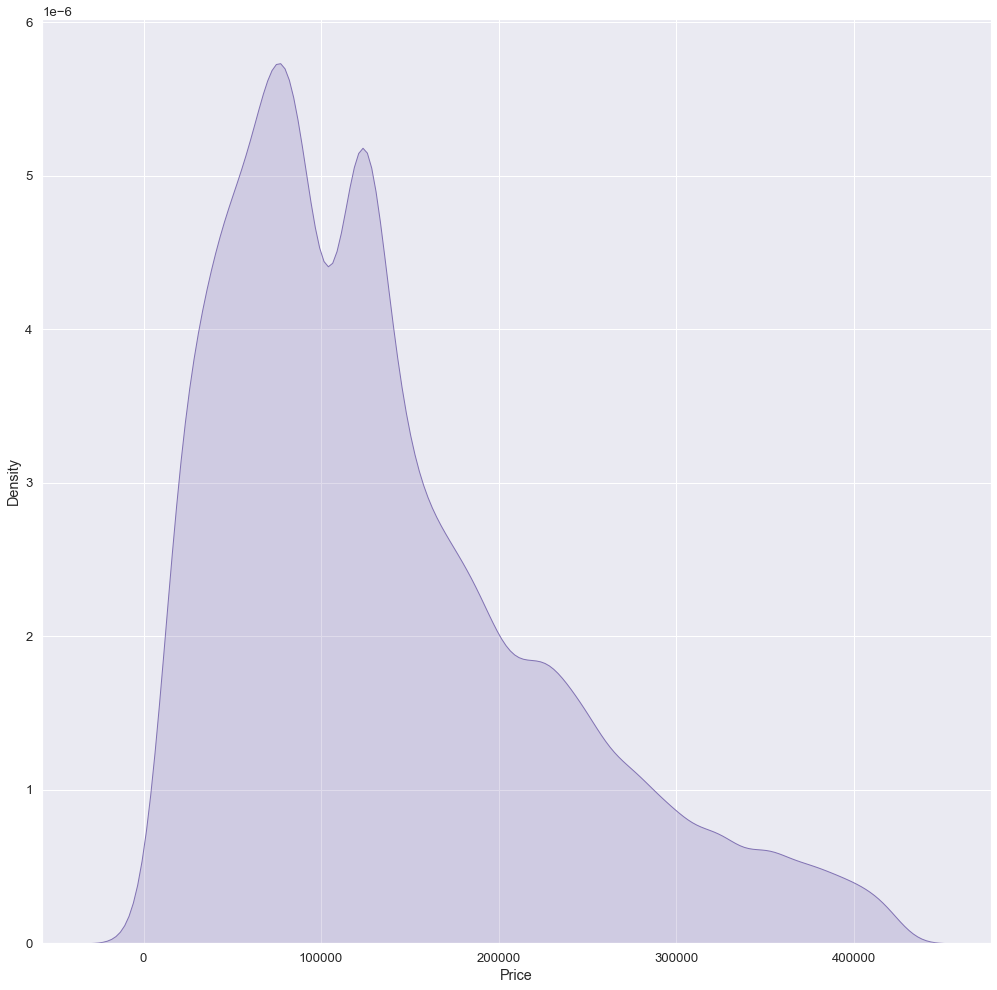

In [170]:
sns.kdeplot(df['Price'], shade=True, color='m')

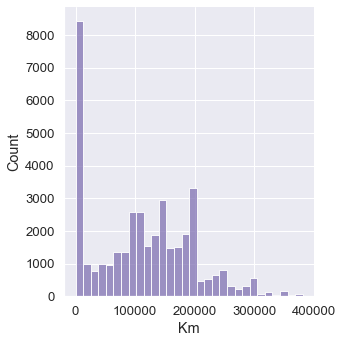

In [171]:
sns.displot(df['Km'], kde=False, bins=30, color='m')

<b>the most km 0 count is 8000</b>

<AxesSubplot:xlabel='Km', ylabel='Density'>

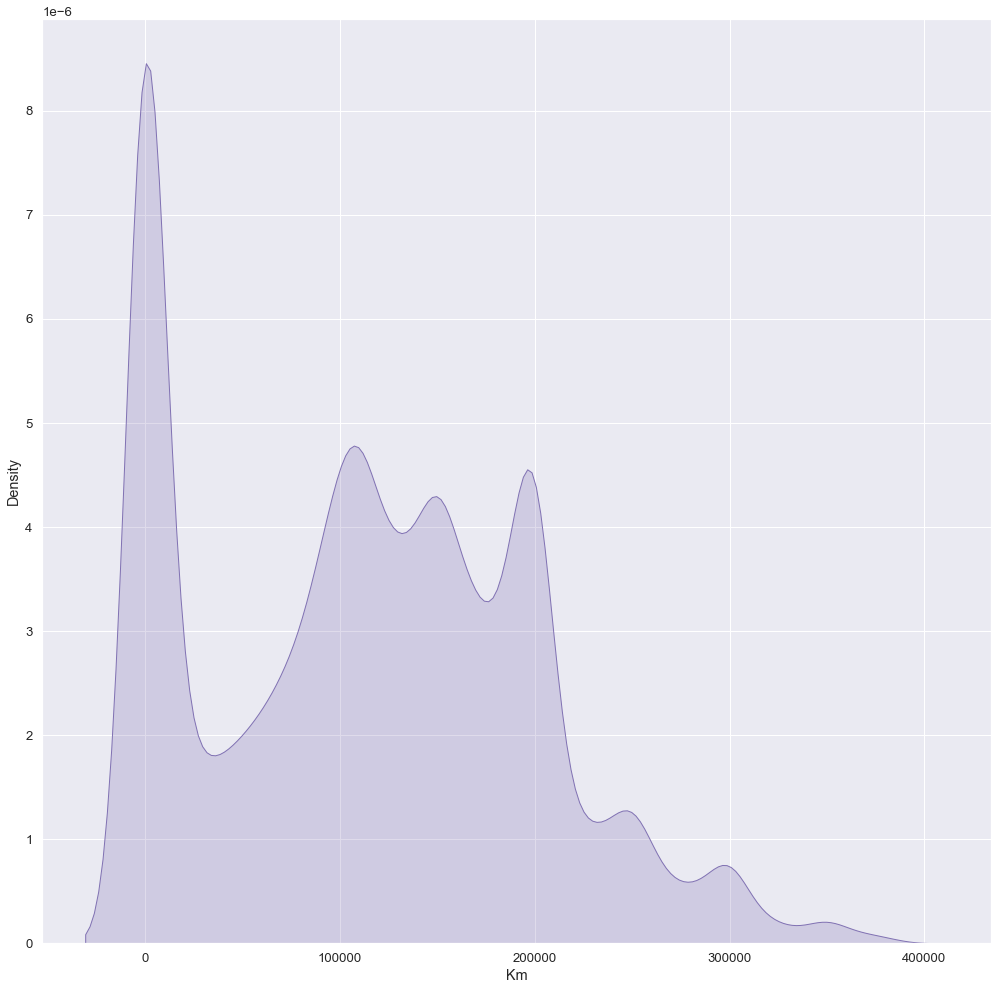

In [172]:
sns.kdeplot(df['Km'], shade=True, color='m')


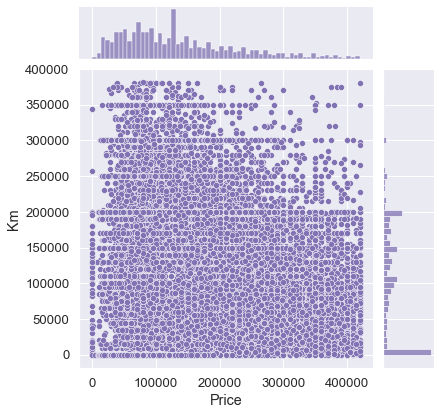

In [173]:
sns.jointplot(x='Price', y='Km', data=df, color='m')

<b>Each KM increases, the price decreases</b>

<AxesSubplot:xlabel='count', ylabel='Make'>

C:\Users\ELPOP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ELPOP\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


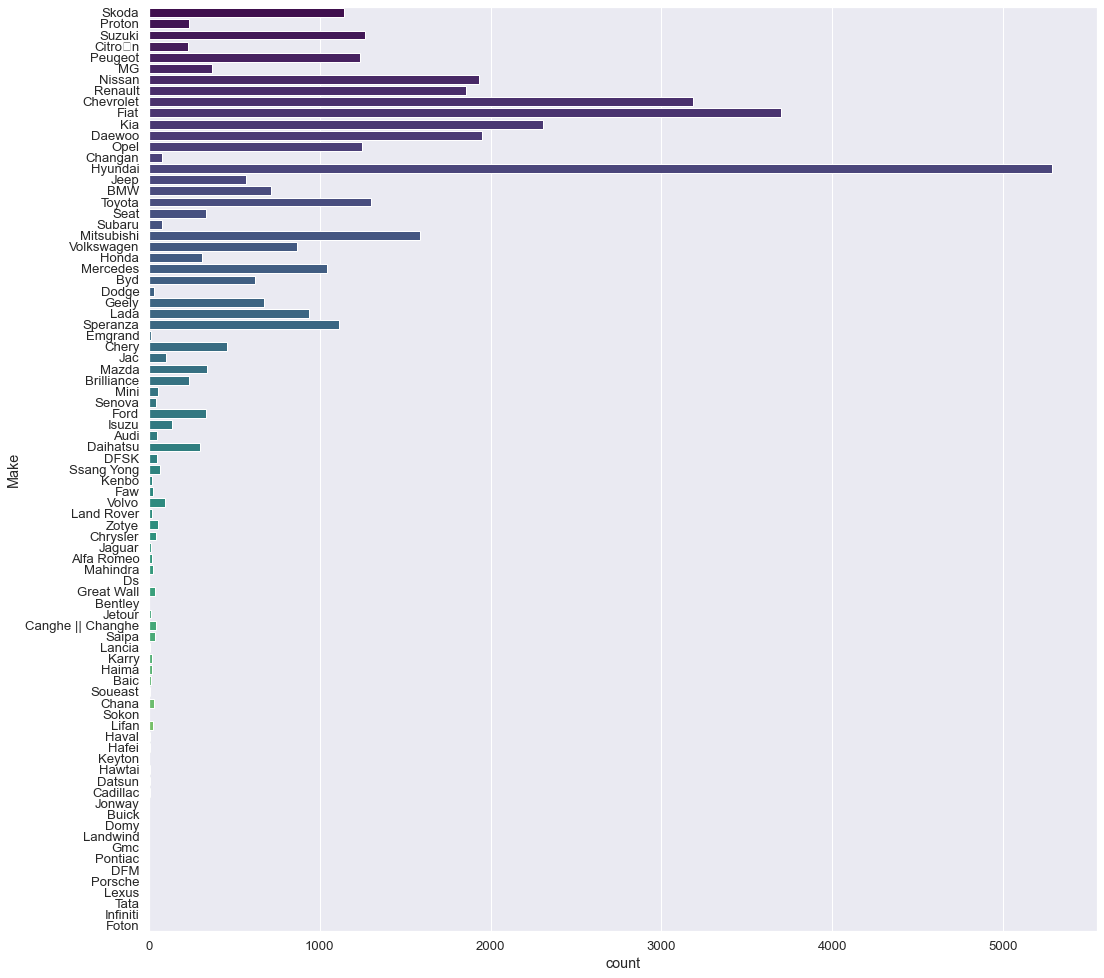

In [174]:
sns.countplot(y='Make', data=df, palette='viridis')

<b>the most make is hyundai</b>

<AxesSubplot:xlabel='count', ylabel='Used since'>

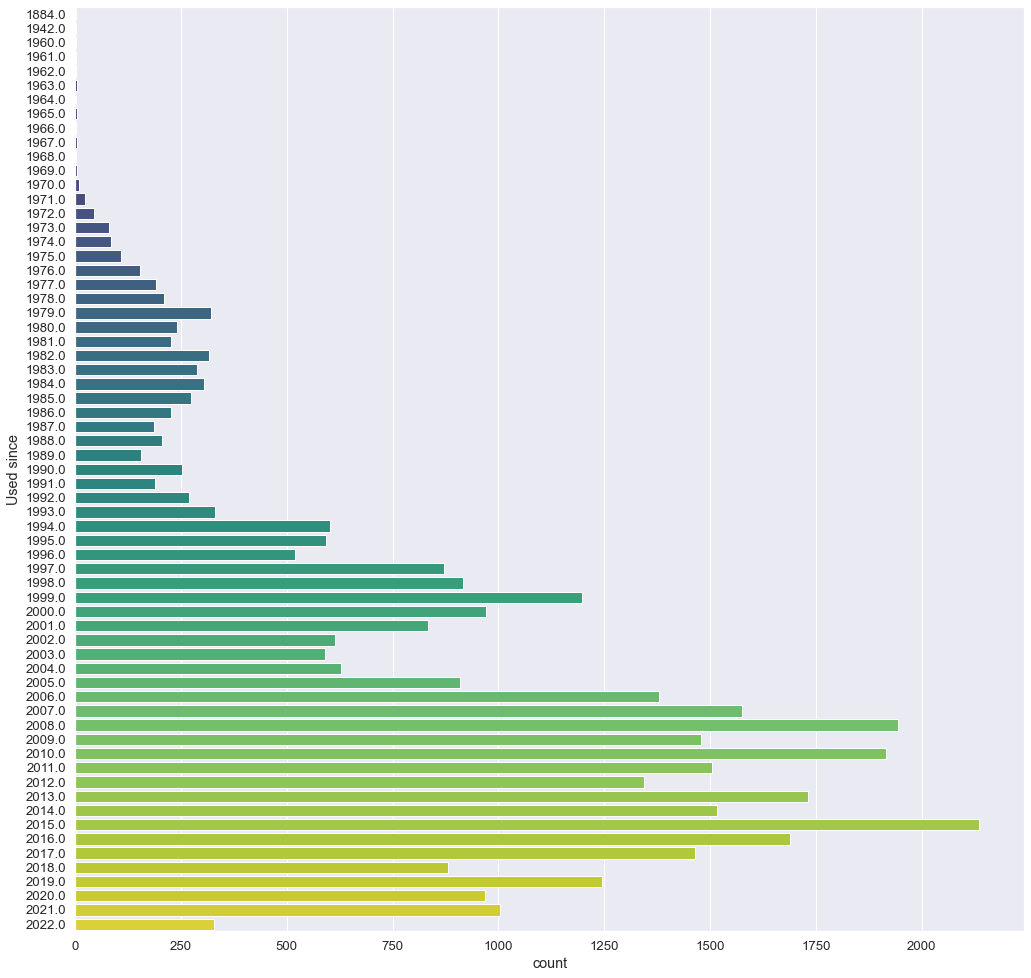

In [175]:
sns.countplot(y='Used since', data=df, palette='viridis')

<b> the most used since 2015</b>

<AxesSubplot:xlabel='Transmission', ylabel='count'>

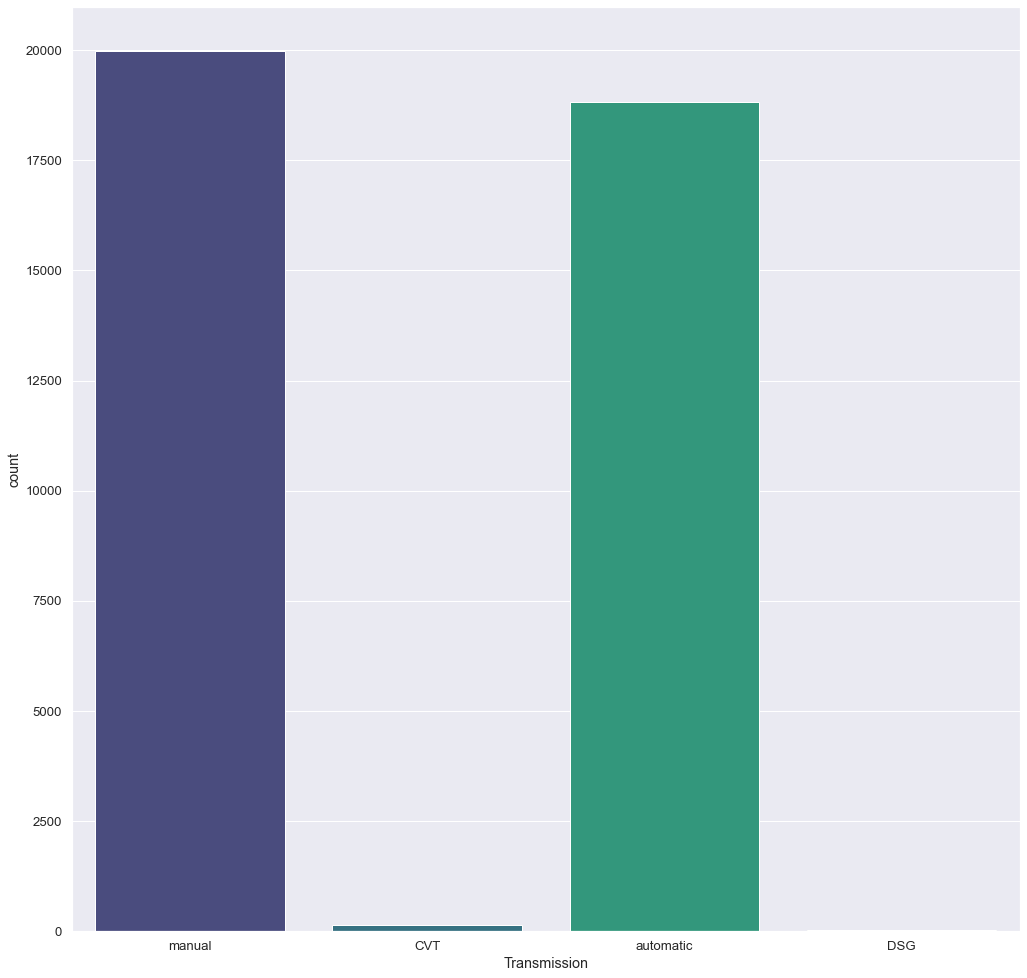

In [176]:
sns.countplot(x='Transmission', data=df, palette='viridis')

<b> the most Transmission is manual </b>

<AxesSubplot:xlabel='count', ylabel='City'>

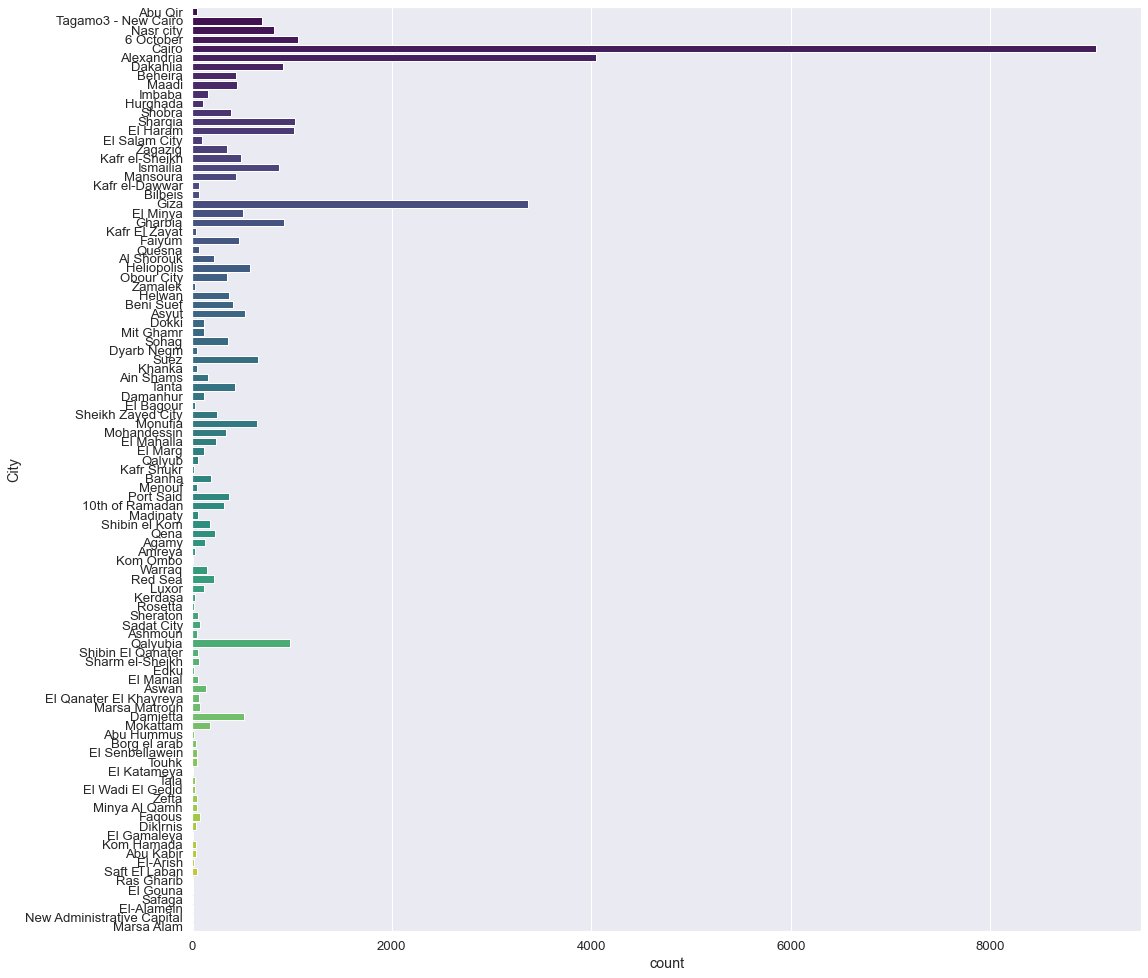

In [177]:
sns.countplot(y='City', data=df, palette='viridis')

<b>the most city is cairo</b>

<AxesSubplot:xlabel='count', ylabel='Color'>

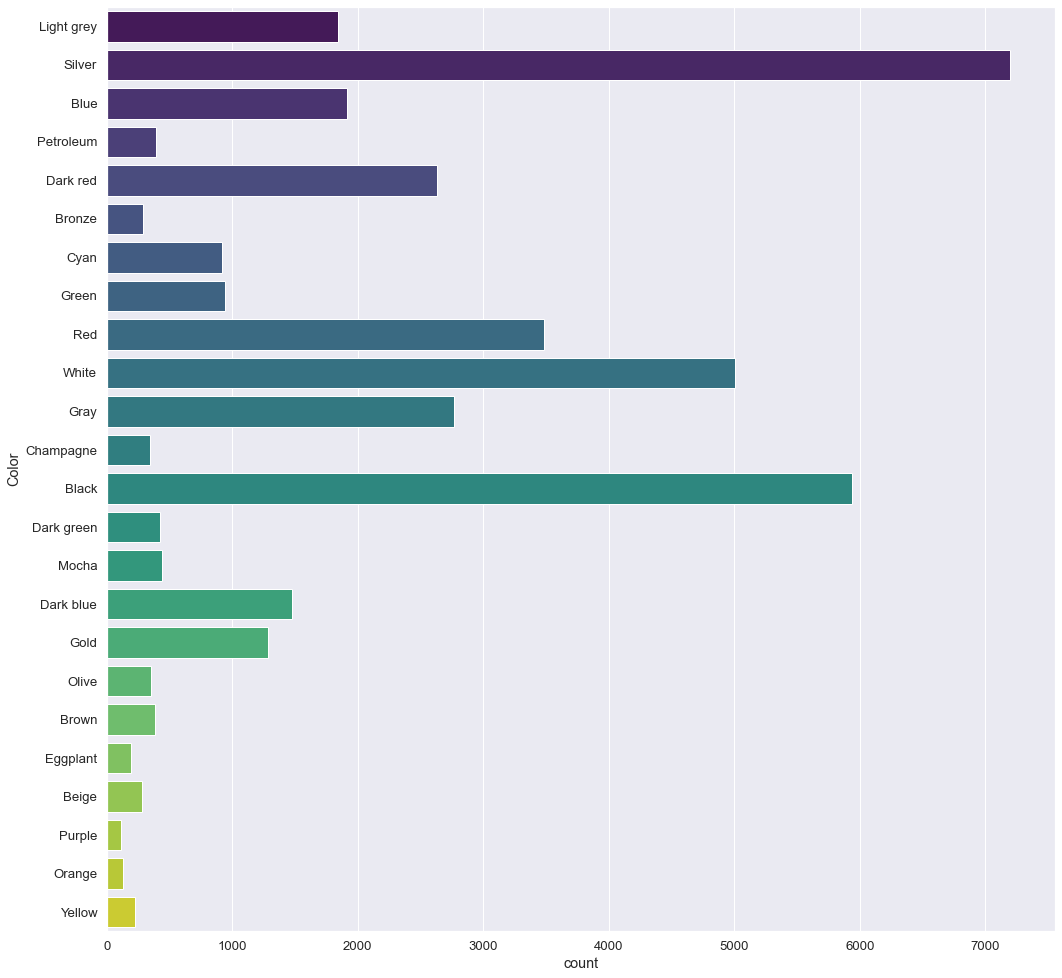

In [178]:
sns.countplot(y='Color', data=df, palette='viridis')

<b>the most color silver </b>

<AxesSubplot:xlabel='Fuel', ylabel='count'>

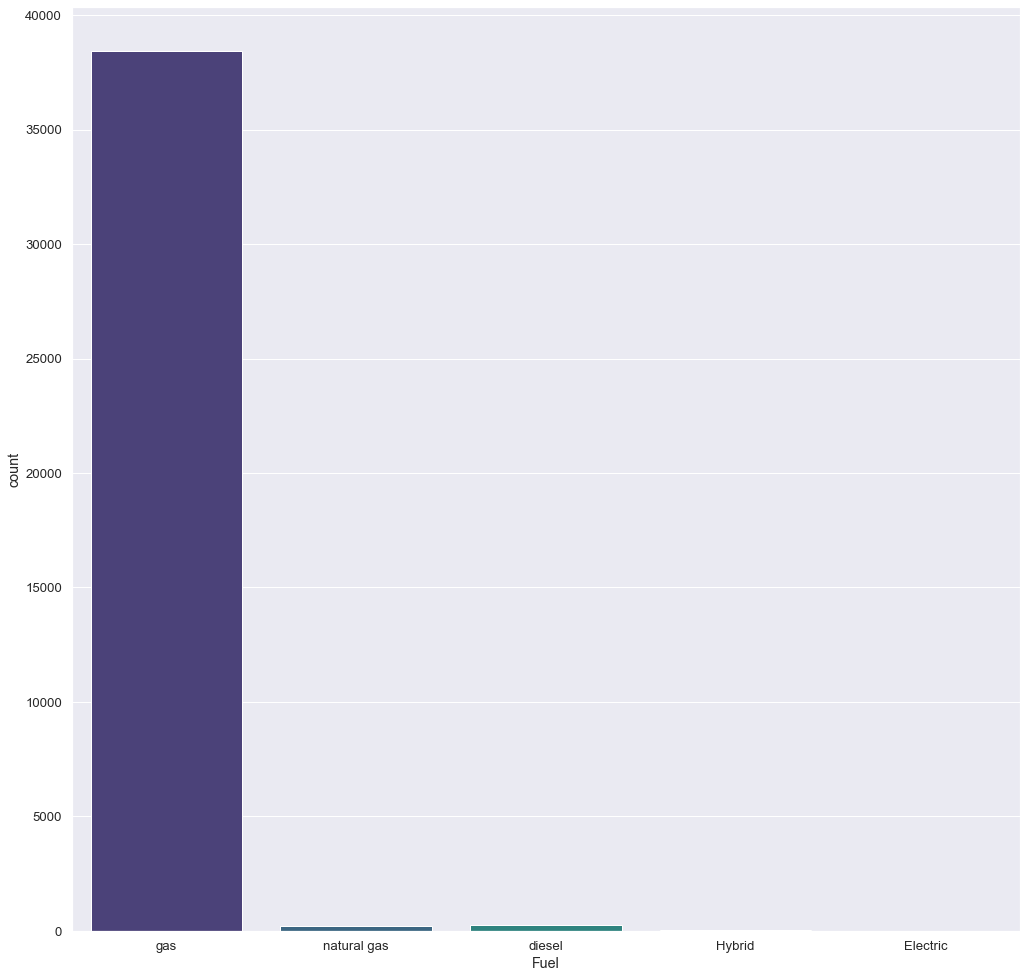

In [179]:
sns.countplot(x='Fuel', data=df, palette='viridis')

<b> the most fuel used is gas</b>

<AxesSubplot:xlabel='Leather seats', ylabel='count'>

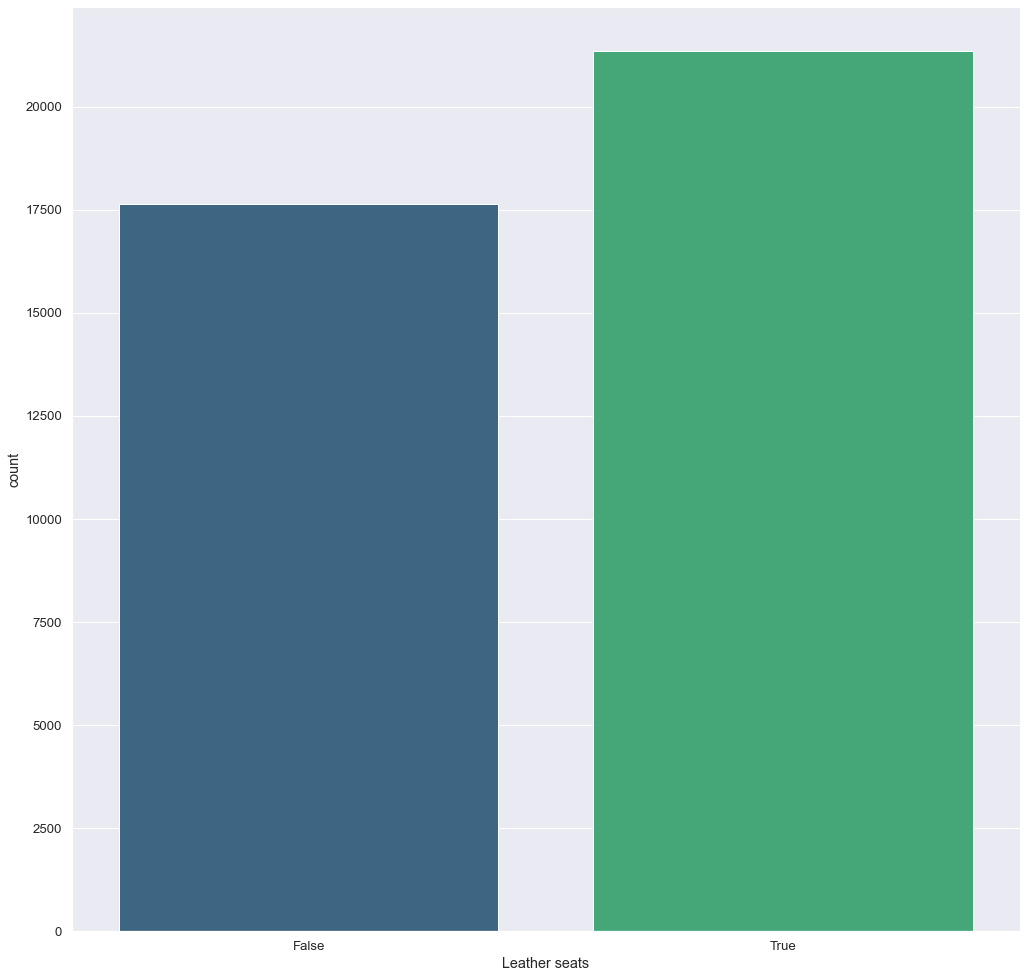

In [180]:
sns.countplot(x='Leather seats', data=df, palette='viridis')

<b> the most Leather seats</b>

<AxesSubplot:xlabel='Closing mirrors', ylabel='count'>

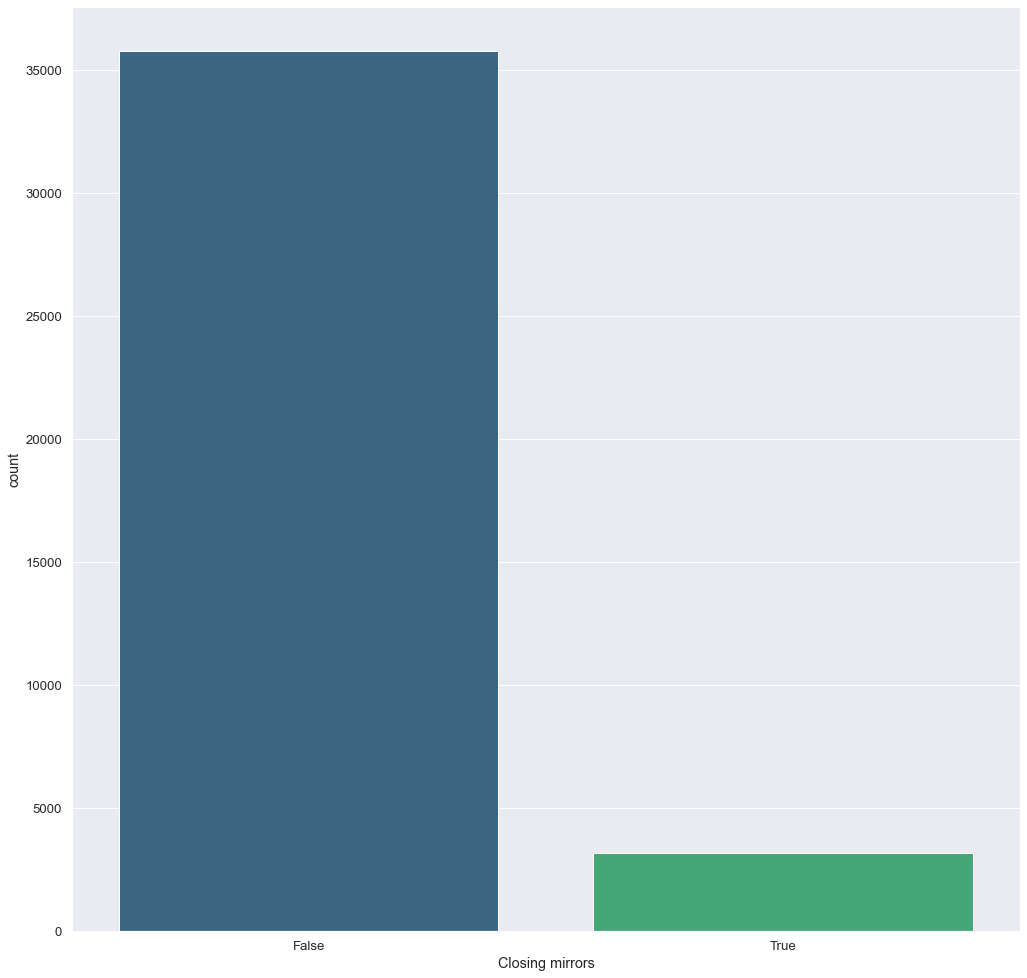

In [181]:
sns.countplot(x='Closing mirrors', data=df, palette='viridis')

<b>Most of the cars (>35K) does not have Closing mirrors</b>

# Questions

<b>Q. 1) Question ( Based on Value Counts )- Check what are the different types of Make are there in our dataset. And, what is the count (occurrence) of each Make in the data ?</b>

In [182]:
df['Make'].value_counts()

Hyundai      5288
Fiat         3703
Chevrolet    3183
Kia          2305
Daewoo       1951
             ... 
Pontiac         1
Lexus           1
Foton           1
Bentley         1
Infiniti        1
Name: Make, Length: 83, dtype: int64

<b>Q. 2)-nstruction ( Filtering ) - Show all the records where City is Cairo or Giza.</b>

In [183]:
df[df['City'].isin(['Cairo','Giza'])]

Unnamed: 0       Make    Model  Used since        Km Transmission  \
6               8     Nissan    Sunny      2022.0    1800.0    automatic   
9              11       Fiat    Punto      1998.0  200000.0       manual   
10             12        Kia   Cerato      2016.0     100.0    automatic   
15             17      Skoda  Felicia      1997.0   10000.0       manual   
20             22  Chevrolet    Optra      2022.0   14000.0    automatic   
...           ...        ...      ...         ...       ...          ...   
38976       42181    Hyundai   Lancer         NaN  110000.0    automatic   
38977       42182    Hyundai   Lancer         NaN  110000.0    automatic   
38978       42183    Hyundai   Lancer         NaN  110000.0    automatic   
38979       42184    Hyundai   Lancer         NaN  110000.0    automatic   
38980       42185    Hyundai   Lancer         NaN  110000.0    automatic   

        City   Color Fuel  Leather seats  ...  Alloy wheels  Rear camera  \
6      Cairo  Bronze  gas           True  ...          True         True   
9      Cairo   Green  gas          False  ...         False        False   
10     Cairo     Red  gas           True  ...          True        False   
15     Cairo     Red  gas          False  ...         False        False   
20     Cairo  Silver  gas          False  ...          True         True   
...      ...     ...  ...            ...  ...           ...          ...   
38976  Cairo  Silver  gas          False  ...         False        False   
38977  Cairo  Silver  gas          False  ...         False        False   
38978  Cairo  Silver  gas          False  ...         False        False   
38979  Cairo  Silver  gas          False  ...         False        False   
38980  Cairo  Silver  gas          False  ...         False        False   

         GPS  Fog light  Rear spoiler  Cruise control  Power Seats  \
6      False       True          True           False        False   
9      False      False         False           False        False   
10     False      False         False            True        False   
15     False      False         False           False        False   
20     False       True         False           False        False   
...      ...        ...           ...             ...          ...   
38976  False      False         False           False        False   
38977  False      False         False           False        False   
38978  False      False         False           False        False   
38979  False      False         False           False        False   
38980  False      False         False           False        False   

       Central lock  Alarm     Price  
6              True   True  275000.0  
9             False  False   50000.0  
10            False   True     263.0  
15            False  False   53000.0  
20             True   True  260000.0  
...             ...    ...       ...  
38976         False  False  124000.0  
38977         False  False  124000.0  
38978         False  False  124000.0  
38979         False  False  124000.0  
38980         False  False  124000.0  

[12422 rows x 50 columns]

<b>Instruction  price is above 100000.</b>

In [184]:
df[df['Price']>100000]

Unnamed: 0     Make       Model  Used since        Km Transmission  \
0               0    Skoda  Octavia A4      2000.0  175000.0       manual   
1               1   Proton       Preve      2019.0   17000.0          CVT   
3               4  Citro�n  C4 Picasso      2017.0  129000.0    automatic   
4               5  Peugeot         508      2015.0   95000.0    automatic   
5               7       MG          ZS      2020.0   20000.0    automatic   
...           ...      ...         ...         ...       ...          ...   
38976       42181  Hyundai      Lancer         NaN  110000.0    automatic   
38977       42182  Hyundai      Lancer         NaN  110000.0    automatic   
38978       42183  Hyundai      Lancer         NaN  110000.0    automatic   
38979       42184  Hyundai      Lancer         NaN  110000.0    automatic   
38980       42185  Hyundai      Lancer         NaN  110000.0    automatic   

                      City       Color Fuel  Leather seats  ...  Alloy wheels  \
0                  Abu Qir  Light grey  gas           True  ...          True   
1      Tagamo3 - New Cairo      Silver  gas          False  ...          True   
3                6 October   Petroleum  gas           True  ...          True   
4                6 October  Light grey  gas           True  ...          True   
5                Nasr city    Dark red  gas           True  ...          True   
...                    ...         ...  ...            ...  ...           ...   
38976                Cairo      Silver  gas          False  ...         False   
38977                Cairo      Silver  gas          False  ...         False   
38978                Cairo      Silver  gas          False  ...         False   
38979                Cairo      Silver  gas          False  ...         False   
38980                Cairo      Silver  gas          False  ...         False   

       Rear camera    GPS  Fog light  Rear spoiler  Cruise control  \
0             True   True       True         False           False   
1            False  False       True          True           False   
3            False   True       True         False            True   
4            False   True       True         False            True   
5             True  False       True         False            True   
...            ...    ...        ...           ...             ...   
38976        False  False      False         False           False   
38977        False  False      False         False           False   
38978        False  False      False         False           False   
38979        False  False      False         False           False   
38980        False  False      False         False           False   

       Power Seats  Central lock  Alarm     Price  
0            False          True   True  123000.0  
1            False          True   True  225000.0  
3            False          True   True  285000.0  
4             True          True   True  265000.0  
5            False          True   True  315000.0  
...            ...           ...    ...       ...  
38976        False         False  False  124000.0  
38977        False         False  False  124000.0  
38978        False         False  False  124000.0  
38979        False         False  False  124000.0  
38980        False         False  False  124000.0  

[21782 rows x 50 columns]

<b>average price per model</b>/

In [185]:
df.groupby('Model').mean()['Price']

Model
1007                 85000.000000
104                  15000.000000
106                  41600.000000
11                   20000.000000
1100                 13666.666667
                        ...      
Zafira Tourer       370000.000000
Zaz                  26214.285714
foison || Foison     97500.000000
ideal || Ideal       51095.238095
ssr                 230000.000000
Name: Price, Length: 764, dtype: float64

<b>For every car I walked, how many kilometres?</b>

In [186]:
df.groupby('Model').mean()['Km']

Model
1007                 90000.000000
104                      0.000000
106                 234000.000000
11                       0.000000
1100                  5200.000000
                        ...      
Zafira Tourer       120000.000000
Zaz                  54285.714286
foison || Foison     61750.000000
ideal || Ideal       56704.761905
ssr                 103000.000000
Name: Km, Length: 764, dtype: float64

<b>The most expensive cars in every city</b>

In [187]:
df.groupby('City').mean()['Price']

City
10th of Ramadan    115061.708861
6 October          161473.982971
Abu Hummus         114357.142857
Abu Kabir          149054.054054
Abu Qir            132347.826087
                       ...      
Touhk              128260.869565
Warraq             136097.902098
Zagazig            135252.173913
Zamalek            159392.857143
Zefta              172000.000000
Name: Price, Length: 101, dtype: float64

<b>Five most expensive cars</b>

In [188]:

df['Price'].value_counts().head(5)

124000.0    948
85000.0     881
120000.0    858
75000.0     851
80000.0     782
Name: Price, dtype: int64

<b>Show only the Model of all Lancer that were released in Cairo only</b>

In [189]:
df[(df['Model']=='Lancer')& (df['City']=='Cairo')]

Unnamed: 0        Make   Model  Used since        Km Transmission  \
21             23     Hyundai  Lancer         NaN  110000.0    automatic   
69             76  Mitsubishi  Lancer      2007.0  130000.0    automatic   
127           145     Hyundai  Lancer         NaN  110000.0    automatic   
161           184  Mitsubishi  Lancer      2018.0   80000.0    automatic   
174           197  Mitsubishi  Lancer      2009.0  261000.0       manual   
...           ...         ...     ...         ...       ...          ...   
38976       42181     Hyundai  Lancer         NaN  110000.0    automatic   
38977       42182     Hyundai  Lancer         NaN  110000.0    automatic   
38978       42183     Hyundai  Lancer         NaN  110000.0    automatic   
38979       42184     Hyundai  Lancer         NaN  110000.0    automatic   
38980       42185     Hyundai  Lancer         NaN  110000.0    automatic   

        City   Color Fuel  Leather seats  ...  Alloy wheels  Rear camera  \
21     Cairo  Silver  gas          False  ...         False        False   
69     Cairo  Silver  gas          False  ...          True        False   
127    Cairo  Silver  gas          False  ...         False        False   
161    Cairo  Silver  gas          False  ...         False        False   
174    Cairo   Black  gas          False  ...         False        False   
...      ...     ...  ...            ...  ...           ...          ...   
38976  Cairo  Silver  gas          False  ...         False        False   
38977  Cairo  Silver  gas          False  ...         False        False   
38978  Cairo  Silver  gas          False  ...         False        False   
38979  Cairo  Silver  gas          False  ...         False        False   
38980  Cairo  Silver  gas          False  ...         False        False   

         GPS  Fog light  Rear spoiler  Cruise control  Power Seats  \
21     False      False         False           False        False   
69     False      False         False           False        False   
127    False      False         False           False        False   
161    False      False         False           False        False   
174    False      False         False           False        False   
...      ...        ...           ...             ...          ...   
38976  False      False         False           False        False   
38977  False      False         False           False        False   
38978  False      False         False           False        False   
38979  False      False         False           False        False   
38980  False      False         False           False        False   

       Central lock  Alarm     Price  
21            False  False  124000.0  
69            False   True  188000.0  
127           False  False  124000.0  
161           False  False  290000.0  
174           False  False  143000.0  
...             ...    ...       ...  
38976         False  False  124000.0  
38977         False  False  124000.0  
38978         False  False  124000.0  
38979         False  False  124000.0  
38980         False  False  124000.0  

[1147 rows x 50 columns]

<b>Show only the Make   isFiatcars fuel gas</b>

In [190]:
df[(df['Make']=='Fiat')& (df['Fuel']=='gas')]

Unnamed: 0  Make   Model  Used since        Km Transmission  \
9              11  Fiat   Punto      1998.0  200000.0       manual   
18             20  Fiat     127      1987.0       0.0       manual   
58             64  Fiat  Regata      1985.0       0.0       manual   
60             66  Fiat     124      1974.0       0.0       manual   
67             74  Fiat  Shahin      1999.0       0.0       manual   
...           ...   ...     ...         ...       ...          ...   
38642       41843  Fiat     132      1976.0       0.0       manual   
38644       41845  Fiat     132      1978.0       0.0       manual   
38649       41851  Fiat     Uno      1993.0       0.0       manual   
38653       41857  Fiat  Regata      1986.0       0.0       manual   
38654       41858  Fiat   Petra      2003.0       0.0       manual   

                      City      Color Fuel  Leather seats  ...  Alloy wheels  \
9                    Cairo      Green  gas          False  ...         False   
18                  Imbaba      White  gas           True  ...         False   
58                 Zagazig      White  gas          False  ...         False   
60               6 October        Red  gas          False  ...         False   
67                  Quesna        Red  gas          False  ...         False   
...                    ...        ...  ...            ...  ...           ...   
38642            Ain Shams       Cyan  gas          False  ...         False   
38644                Maadi      White  gas          False  ...         False   
38649           El Mahalla      White  gas          False  ...         False   
38653            Beni Suef  Petroleum  gas          False  ...         False   
38654  Tagamo3 - New Cairo       Gray  gas          False  ...         False   

       Rear camera    GPS  Fog light  Rear spoiler  Cruise control  \
9            False  False      False         False           False   
18           False  False       True         False           False   
58           False  False      False         False           False   
60           False  False      False         False           False   
67           False  False      False         False           False   
...            ...    ...        ...           ...             ...   
38642        False  False      False         False           False   
38644        False  False      False         False           False   
38649        False  False      False         False           False   
38653        False  False      False         False           False   
38654        False  False      False         False           False   

       Power Seats  Central lock  Alarm    Price  
9            False         False  False  50000.0  
18           False          True   True  14000.0  
58           False         False  False  20000.0  
60           False         False  False  13000.0  
67           False         False  False  26000.0  
...            ...           ...    ...      ...  
38642        False         False  False  15000.0  
38644        False         False  False  19000.0  
38649        False         False  False  29000.0  
38653        False         False  False  30000.0  
38654        False         False  False  50000.0  

[3676 rows x 50 columns]

In [191]:
df[(df['Used since']=='2015')& (df['Color']=='White')]

Empty DataFrame
Columns: [Unnamed: 0, Make, Model, Used since, Km, Transmission, City, Color, Fuel, Leather seats, Closing mirrors, Intelligent parking system, Sunroof, Fabric brushes, Air Conditioning, Power Steering, Remote Keyless, Electric mirrors, Front Power Windows, Back Power Windows, Tinted Glass, CD Player, DVD Player, Bluetooth, Multifunction, Cassette Radio, AUX, CD Changer, USB Port, Anti - theft System, Side Airbag, ABS, EPS, EBD, ESP, Sensors, Rear sensors, Driver Airbag, Passenger Airbag, Front sensors, Alloy wheels, Rear camera, GPS, Fog light, Rear spoiler, Cruise control, Power Seats, Central lock, Alarm, Price]
Index: []

[0 rows x 50 columns]

<b>all cars fiat & manual</b>

In [192]:
df[(df['Make']=='Fiat')& (df['Transmission']=='manual')]

Unnamed: 0  Make   Model  Used since        Km Transmission  \
9              11  Fiat   Punto      1998.0  200000.0       manual   
18             20  Fiat     127      1987.0       0.0       manual   
58             64  Fiat  Regata      1985.0       0.0       manual   
60             66  Fiat     124      1974.0       0.0       manual   
67             74  Fiat  Shahin      1999.0       0.0       manual   
...           ...   ...     ...         ...       ...          ...   
38644       41845  Fiat     132      1978.0       0.0       manual   
38649       41851  Fiat     Uno      1993.0       0.0       manual   
38653       41857  Fiat  Regata      1986.0       0.0       manual   
38654       41858  Fiat   Petra      2003.0       0.0       manual   
38673       41878  Fiat  Shahin      1997.0       0.0       manual   

                      City      Color         Fuel  Leather seats  ...  \
9                    Cairo      Green          gas          False  ...   
18                  Imbaba      White          gas           True  ...   
58                 Zagazig      White          gas          False  ...   
60               6 October        Red          gas          False  ...   
67                  Quesna        Red          gas          False  ...   
...                    ...        ...          ...            ...  ...   
38644                Maadi      White          gas          False  ...   
38649           El Mahalla      White          gas          False  ...   
38653            Beni Suef  Petroleum          gas          False  ...   
38654  Tagamo3 - New Cairo       Gray          gas          False  ...   
38673      10th of Ramadan      White  natural gas          False  ...   

       Alloy wheels  Rear camera    GPS  Fog light  Rear spoiler  \
9             False        False  False      False         False   
18            False        False  False       True         False   
58            False        False  False      False         False   
60            False        False  False      False         False   
67            False        False  False      False         False   
...             ...          ...    ...        ...           ...   
38644         False        False  False      False         False   
38649         False        False  False      False         False   
38653         False        False  False      False         False   
38654         False        False  False      False         False   
38673         False        False  False      False         False   

       Cruise control  Power Seats  Central lock  Alarm    Price  
9               False        False         False  False  50000.0  
18              False        False          True   True  14000.0  
58              False        False         False  False  20000.0  
60              False        False         False  False  13000.0  
67              False        False         False  False  26000.0  
...               ...          ...           ...    ...      ...  
38644           False        False         False  False  19000.0  
38649           False        False         False  False  29000.0  
38653           False        False         False  False  30000.0  
38654           False        False         False  False  50000.0  
38673           False        False         False  False  33000.0  

[3455 rows x 50 columns]

In [193]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [194]:
for col in df.columns:
    print(col)

Make
Model
Used since
Km
Transmission
City
Color
Fuel
Leather seats
Closing mirrors
Intelligent parking system
Sunroof
Fabric brushes
Air Conditioning
Power Steering
Remote Keyless
Electric mirrors
Front Power Windows
Back Power Windows
Tinted Glass
CD Player
DVD Player
Bluetooth
Multifunction
Cassette Radio
AUX
CD Changer
USB Port
Anti - theft System
Side Airbag
ABS
EPS
EBD
ESP
Sensors
Rear sensors
Driver Airbag
Passenger Airbag
Front sensors
Alloy wheels
Rear camera
GPS
Fog light
Rear spoiler
Cruise control
Power Seats
Central lock
Alarm
Price


In [195]:
def transfor_to_onehot(df, feat, value):
    models = sorted(list(df[feat].unique()))
    del models[0]
    make_onehot = []
    for model in models:
        if model == value:
            make_onehot.append(1)
        else:
            make_onehot.append(0)
    return make_onehot

In [196]:
sorted(df['Transmission'].unique())

['CVT', 'DSG', 'automatic', 'manual']

In [197]:
   
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')
df['Used since']=impute.fit_transform(df[['Used since']])
impute.statistics_


array([2015.])

In [200]:
df2.isna().sum()

Make                          0
Model                         0
Used since                    0
Km                            0
Transmission                  0
City                          0
Color                         0
Fuel                          0
Leather seats                 0
Closing mirrors               0
Intelligent parking system    0
Sunroof                       0
Fabric brushes                0
Air Conditioning              0
Power Steering                0
Remote Keyless                0
Electric mirrors              0
Front Power Windows           0
Back Power Windows            0
Tinted Glass                  0
CD Player                     0
DVD Player                    0
Bluetooth                     0
Multifunction                 0
Cassette Radio                0
AUX                           0
CD Changer                    0
USB Port                      0
Anti - theft System           0
Side Airbag                   0
ABS                           0
EPS     

In [199]:
import joblib
df2 = df.copy()
df2.head()
joblib.dump(df2, 'df2.joblib')

['df2.joblib']

# ML

In [201]:
df = pd.get_dummies(df, columns=['Make', 'Model', 'Used since',  'Transmission', 'City', 'Color',
       'Fuel'], drop_first=True)
df

Km  Leather seats  Closing mirrors  Intelligent parking system  \
0      175000.0           True            False                       False   
1       17000.0          False            False                        True   
2       93300.0          False            False                       False   
3      129000.0           True             True                       False   
4       95000.0           True            False                       False   
...         ...            ...              ...                         ...   
38976  110000.0          False            False                       False   
38977  110000.0          False            False                       False   
38978  110000.0          False            False                       False   
38979  110000.0          False            False                       False   
38980  110000.0          False            False                       False   

       Sunroof  Fabric brushes  Air Conditioning  Power Steering  \
0        False           False              True            True   
1        False           False              True            True   
2        False           False             False           False   
3        False           False              True            True   
4        False           False              True            True   
...        ...             ...               ...             ...   
38976    False           False             False            True   
38977    False           False             False            True   
38978    False           False             False            True   
38979    False           False             False            True   
38980    False           False             False            True   

       Remote Keyless  Electric mirrors  ...  Color_Petroleum  Color_Purple  \
0                True              True  ...                0             0   
1                True              True  ...                0             0   
2               False             False  ...                0             0   
3                True              True  ...                1             0   
4                True              True  ...                0             0   
...               ...               ...  ...              ...           ...   
38976           False             False  ...                0             0   
38977           False             False  ...                0             0   
38978           False             False  ...                0             0   
38979           False             False  ...                0             0   
38980           False             False  ...                0             0   

       Color_Red  Color_Silver  Color_White  Color_Yellow  Fuel_Hybrid  \
0              0             0            0             0            0   
1              0             1            0             0            0   
2              0             0            0             0            0   
3              0             0            0             0            0   
4              0             0            0             0            0   
...          ...           ...          ...           ...          ...   
38976          0             1            0             0            0   
38977          0             1            0             0            0   
38978          0             1            0             0            0   
38979          0             1            0             0            0   
38980          0             1            0             0            0   

       Fuel_diesel  Fuel_gas  Fuel_natural gas  
0                0         1                 0  
1                0         1                 0  
2                0         1                 0  
3                0         1                 0  
4                0         1                 0  
...            ...       ...               ...  
38976            0         1                 0  
38977            

In [202]:
df2['Used since']

0        2000.0
1        2019.0
2        2007.0
3        2017.0
4        2015.0
          ...  
38976    2015.0
38977    2015.0
38978    2015.0
38979    2015.0
38980    2015.0
Name: Used since, Length: 38981, dtype: float64

In [203]:
df

Km  Leather seats  Closing mirrors  Intelligent parking system  \
0      175000.0           True            False                       False   
1       17000.0          False            False                        True   
2       93300.0          False            False                       False   
3      129000.0           True             True                       False   
4       95000.0           True            False                       False   
...         ...            ...              ...                         ...   
38976  110000.0          False            False                       False   
38977  110000.0          False            False                       False   
38978  110000.0          False            False                       False   
38979  110000.0          False            False                       False   
38980  110000.0          False            False                       False   

       Sunroof  Fabric brushes  Air Conditioning  Power Steering  \
0        False           False              True            True   
1        False           False              True            True   
2        False           False             False           False   
3        False           False              True            True   
4        False           False              True            True   
...        ...             ...               ...             ...   
38976    False           False             False            True   
38977    False           False             False            True   
38978    False           False             False            True   
38979    False           False             False            True   
38980    False           False             False            True   

       Remote Keyless  Electric mirrors  ...  Color_Petroleum  Color_Purple  \
0                True              True  ...                0             0   
1                True              True  ...                0             0   
2               False             False  ...                0             0   
3                True              True  ...                1             0   
4                True              True  ...                0             0   
...               ...               ...  ...              ...           ...   
38976           False             False  ...                0             0   
38977           False             False  ...                0             0   
38978           False             False  ...                0             0   
38979           False             False  ...                0             0   
38980           False             False  ...                0             0   

       Color_Red  Color_Silver  Color_White  Color_Yellow  Fuel_Hybrid  \
0              0             0            0             0            0   
1              0             1            0             0            0   
2              0             0            0             0            0   
3              0             0            0             0            0   
4              0             0            0             0            0   
...          ...           ...          ...           ...          ...   
38976          0             1            0             0            0   
38977          0             1            0             0            0   
38978          0             1            0             0            0   
38979          0             1            0             0            0   
38980          0             1            0             0            0   

       Fuel_diesel  Fuel_gas  Fuel_natural gas  
0                0         1                 0  
1                0         1                 0  
2                0         1                 0  
3                0         1                 0  
4                0         1                 0  
...            ...       ...               ...  
38976            0         1                 0  
38977            

In [204]:
for col in df.columns:
    print(col)

Km
Leather seats
Closing mirrors
Intelligent parking system
Sunroof
Fabric brushes
Air Conditioning
Power Steering
Remote Keyless
Electric mirrors
Front Power Windows
Back Power Windows
Tinted Glass
CD Player
DVD Player
Bluetooth
Multifunction
Cassette Radio
AUX
CD Changer
USB Port
Anti - theft System
Side Airbag
ABS
EPS
EBD
ESP
Sensors
Rear sensors
Driver Airbag
Passenger Airbag
Front sensors
Alloy wheels
Rear camera
GPS
Fog light
Rear spoiler
Cruise control
Power Seats
Central lock
Alarm
Price
Make_Audi
Make_BMW
Make_Baic
Make_Bentley
Make_Brilliance
Make_Buick
Make_Byd
Make_Cadillac
Make_Canghe || Changhe
Make_Chana
Make_Changan
Make_Chery
Make_Chevrolet
Make_Chrysler
Make_Citro�n
Make_DFM
Make_DFSK
Make_Daewoo
Make_Daihatsu
Make_Datsun
Make_Dodge
Make_Domy
Make_Ds
Make_Emgrand
Make_Faw
Make_Fiat
Make_Ford
Make_Foton
Make_Geely
Make_Gmc
Make_Great Wall
Make_Hafei
Make_Haima
Make_Haval
Make_Hawtai
Make_Honda
Make_Hyundai
Make_Infiniti
Make_Isuzu
Make_Jac
Make_Jaguar
Make_Jeep
Make_Je

In [205]:
from sklearn.model_selection import train_test_split

In [206]:








x = df.drop('Price', axis=1)
y = df['Price']

In [207]:
def transfor_to_onehot(df, feat, value):
    models = sorted(list(df[feat].unique()))
    del models[0]
    make_onehot = []
    for model in models:
        if model == value:
            make_onehot.append(1)
        else:
            make_onehot.append(0)
    return make_onehot

In [208]:
'Make', 'Model', 'Used since',  'Transmission', 'City', 'Color',
       'Fuel'

IndentationError: unexpected indent (<ipython-input-208-38bf1fa7e6f1>, line 2)

In [209]:
counter = 41
counter += len(transfor_to_onehot(df2, 'Make', '1942.0'))
counter += len(transfor_to_onehot(df2, 'Model', '1942.0'))
counter += len(transfor_to_onehot(df2, 'Used since', '1942.0'))
counter += len(transfor_to_onehot(df2, 'Transmission', '1942.0'))
counter += len(transfor_to_onehot(df2, 'City', '1942.0'))
counter += len(transfor_to_onehot(df2, 'Color', '1942.0'))
counter += len(transfor_to_onehot(df2, 'Fuel', '1942.0'))
counter

1080

In [210]:
df2.isna().sum()

Make                          0
Model                         0
Used since                    0
Km                            0
Transmission                  0
City                          0
Color                         0
Fuel                          0
Leather seats                 0
Closing mirrors               0
Intelligent parking system    0
Sunroof                       0
Fabric brushes                0
Air Conditioning              0
Power Steering                0
Remote Keyless                0
Electric mirrors              0
Front Power Windows           0
Back Power Windows            0
Tinted Glass                  0
CD Player                     0
DVD Player                    0
Bluetooth                     0
Multifunction                 0
Cassette Radio                0
AUX                           0
CD Changer                    0
USB Port                      0
Anti - theft System           0
Side Airbag                   0
ABS                           0
EPS     

In [211]:
len(transfor_to_onehot(df2, 'Used since', '1942.0'))

64

In [212]:
x.columns[40+82+763+64]

'Used since_2022.0'

In [213]:
for col in x.columns:
    print(col)

Km
Leather seats
Closing mirrors
Intelligent parking system
Sunroof
Fabric brushes
Air Conditioning
Power Steering
Remote Keyless
Electric mirrors
Front Power Windows
Back Power Windows
Tinted Glass
CD Player
DVD Player
Bluetooth
Multifunction
Cassette Radio
AUX
CD Changer
USB Port
Anti - theft System
Side Airbag
ABS
EPS
EBD
ESP
Sensors
Rear sensors
Driver Airbag
Passenger Airbag
Front sensors
Alloy wheels
Rear camera
GPS
Fog light
Rear spoiler
Cruise control
Power Seats
Central lock
Alarm
Make_Audi
Make_BMW
Make_Baic
Make_Bentley
Make_Brilliance
Make_Buick
Make_Byd
Make_Cadillac
Make_Canghe || Changhe
Make_Chana
Make_Changan
Make_Chery
Make_Chevrolet
Make_Chrysler
Make_Citro�n
Make_DFM
Make_DFSK
Make_Daewoo
Make_Daihatsu
Make_Datsun
Make_Dodge
Make_Domy
Make_Ds
Make_Emgrand
Make_Faw
Make_Fiat
Make_Ford
Make_Foton
Make_Geely
Make_Gmc
Make_Great Wall
Make_Hafei
Make_Haima
Make_Haval
Make_Hawtai
Make_Honda
Make_Hyundai
Make_Infiniti
Make_Isuzu
Make_Jac
Make_Jaguar
Make_Jeep
Make_Jetour
M

In [214]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [215]:
x_train.shape[1]

1080

In [216]:
pd.set_option('max_columns',None)

In [217]:
x_train.head()

Km  Leather seats  Closing mirrors  Intelligent parking system  \
10128  110000.0           True             True                        True   
36970  270000.0          False            False                       False   
6209        0.0           True            False                       False   
37323  144000.0          False            False                       False   
17100       0.0           True            False                       False   

       Sunroof  Fabric brushes  Air Conditioning  Power Steering  \
10128     True           False              True            True   
36970    False           False             False            True   
6209     False           False             False           False   
37323    False           False              True           False   
17100    False           False             False           False   

       Remote Keyless  Electric mirrors  Front Power Windows  \
10128            True              True                 True   
36970           False             False                False   
6209            False             False                False   
37323            True             False                 True   
17100           False             False                False   

       Back Power Windows  Tinted Glass  CD Player  DVD Player  Bluetooth  \
10128                True          True       True        True       True   
36970               False         False      False       False      False   
6209                False         False      False       False      False   
37323                True          True      False       False      False   
17100               False         False      False       False      False   

       Multifunction  Cassette Radio    AUX  CD Changer  USB Port  \
10128          False            True   True        True      True   
36970          False           False  False       False     False   
6209           False            True  False       False     False   
37323          False            True  False       False     False   
17100          False            True  False       False     False   

       Anti - theft System  Side Airbag    ABS    EPS    EBD    ESP  Sensors  \
10128                 True         True   True   True   True  False     True   
36970                False        False  False  False  False  False    False   
6209                 False        False  False  False  False  False    False   
37323                False         True   True  False  False  False    False   
17100                False        False  False  False  False  False    False   

       Rear sensors  Driver Airbag  Passenger Airbag  Front sensors  \
10128          True           True              True           True   
36970         False          False             False          False   
6209          False          False             False          False   
37323         False           True              True          False   
17100         False          False             False          False   

       Alloy wheels  Rear camera    GPS  Fog light  Rear spoiler  \
10128          True         True   True       True          True   
36970         False        False  False      False         False   
6209          False        False  False      False         False   
37323          True        False  False      False         False   
17100         False        False  False      False         False   

       Cruise control  Power Seats  Central lock  Alarm  Make_Audi  Make_BMW  \
10128            True         True          True   True          0         0   
36970           False        False         False  False          0         0   
6209            False        False         False  False          0         0   
37323           False         True         False  False          0         0   
17100           False        False         False  False          0         0   

       Make_Baic  Make_Bentley  Make_Brilliance  Make_Buick  Make_By

In [218]:
from sklearn.preprocessing import StandardScaler

In [219]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [235]:
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = [
     LinearRegression(),
     KNeighborsRegressor(),
     DecisionTreeRegressor(),
     SVR(),
     RandomForestRegressor(), 
     XGBRegressor()
]

for model in models:  
     print(model)
     model.fit(x_train, y_train)
     y_pred = model.predict(x_test)
     print(f'R2: {r2_score(y_test, y_pred) * 100}')
     print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
     print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}\n---------')

LinearRegression()
R2: -5.234397592196251e+25
MAE: 2629505246334707.0
RMSE: 6.558592207970779e+16
---------
KNeighborsRegressor()
R2: 78.27035182513615
MAE: 24910.154700525844
RMSE: 42257.482697197396
---------
DecisionTreeRegressor()
R2: 71.61102663596571
MAE: 28281.98743106323
RMSE: 48300.554728886396
---------
SVR()
R2: -3.5522280996080235
MAE: 69697.11660383047
RMSE: 92248.00844951566
---------
RandomForestRegressor()
R2: 83.21832206456256
MAE: 21954.848186159954
RMSE: 37135.986566224434
---------
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=

# Hyper parameter tuning

In [236]:
model = XGBRegressor()
params = [
    {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 20), 'n_estimators': range(100, 501, 50)}
]

In [237]:
from sklearn.model_selection import RandomizedSearchCV

In [238]:
#gs = GridSearchCV(estimator=model, param_grid=params, cv=10, n_jobs=-1, verbose=3)
gs = RandomizedSearchCV(estimator=model, param_distributions=params, cv=10, scoring='r2', n_jobs=-1, verbose=3)

In [239]:
gs.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[18:07:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

In [240]:
gs.best_score_

0.8897881244409198

In [241]:
model = gs.best_estimator_

In [242]:
y_pred = model.predict(x_test)
r2_score(y_test, y_pred) * 100

88.50299802741391

# test model on new data

In [243]:
list(x.columns)

['Km',
 'Leather seats',
 'Closing mirrors',
 'Intelligent parking system',
 'Sunroof',
 'Fabric brushes',
 'Air Conditioning',
 'Power Steering',
 'Remote Keyless',
 'Electric mirrors',
 'Front Power Windows',
 'Back Power Windows',
 'Tinted Glass',
 'CD Player',
 'DVD Player',
 'Bluetooth',
 'Multifunction',
 'Cassette Radio',
 'AUX',
 'CD Changer',
 'USB Port',
 'Anti - theft System',
 'Side Airbag',
 'ABS',
 'EPS',
 'EBD',
 'ESP',
 'Sensors',
 'Rear sensors',
 'Driver Airbag',
 'Passenger Airbag',
 'Front sensors',
 'Alloy wheels',
 'Rear camera',
 'GPS',
 'Fog light',
 'Rear spoiler',
 'Cruise control',
 'Power Seats',
 'Central lock',
 'Alarm',
 'Make_Audi',
 'Make_BMW',
 'Make_Baic',
 'Make_Bentley',
 'Make_Brilliance',
 'Make_Buick',
 'Make_Byd',
 'Make_Cadillac',
 'Make_Canghe || Changhe',
 'Make_Chana',
 'Make_Changan',
 'Make_Chery',
 'Make_Chevrolet',
 'Make_Chrysler',
 'Make_Citro�n',
 'Make_DFM',
 'Make_DFSK',
 'Make_Daewoo',
 'Make_Daihatsu',
 'Make_Datsun',
 'Make_Dodge

In [244]:
cars=[100000,1,0,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
      ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
     
      
      
     
     
     ]

In [245]:
cars=sc.transform([cars])

C:\Users\ELPOP\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [246]:
model.predict(cars)[0]

182312.45

# save model

In [247]:
import joblib

model=joblib.load( 'model.pkl')
sc=joblib.load( 'scaler.pkl')
features=joblib.load( 'inputs.pkl')

In [248]:
list(df.columns)


['Km',
 'Leather seats',
 'Closing mirrors',
 'Intelligent parking system',
 'Sunroof',
 'Fabric brushes',
 'Air Conditioning',
 'Power Steering',
 'Remote Keyless',
 'Electric mirrors',
 'Front Power Windows',
 'Back Power Windows',
 'Tinted Glass',
 'CD Player',
 'DVD Player',
 'Bluetooth',
 'Multifunction',
 'Cassette Radio',
 'AUX',
 'CD Changer',
 'USB Port',
 'Anti - theft System',
 'Side Airbag',
 'ABS',
 'EPS',
 'EBD',
 'ESP',
 'Sensors',
 'Rear sensors',
 'Driver Airbag',
 'Passenger Airbag',
 'Front sensors',
 'Alloy wheels',
 'Rear camera',
 'GPS',
 'Fog light',
 'Rear spoiler',
 'Cruise control',
 'Power Seats',
 'Central lock',
 'Alarm',
 'Price',
 'Make_Audi',
 'Make_BMW',
 'Make_Baic',
 'Make_Bentley',
 'Make_Brilliance',
 'Make_Buick',
 'Make_Byd',
 'Make_Cadillac',
 'Make_Canghe || Changhe',
 'Make_Chana',
 'Make_Changan',
 'Make_Chery',
 'Make_Chevrolet',
 'Make_Chrysler',
 'Make_Citro�n',
 'Make_DFM',
 'Make_DFSK',
 'Make_Daewoo',
 'Make_Daihatsu',
 'Make_Datsun',
 '

In [249]:
dict(list(zip(features,cars)))

{'Km': array([-0.14750579,  0.91083339, -0.29918483, ..., -0.08214242,
        -8.44705086, -0.07661977])}

In [250]:
x

Km  Leather seats  Closing mirrors  Intelligent parking system  \
0      175000.0           True            False                       False   
1       17000.0          False            False                        True   
2       93300.0          False            False                       False   
3      129000.0           True             True                       False   
4       95000.0           True            False                       False   
...         ...            ...              ...                         ...   
38976  110000.0          False            False                       False   
38977  110000.0          False            False                       False   
38978  110000.0          False            False                       False   
38979  110000.0          False            False                       False   
38980  110000.0          False            False                       False   

       Sunroof  Fabric brushes  Air Conditioning  Power Steering  \
0        False           False              True            True   
1        False           False              True            True   
2        False           False             False           False   
3        False           False              True            True   
4        False           False              True            True   
...        ...             ...               ...             ...   
38976    False           False             False            True   
38977    False           False             False            True   
38978    False           False             False            True   
38979    False           False             False            True   
38980    False           False             False            True   

       Remote Keyless  Electric mirrors  Front Power Windows  \
0                True              True                 True   
1                True              True                 True   
2               False             False                False   
3                True              True                 True   
4                True              True                 True   
...               ...               ...                  ...   
38976           False             False                False   
38977           False             False                False   
38978           False             False                False   
38979           False             False                False   
38980           False             False                False   

       Back Power Windows  Tinted Glass  CD Player  DVD Player  Bluetooth  \
0                    True         False       True        True       True   
1                    True          True       True       False       True   
2                   False         False      False       False      False   
3                    True          True       True        True       True   
4                    True         False       True        True       True   
...                   ...           ...        ...         ...        ...   
38976               False         False      False       False      False   
38977               False         False      False       False      False   
38978               False         False      False       False      False   
38979               False         False      False       False      False   
38980               False         False      False       False      False   

       Multifunction  Cassette Radio    AUX  CD Changer  USB Port  \
0              False            True   True        True      True   
1              False           False   True       False      True   
2              False           False  False       False     False   
3              False            True   True       False      True   
4               True            True   True        True      True   
...              ...             ...    ...         ...       ...   
38976          False           False  False       False     False   
3